# Análisis Exploratorio de los Datos (EDA)

In [1]:
# Librerias necesarias para el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests

warnings.filterwarnings('ignore')
sns.set()

### 1. Dataset `accesos_provincias_trimestral.csv`

In [3]:
acceso_provincias = pd.read_csv('clean_datasets/accesos_provincias_trimestral.csv')
acceso_provincias.sample(5)

id     Año  Trimestre Provincia      ADSL  Cablemodem  \
512   20172Formosa  2017.0        2.0   Formosa   22493.0      6410.0   
665  20154San Juan  2015.0        4.0  San Juan   48670.0       451.0   
448     20181Salta  2018.0        1.0     Salta   79936.0     51534.0   
239   20202Tucumán  2020.0        2.0   Tucumán  150084.0      9833.0   
71    20221Tucumán  2022.0        1.0   Tucumán   92532.0     62396.0   

     Fibra óptica  Wireless  Dial up   Otros     Total  
512          17.0    1023.0      NaN     NaN   29956.0  
665         770.0     123.0    621.0  8459.0   52029.0  
448         118.0    2040.0      1.0  1390.0  133183.0  
239       55120.0    1357.0     22.0  7598.0  217156.0  
71        86174.0    3995.0     30.0  4840.0  245584.0

La infromación que intenta mostrar este dataframe tiene que ver con las diferentes conexiones de Internet en cada provincia de Argentina. Esta información esta desglosada en Año y trimiestres. 

Las columnas `ADSL, Cablemodem, Fibra óptica, Wireless, Dial up, Otros` son las conexiones a Internet que hay en el dataset. Cada una muestra la cantidad de conexiones registradas en el trimestre y año de cada provincia. 

La columna `Total` es la suma de todas las conexiones registradas en cada provincia por año,trimestre


### Agrupo el dataframe por Provincia para ver los totales, y ordeno el mimso por la columna 'Total' de manera descendente

In [4]:
data_acceso_provinias = acceso_provincias.groupby(by=['Provincia']).sum().sort_values(by='Total', ascending=False).reset_index()
data_acceso_provinias.head()

Provincia      Año  Trimestre        ADSL  Cablemodem  Fibra óptica  \
0     Buenos Aires  70626.0       86.0  40561026.0  64072849.0    15260042.0   
1  Capital Federal  70626.0       86.0  11742699.0  35195760.0     1378718.0   
2          Córdoba  70626.0       86.0  10711013.0  12237764.0     2168773.0   
3         Santa Fe  70626.0       86.0  10749241.0  10778378.0     1315470.0   
4       Entre Ríos  70626.0       86.0   3425188.0   2833674.0      301631.0   

    Wireless   Dial up     Otros        Total  
0  2045824.0  309864.0  871238.0  123354547.0  
1   115443.0  194616.0  395022.0   49071605.0  
2   799631.0    4279.0  257401.0   26266087.0  
3   619900.0   11548.0  340340.0   23956260.0  
4   435086.0    2436.0  180617.0    7251950.0

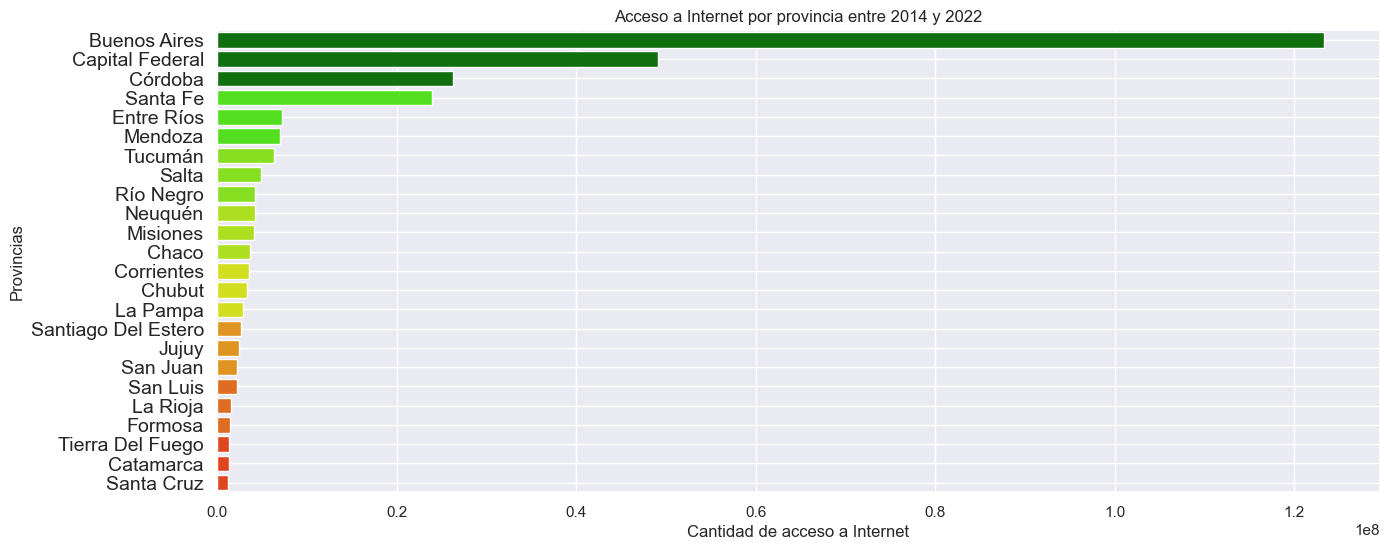

In [19]:
plt.figure(figsize=(15,6))

# Armo una paleta de colores para distinguir a las provincias con los totales mas altos. Minestras mas verde
# el color de la barra, mas alto el 'total'

colors_palette = ['green', 'green', 'green',        # Verde claro
                  '#44FF00', '#44FF00', '#44FF00',  # Verde medio claro
                  '#88FF00', '#88FF00', '#88FF00',  # Verde medio oscuro
                  '#BBFF00', '#BBFF00', '#BBFF00',  # Amarillo verdoso claro
                  '#EEFF00', '#EEFF00', '#EEFF00',  # Amarillo verdoso oscuro
                  '#FF9900', '#FF9900', '#FF9900',  # Naranja
                  '#FF6600', '#FF6600', '#FF6600',  # Rojo claro
                  '#FF3300', '#FF3300', '#FF3300']  # Rojo intenso


sns.barplot(data= data_acceso_provinias, x='Total', y='Provincia', palette=colors_palette)
plt.title('Acceso a Internet por provincia entre 2014 y 2022', fontsize=18)
plt.xlabel('Cantidad de acceso a Internet')
plt.grid('True')
plt.ylabel('Provincias')
plt.yticks(fontsize=14)
plt.show()

A continucación, muestro en un grafico el progreso de las 5 mejores provincias en función de la cantidad total de accesos a Internet

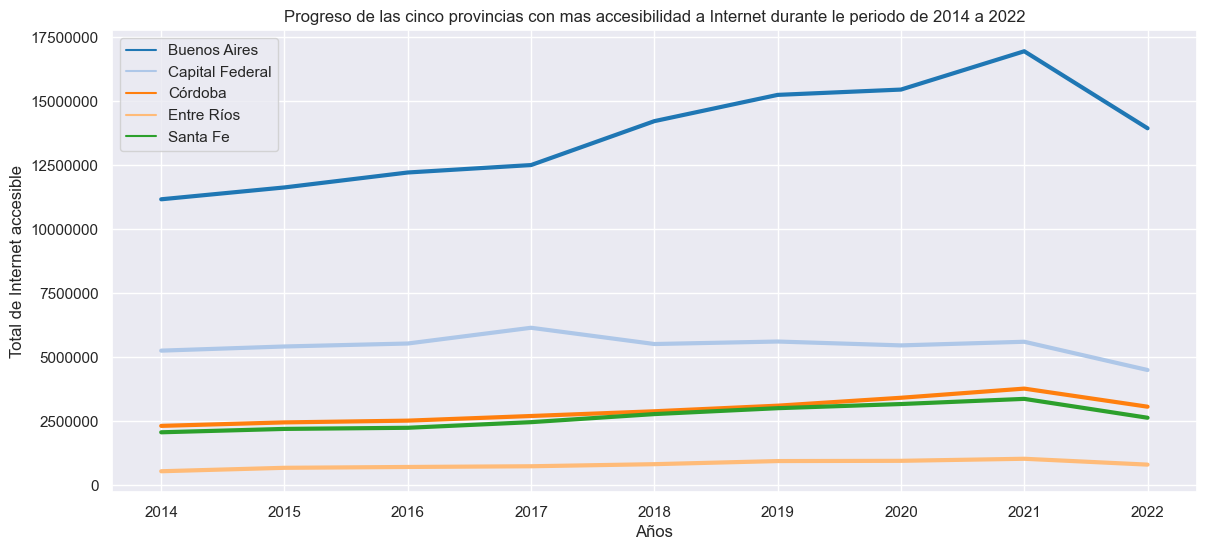

In [269]:
lista = data_acceso_provinias[:5].Provincia.unique()
d = acceso_provincias.loc[acceso_provincias.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia', linewidth='3', palette='tab20')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con mas accesibilidad a Internet durante le periodo de 2014 a 2022', fontsize=18)
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

Para ver las provincias con menores conexiones a Internet, muestro las ultimas cinco en el df ordenado por 'Total'

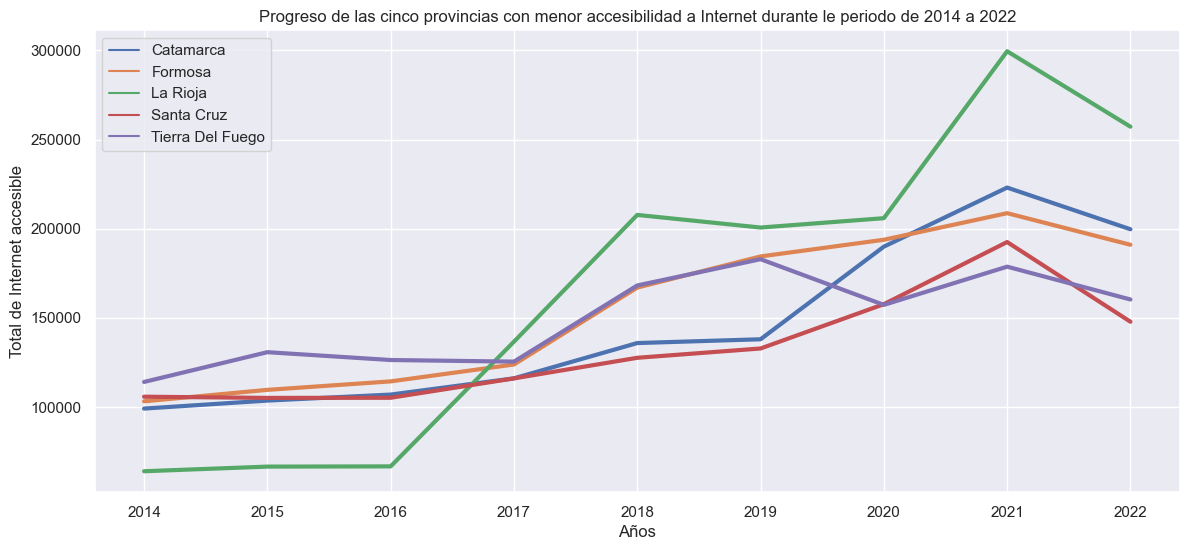

In [270]:
lista = data_acceso_provinias[-5:].Provincia.unique()
d = acceso_provincias.loc[acceso_provincias.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia', linewidth=3)
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con menor accesibilidad a Internet durante le periodo de 2014 a 2022', fontsize=18)
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

Elimino la ultima fila que contenia valores nulos

In [271]:
acceso_provincias = acceso_provincias.drop(acceso_provincias.index[-1])
acceso_provincias.head()

id     Año  Trimestre        Provincia      ADSL  \
0     20223Buenos Aires  2022.0        3.0     Buenos Aires  339648.0   
1  20223Capital Federal  2022.0        3.0  Capital Federal  140791.0   
2        20223Catamarca  2022.0        3.0        Catamarca   10010.0   
3            20223Chaco  2022.0        3.0            Chaco   27164.0   
4           20223Chubut  2022.0        3.0           Chubut   45377.0   

   Cablemodem  Fibra óptica  Wireless  Dial up    Otros      Total  
0   2748325.0     1436433.0  126846.0   6199.0  64217.0  4721668.0  
1   1240125.0      129218.0    5758.0   2145.0  29642.0  1547679.0  
2     10495.0       46224.0    1329.0      1.0   2234.0    70293.0  
3     61800.0       44645.0    8178.0      5.0   2354.0   144146.0  
4     72212.0        9574.0   29784.0    904.0   7927.0   165778.0

Quiero mostrar un grafico para cada tipo de conexion a modo de poder visualizar las 5 provincias con mayor acceso por conexion. 

Para eso, agrupo el dataframe de `acceso_provincias` por Provincia, ordenandolo por el tipo de conexion de manera descendente

In [272]:
adsl = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='ADSL', ascending=False)

cablemodem = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Cablemodem', ascending=False)

fibra_optica = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Fibra óptica', ascending=False)

Wireless = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Wireless', ascending=False)

otros = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Otros', ascending=False)

total = acceso_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Total', ascending=False)

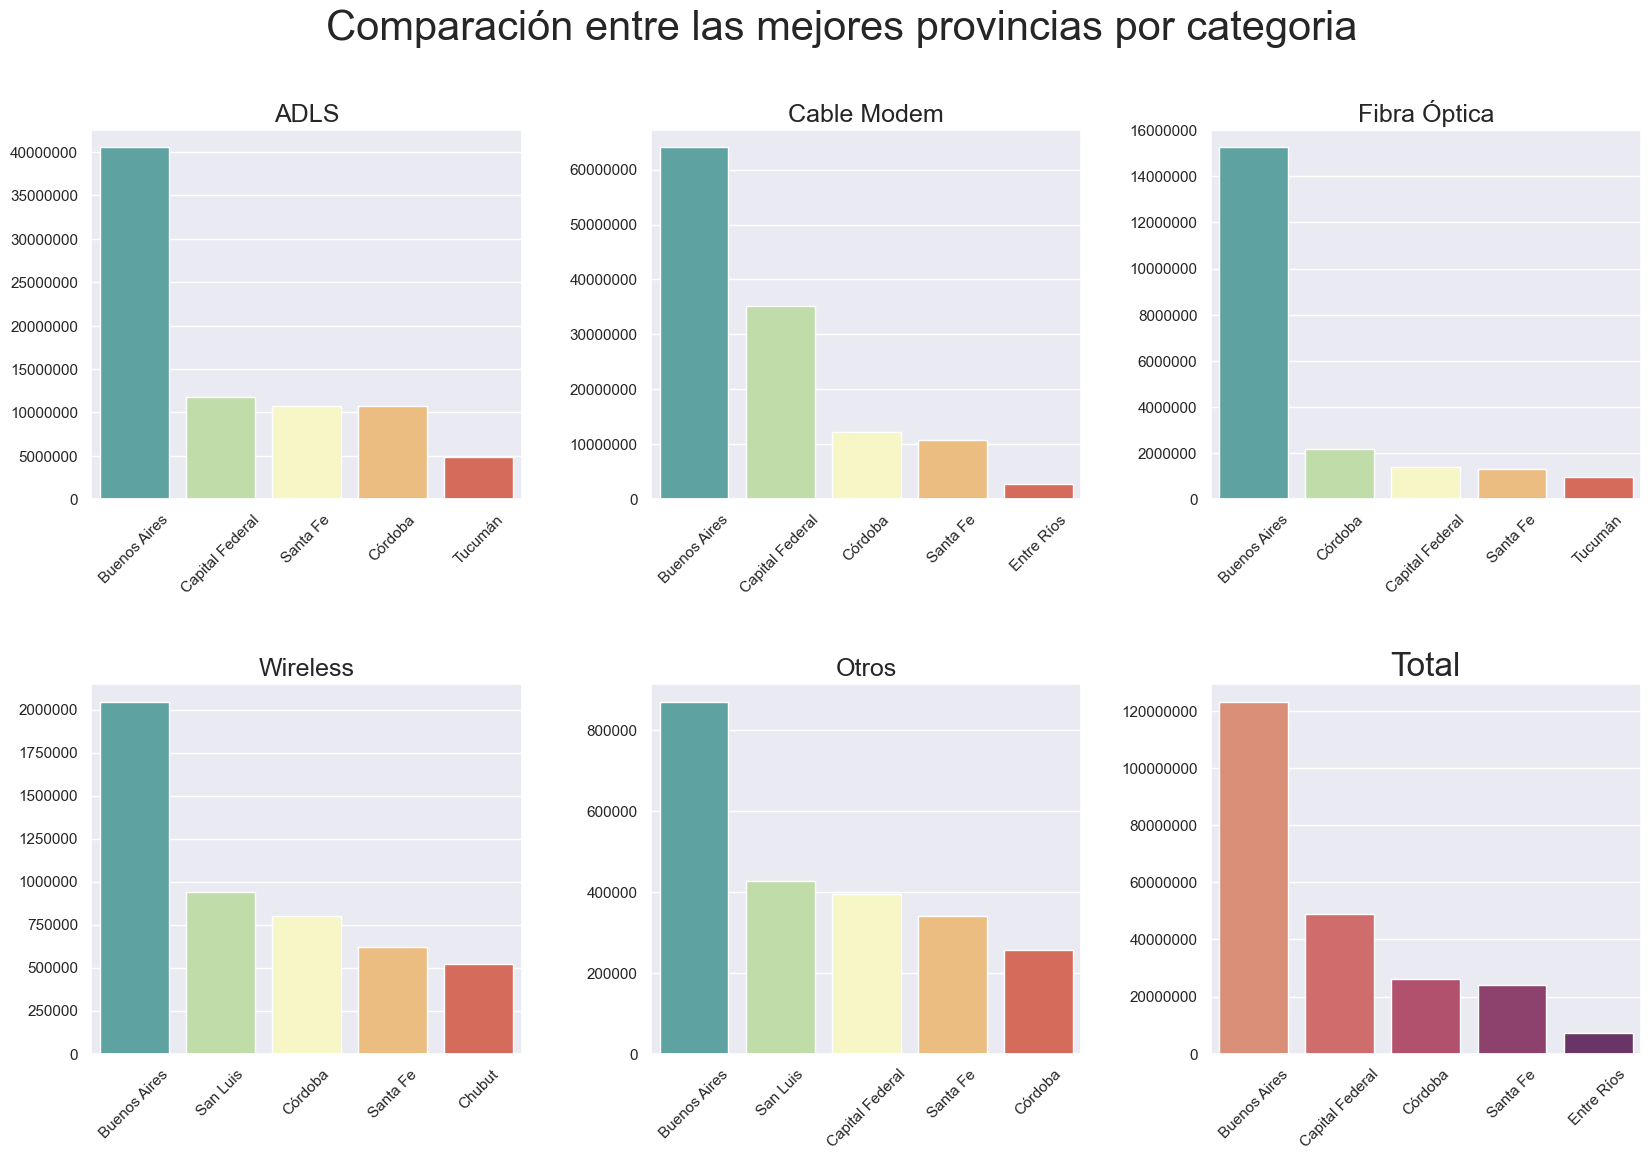

In [277]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

# ADLS
sns.barplot(data=adsl[:5], x='Provincia', y='ADSL', ax=axes[0,0], palette="Spectral_r")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[:5], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="Spectral_r")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[:5], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="Spectral_r")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[:5], x='Provincia', y='Wireless',ax=axes[1,0], palette="Spectral_r")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[:5], x='Provincia', y='Otros',ax=axes[1,1], palette="Spectral_r")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[:5], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las mejores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

Noto que las mejores provincias por tipo de conexion suelen ser las mismas, liderando el podia la provincia de 'Buenos Aires' (Capital federal no es provincia, esta dentro de Bs As), siguiendole 'Córdoba' y 'Santa Fe'. Son las provincias mas desarrolladas en cuestion de accesos a servicios de telecomunicaciones. Esto tambien esta relacionado a la cantidad de habitantes, ya que son las tres provincias con mayor cantidad de habitantes en todo el pais.

#### Ahora quiero realizar el mismo grafico que arriba pero con las provincias con menor acceso por cada categoria de telecomunicación

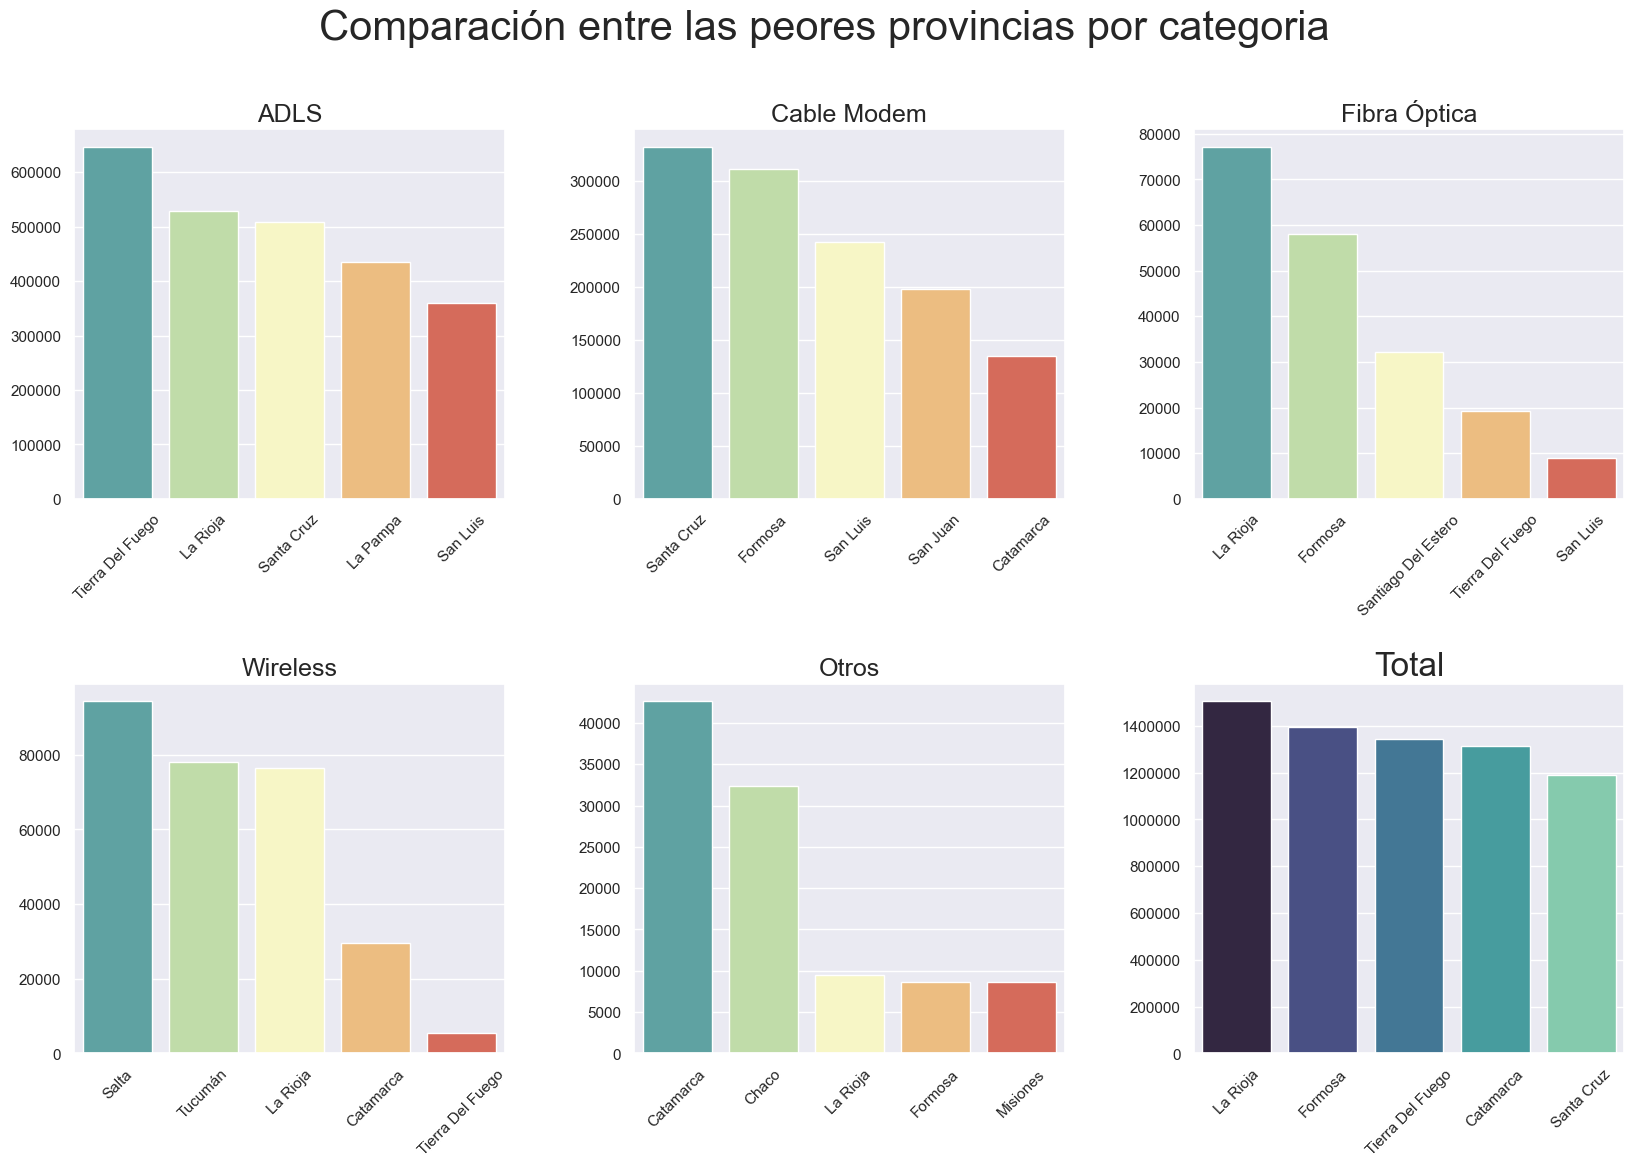

In [276]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
# ADLS
sns.barplot(data=adsl[-5:], x='Provincia', y='ADSL', ax=axes[0,0], palette="Spectral_r")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[-5:], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="Spectral_r")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[-5:], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="Spectral_r")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[-5:], x='Provincia', y='Wireless',ax=axes[1,0], palette="Spectral_r")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[-5:], x='Provincia', y='Otros',ax=axes[1,1], palette="Spectral_r")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[-5:], x='Provincia', y='Total',ax=axes[1, 2], palette="mako")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las peores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

![imagen](mapa_argentina.png)

Al visualizar la geografia de la Republica Argentina, puedo comprender que por lo general las provincias del noroeste suelen tener pocas prestaciones/accesos a los servicios de telecomunicaciones. Esto tambien se puede deber a que la cantidad de habitantes no es tanta como en 'Córdoba', 'Santa Fe', 'Mendoza' ni mucho menos 'Buenos Aires'. Ademas, las provincias 'Tierra del fuego' y 'Santa Cruz', ambas del sur del pais, son unas de las provincias con menores accesos a servicios de telecomunicación.

---

### 2. Dataset `mbps_provincias_trimestral.csv`

In [19]:
velocidad_provincias = pd.read_csv('clean_datasets/mbps_provincias_trimestral.csv')
velocidad_provincias.sample(5)

Año  Trimestre            Provincia  Mbps (Media de bajada)
237  2020          2  Santiago Del Estero                      10
839  2014          1              Tucumán                       3
463  2017          4           Entre Ríos                       9
9    2022          3                Jujuy                      32
735  2015          1            Río Negro                       4

El dataframe de `mbps_provincias_trimestral.csv` contiene información relacionada con la velocidad media de descarga de Internet en diferentes provincias de Argentina a lo largo de varios años y trimestres. 

Descripción de columnas:

- "Año": Representa el año en el que se registró la velocidad de descarga de Internet.
- "Trimestre": Indica el trimestre en el que se realizó la medición.
- "Provincia": Muestra el nombre de la provincia a la que pertenece la medición de velocidad.
- "Mbps (Media de bajada)": Contiene el valor medio de velocidad de descarga en megabits por segundo (Mbps) para cada provincia y período.

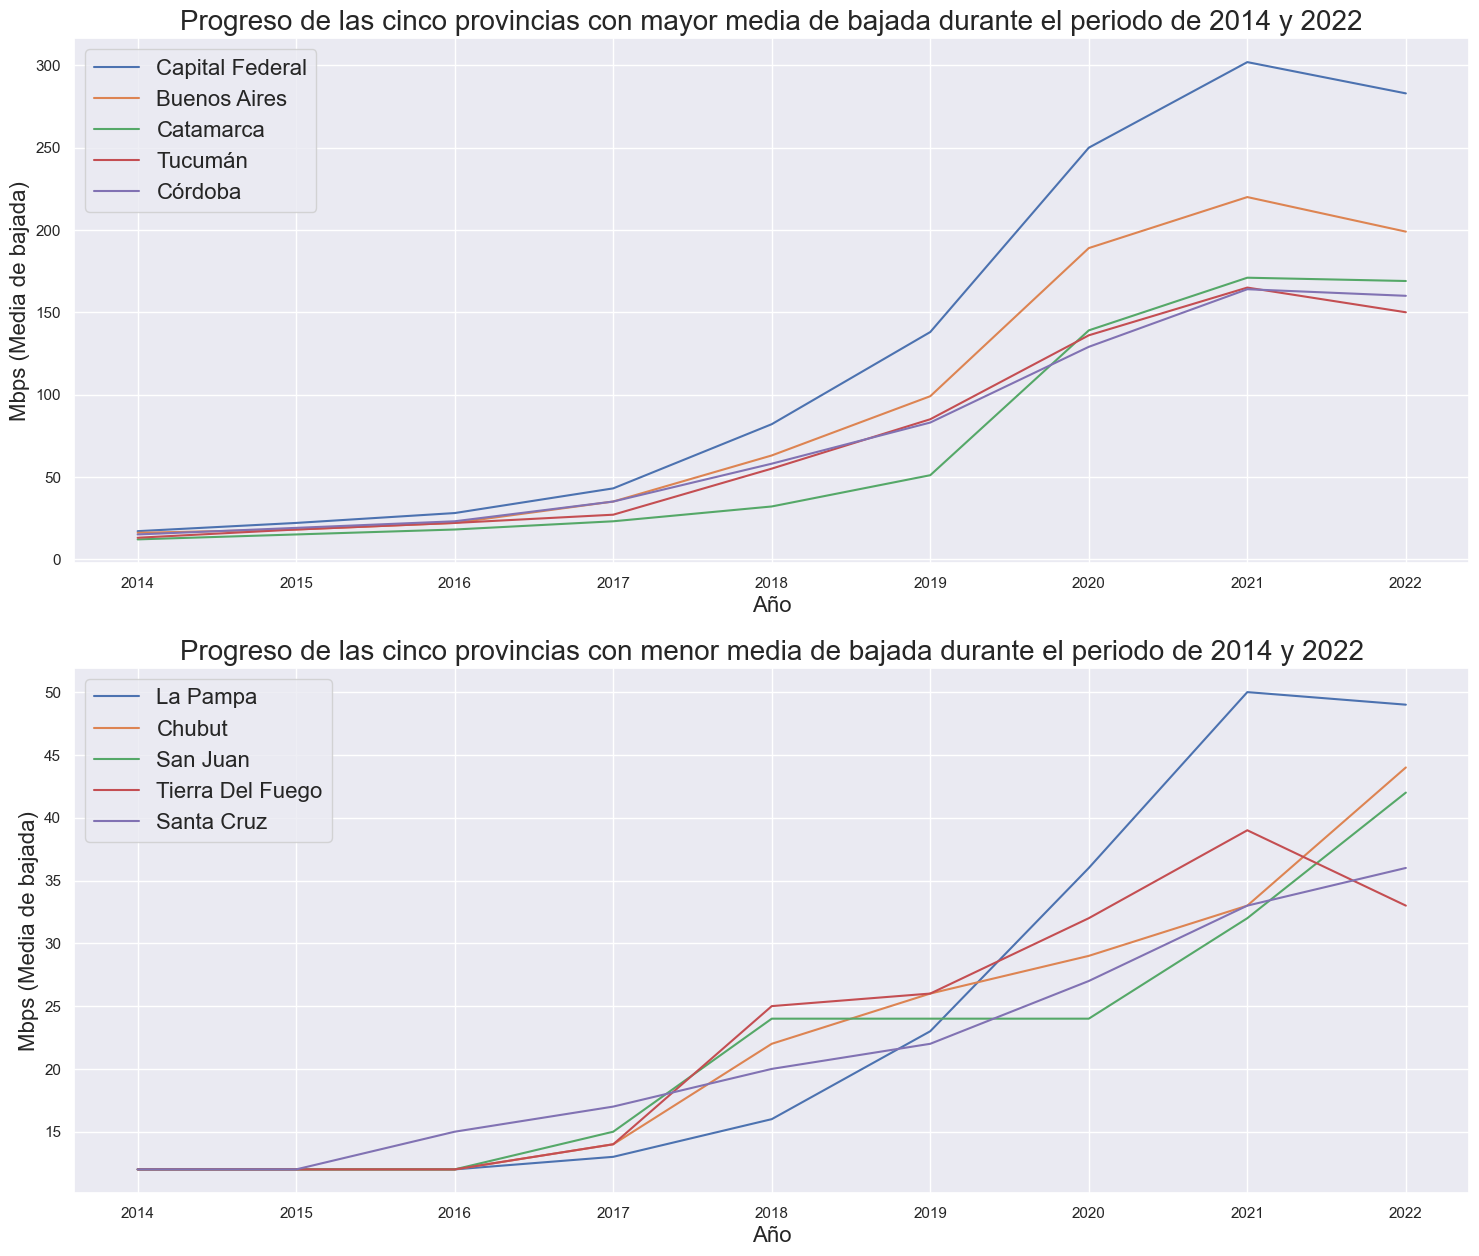

In [20]:
velocidad_provincias = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
mejores_provincias = velocidad_provincias.loc[velocidad_provincias.Provincia.isin(velocidad_provincias.Provincia.unique()[:5])]
peores_provincias = velocidad_provincias.loc[velocidad_provincias.Provincia.isin(velocidad_provincias.Provincia.unique()[-5:])]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

sns.lineplot(data=mejores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[0], legend='full')
axes[0].set_title('Progreso de las cinco provincias con mayor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

sns.lineplot(data=peores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[1], legend='full')
axes[1].set_title('Progreso de las cinco provincias con menor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

# Ajustar tamaño de letra en la leyenda
axes[0].legend(fontsize=16)
axes[0].set_xlabel('Año', fontsize=16)
axes[0].set_ylabel('Mbps (Media de bajada)', fontsize=16)

axes[1].legend(fontsize=16)
axes[1].set_xlabel('Año', fontsize=16)
axes[1].set_ylabel('Mbps (Media de bajada)', fontsize=16)

plt.show()

Pese a que en el analisis del dataset anterior, la provincia de Catamarca destaca por ser una de las que menor a acceso tiene en las diferenctes conexiones, en este grafico entra en el top 5 de las provincias que tienen mayor media de descarga de Internet, historicamente entre todas las provincias, de hecho por encima de Córdoba, Santa Fe, Tucuman, etc. Solo superada por la capital Buenos Aires. Esto me da a entender que el hecho de que no tenga gran cantidad de accesos a conexiones a Internet/telecomunicaciones en general puede deberse a que la densidad polacional con la que cuenta no necesariamente requiera de mayor accesos. Es por eso que pienso que en la provincia de Catamarca se prioriza mayor la calidad del internet que la cantidad de accesos, a diferencia por ejemplo con Santa Fe que ni siquiera aparece en el top 5 con las provincias con mayor media de bajada de Internet.

---

### 3. Datasets `acceso_por_hogares_habitantes_pais_trimestral.csv`

In [2]:
internet_hogares = pd.read_csv('clean_datasets/acceso_por_hogares_habitantes_pais_trimestral.csv')

In [3]:
internet_hogares.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2022          3                         76.64                     23.95   
1  2022          2                         75.97                     23.72   
2  2022          1                         73.88                     23.05   
3  2021          4                         73.18                     22.81   
4  2021          3                         70.58                     21.98   

         Periodo  
0  Jul-Sept 2022  
1   Abr-Jun 2022  
2   Ene-Mar 2022  
3   Oct-Dic 2021  
4  Jul-Sept 2021

Agrupo la data por Año y Trimestre

In [108]:
data_internet_hogares = internet_hogares.groupby(by=['Año','Trimestre']).mean().reset_index()

In [109]:
data_internet_hogares.head()

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab
0  2014          1                         49.55                     15.05
1  2014          2                         49.86                     15.16
2  2014          3                         50.67                     15.43
3  2014          4                         50.50                     15.39
4  2015          1                         51.36                     15.68

Acá tenemos información a *nivel nacional* (no especifica ninguna provincia ni localidad) sobre el porcentaje de accesos por cada 100 hogares a lo largo y ancho de Argentina y por cada 100 habitantes. 

Ejemplo: el valor de la columna `Accesos por cada 100 hogares` en el indice 2 muestra que cada 100 hogares el 50.67% tuvo acceso a servicios de telecomunicación, es decir, cada 100 casas, 50.67 tenian acceso

Lo mismo simbolizan los valores de la columna `Accesos por cada 100 hab`

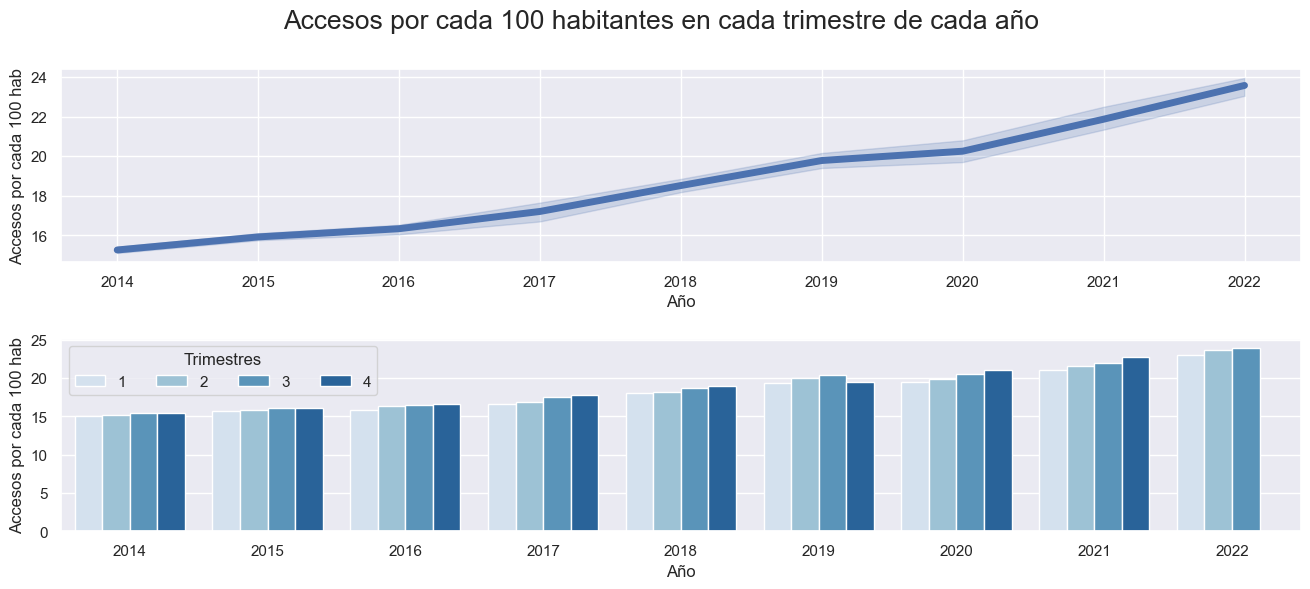

In [118]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.lineplot(data = data_internet_hogares, x='Año', y='Accesos por cada 100 hab', ax=ax[0], linewidth=5, linestyle='-')
ax[0].grid(True)

sns.barplot(data = data_internet_hogares, x='Año', y='Accesos por cada 100 hab',hue='Trimestre', ax=ax[1], palette='Blues')
ax[1].legend(loc='upper left', ncols=4, title='Trimestres')

plt.suptitle('Accesos por cada 100 habitantes en cada trimestre de cada año', fontsize=19)
plt.subplots_adjust(hspace=0.4)
plt.show()

Desde el 2014, se fueron incrementando en todo el pais los accesos por cada 100 habitantes, aunque hay un leve estancamiento durante el 2019-2020, lo cual supongo que fue producto de la pandemia

---

### 4. Dataset `velocidad_pais_trimestral.csv`

In [2]:
internet_velocidad_pais = pd.read_csv('clean_datasets/velocidad_pais_trimestral.csv')
internet_velocidad_pais.sample(5)

Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
31  2014          4          44.075                  554.749   
8   2020          3          41.038                   44.005   
7   2020          4          39.510                   42.185   
10  2020          1          42.550                   56.170   
13  2019          2         202.790                   95.980   

   Entre 1 Mbps y 6 Mbps Entre 6 Mbps y 10 Mbps Entre 10 Mbps y 20 Mbps  \
31             5.084.556                496.251                 276.254   
8              2.637.984              1.040.017                 799.350   
7              2.622.638              1.073.875                 786.595   
10             2.649.819              1.022.014                 814.470   
13             3.444.458                871.142               1.169.632   

   Entre 20 Mbps y 30 Mbps Más de 30 Mbps    OTROS      Total  
31                   4.371         15.229    0.000  6.475.485  
8                  538.567      4.053.461  201.777  9.356.199  
7                  582.420      4.239.237  185.102  9.571.562  
10                 532.309      3.500.882  194.212  8.812.426  
13               1.250.366      1.677.830  247.983  8.960.181

In [3]:
for column in internet_velocidad_pais:
    internet_velocidad_pais[column] = pd.to_numeric(internet_velocidad_pais[column].astype(str).str.replace('.',''))

In [4]:
internet_velocidad_pais.dtypes

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object

Como veo que hay varias columnas que representan velocidades de internet en Mbps (megabits por segundo), para poder hacer una comparativa de las diferentes categorias de velocidades, decido hacer un `pd.melt` para agrupar en una columna la categoria y en otra el valor o cantidad

In [104]:
d = pd.melt(internet_velocidad_pais,
            id_vars=['Año','Trimestre', 'Total'],
            var_name='Categoria',
            value_name='Cantidad')

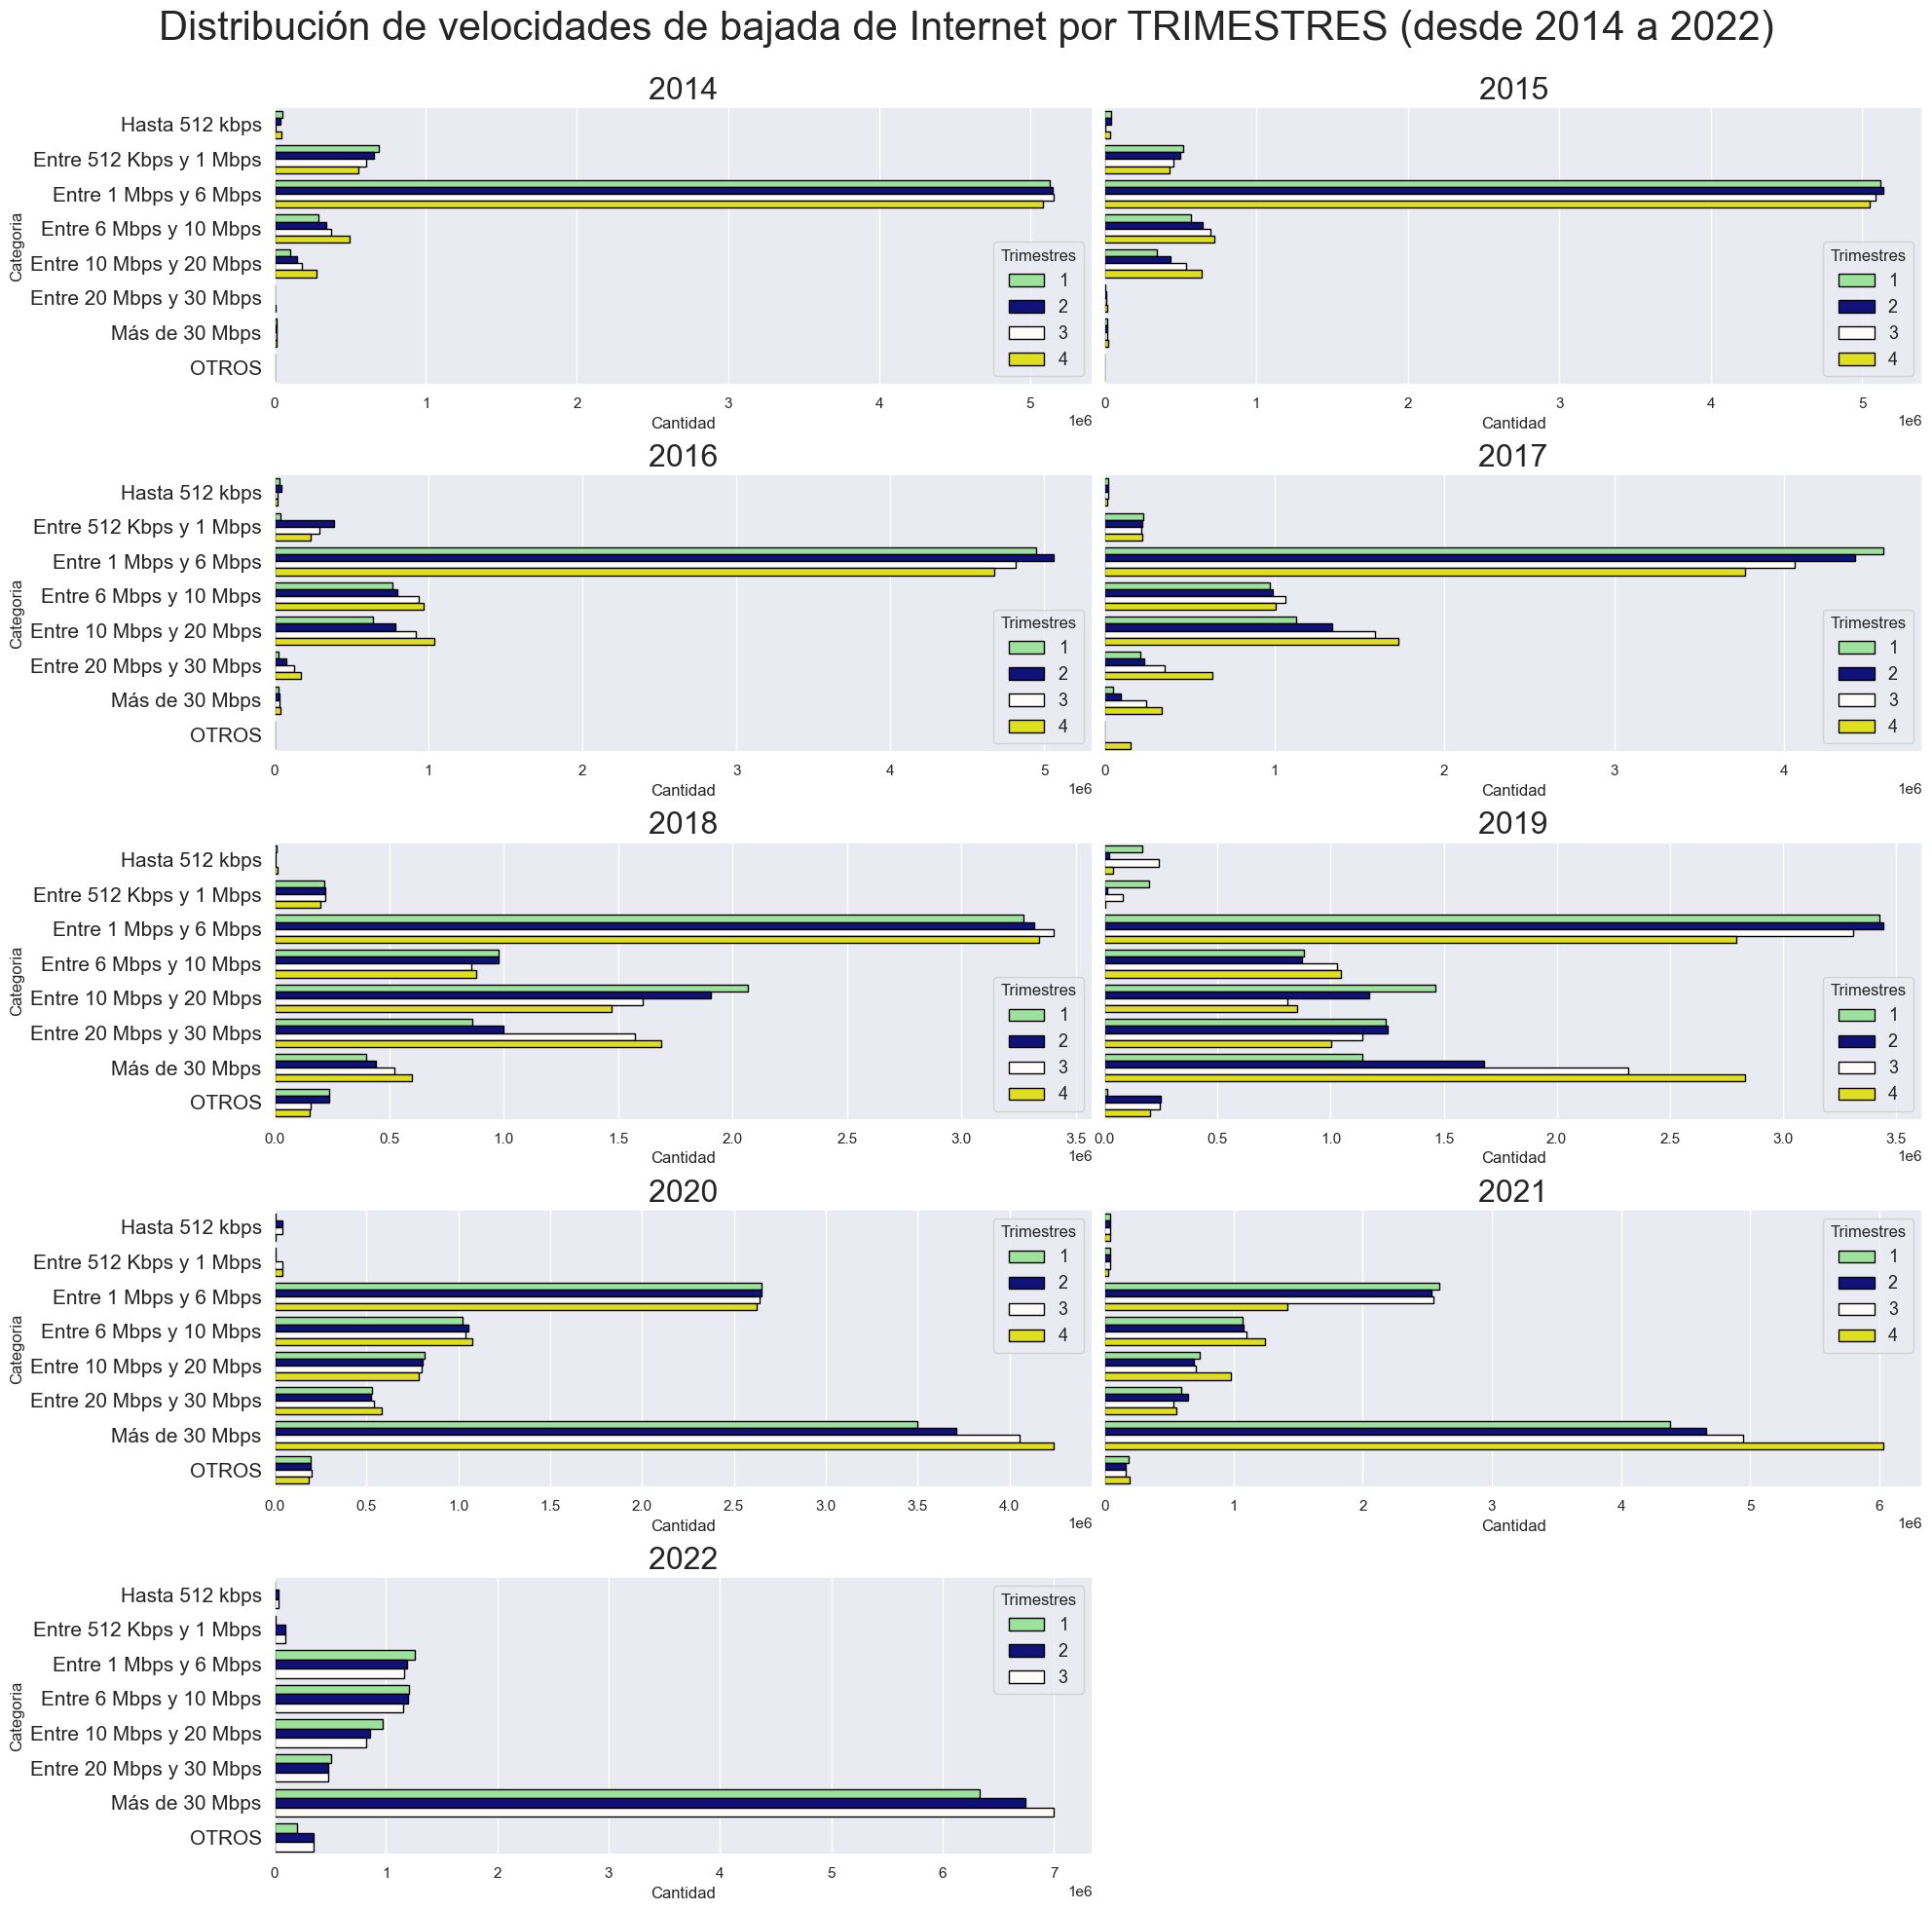

In [105]:
palette_colors = ['lightgreen', 'darkblue', 'snow', 'yellow']

fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
years = sorted(d.Año.unique().tolist()) # Años unicos

# Como tengo mas de una dimension en el grafico, decido aplanar los ejes para poder iterarlos y asi
# graficar cada subplot correctamente
for index, ax in enumerate(axes.flatten()):
    try:
        sns.barplot(data = d[d.Año == years[index]],
                    y='Categoria',
                    x='Cantidad',
                    hue='Trimestre',
                    palette=palette_colors,
                    edgecolor='black',
                    ax=ax)
        
        ax.set_title(years[index], fontsize=23)
        ax.legend(title='Trimestres',fontsize=13)

        # Como aplane los ejes, si el resto de la division de index/2 es diferente a cero, significa que es impar
        # por lo tanto se trata de un subplot de la segunda columna
        if index % 2 != 0:
            ax.set_ylabel('')
            ax.set_yticklabels('')
        else:
            ax.set_yticklabels(labels = ax.get_yticklabels(), fontsize=15)

    except IndexError:
        break

axes[4,1].axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.015)
fig.subplots_adjust(top=0.93)
plt.suptitle('Distribución de velocidades de bajada de Internet por TRIMESTRES (desde 2014 a 2022)', fontsize=30)
plt.show()

El grafico muestra claramente como en 2014 y 2015, en promedio la mayoria de las provincias tenian una media de bajada entre 1-6 mbps. Con los años, la posibilidad de acceder a un mejor internet se fue haciendo mas posible a medida que la tecnologia avanazaba por lo que el promedio de mbps a nivel pais fue creciendo con los años, llegando al 2019 con una distribucion de velocidades muy pareja en todo el pais. 

El año determinante fue el 2020 (plena pandemia de COVID-19). Los datos afirman que la mayoria de los accesos tuvieron mas de 30 mbps de media de bajada en todo el pais. El año pasado, el 2022, la velocidad de Internet mas predominante fue de mas de 30 mbps. Hoy en dia hay mas provincias que adaptan sus localidades/barrios con fibra optica como conexion a internet, lo cual obviamente es mas rapido que el Internet por "aire" (Cablemodem, Wireless)

Ahora quiero realizar el mismo grafico pero solo con las cantidades por AÑO, sin trimestre.

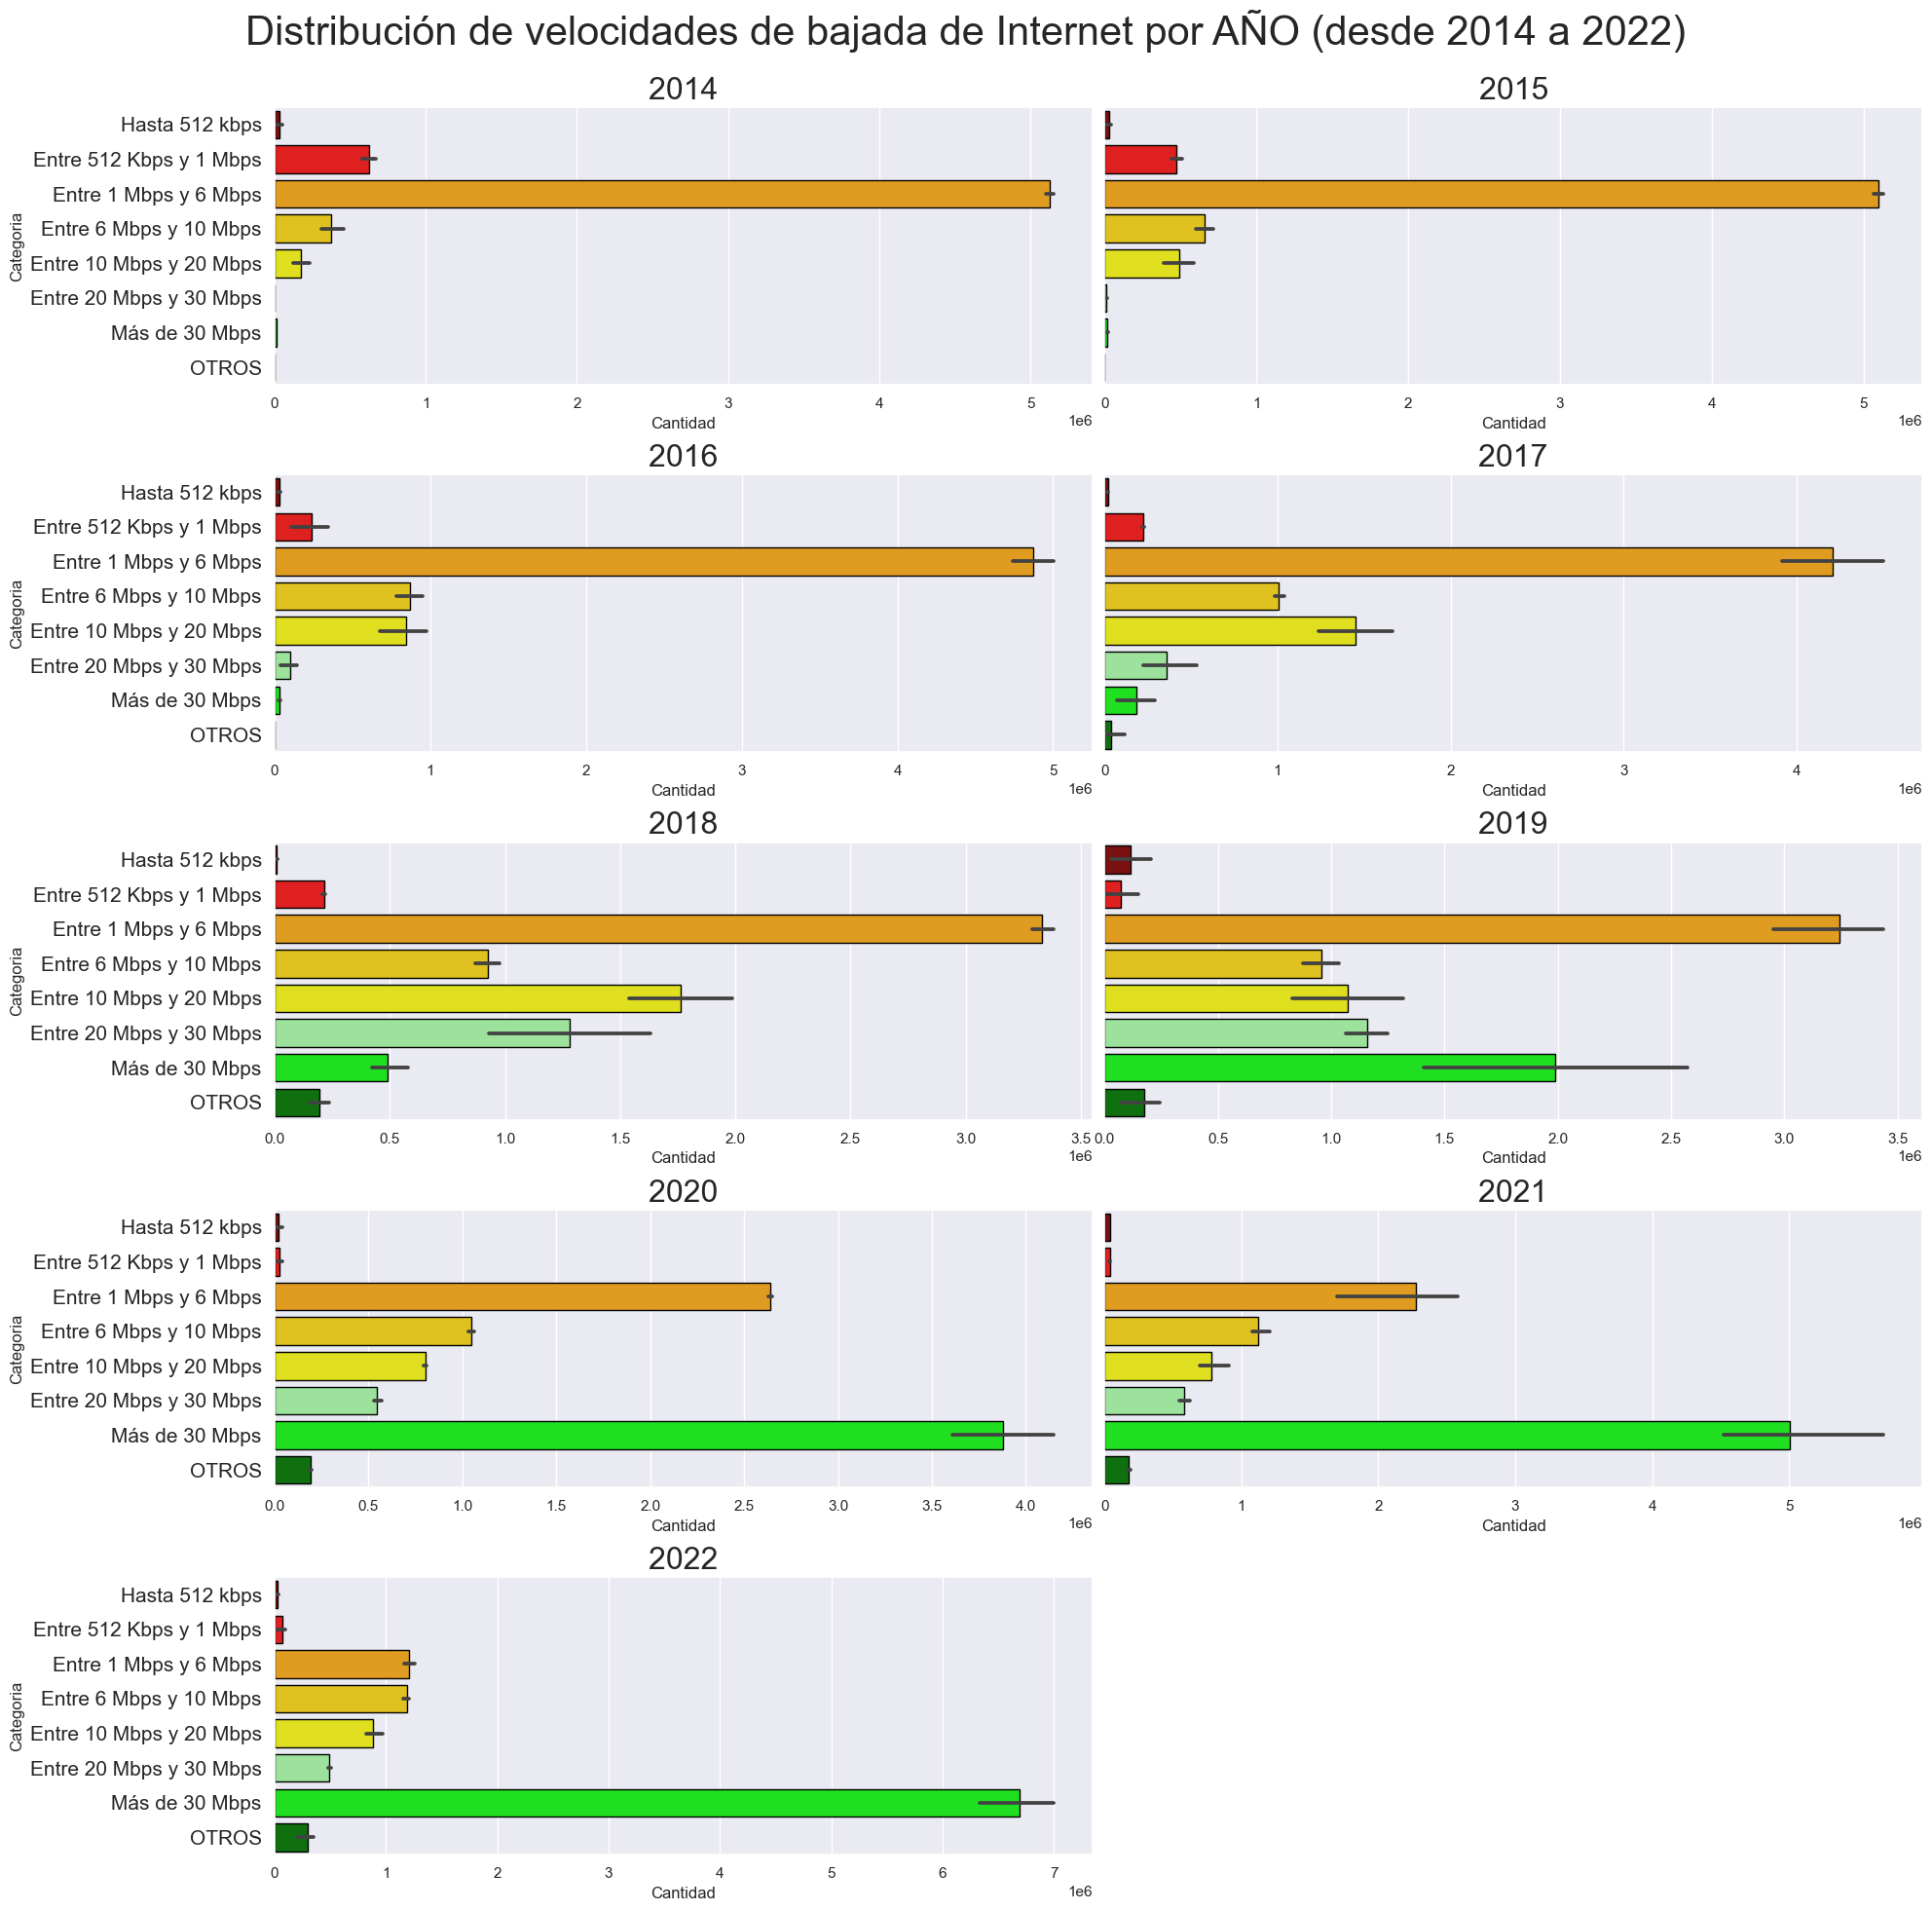

In [106]:
palette_colors = ['darkred', 'red', 'orange', 'gold', 'yellow', 'lightgreen', 'lime', 'green' ]

fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20))
years = sorted(d.Año.unique().tolist()) # Años unicos

for index, ax in enumerate(axes.flatten()):
    try:
        sns.barplot(data = d[d.Año == years[index]],
                    y='Categoria',
                    x='Cantidad',
                    palette=palette_colors,
                    edgecolor='black',
                    ax=ax)
        
        ax.set_title(years[index], fontsize=23)

        # Como aplane los ejes, si el resto de la division de index/2 es diferente a cero, significa que es impar
        # por lo tanto se trata de un subplot de la segunda columna
        if index % 2 != 0:
            ax.set_ylabel('')
            ax.set_yticklabels('')
        else:
            ax.set_yticklabels(labels = ax.get_yticklabels(), fontsize=15)

    except IndexError:
        break

axes[4,1].axis('off')
plt.tight_layout()
plt.subplots_adjust(wspace=0.015)
fig.subplots_adjust(top=0.93)
plt.suptitle('Distribución de velocidades de bajada de Internet por AÑO (desde 2014 a 2022)', fontsize=30)
plt.show()


El hecho de que el grafico utilice esos colores para las barras no fue por gusto, sino que para poder entender de manera visual el progresos de las velocidades de Internet. Mientras mas verde es una barra, mayor velocidad de internet, es decir, megabits por segundo. Es claro como al principio las velocidades comunes en el pais eran naranjas/rojas (velocidades muy bajas) y luego con el pasar de los años las velocidades iban subiendo dando lugar a las barras con mayor tonalidad de verde. 

---

### 5. Dataset `velocidad_provincias_trimestral.csv`

In [4]:
internet_velocidad_provincias = pd.read_csv('clean_datasets/velocidad_provincias_trimestral.csv')
internet_velocidad_provincias.sample(5)

Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
613  2016          2         Misiones            1973                 7899   
769  2014          3  Capital Federal            8400                78016   
223  2020          2       Entre Ríos            1300                 3679   
427  2018          2       Santa Cruz             260                 1200   
375  2018          4        Río Negro            3840                 1225   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
613              49586               21385                 1482   
769            1060145               10217                70907   
223              66758                5064                 4209   
427              28600                6550                 1000   
375              83412                6430                 1344   

     + 20 Mbps - 30 Mbps  + 30 Mbps  OTROS    Total  
613                 1073         96      0    96832  
769                  950       6626      0  1318799  
223                12856      43391  14569   234113  
427                   10          3   4267    33772  
375                 9569       5070   3094   116837

Este dataset información similar a la del dataset anterior, pero ahora distribuida por Provincias.

In [5]:
columns = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

# Transformo a valores numericos las columnas de arriba
for column in columns:
    internet_velocidad_provincias[column] = pd.to_numeric(internet_velocidad_provincias[column].fillna(0).astype(str).str.replace('.',''))

In [6]:
internet_velocidad_provincias.dtypes

Año                     int64
Trimestre               int64
Provincia              object
HASTA 512 kbps          int64
+ 512 Kbps - 1 Mbps     int64
+ 1 Mbps - 6 Mbps       int64
+ 6 Mbps - 10 Mbps      int64
+ 10 Mbps - 20 Mbps     int64
+ 20 Mbps - 30 Mbps     int64
+ 30 Mbps               int64
OTROS                   int64
Total                   int64
dtype: object

In [9]:
data_velocidad_int_pais = internet_velocidad_provincias.groupby(by=['Provincia', 'Año']).mean().reset_index()
data_velocidad_int_pais.sample(3)

Provincia   Año  Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
129    Neuquén  2017        2.5     1630.250000          1660.500000   
26   Catamarca  2022        2.0      710.000000          4176.666667   
116    Mendoza  2022        2.0     1066.666667          3087.333333   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
129       76413.250000         4967.250000         15639.500000   
26         3723.666667         6184.333333          7012.333333   
116       46807.666667        23647.000000         62172.333333   

     + 20 Mbps - 30 Mbps      + 30 Mbps        OTROS          Total  
129          5898.000000    3349.500000  1526.250000  110549.000000  
26           3630.333333   43313.000000  2207.333333   66559.666667  
116         19450.666667  122152.333333  2817.333333  281423.333333

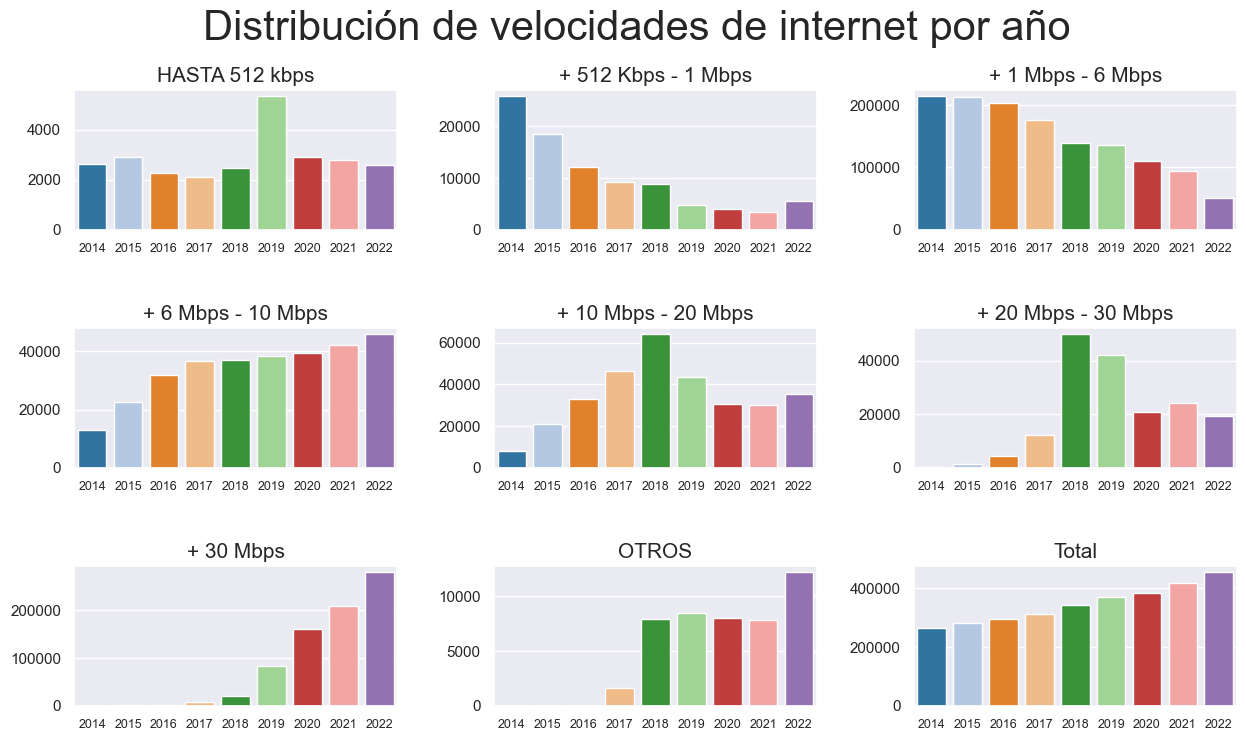

In [295]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))

for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data_velocidad_int_pais, x='Año', y=columns[index], ax=ax, palette='tab20')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_title(columns[index], fontsize=15)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Distribución de velocidades de internet por año', fontsize=30)
fig.subplots_adjust(hspace=0.7, wspace=0.3) # Para agregar mas separación entre los subplots


In [296]:
def velocidades_por_año(año):
    # Filtrar los datos para el año seleccionado
    data_velocidad_int_pais_año = data_velocidad_int_pais[data_velocidad_int_pais.Año == año]

    # Convertir las columnas de velocidades de Internet en una sola columna
    data_velocidad_int_pais_melted = pd.melt(data_velocidad_int_pais_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

    plt.figure(figsize=(15,5.5))

    # Graficar el barplot con todas las velocidades del año seleccionado
    sns.barplot(data=data_velocidad_int_pais_melted, y='Velocidad', x='Cantidad')

    # Configuración adicional
    plt.ylabel('Velocidad', fontsize=20)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('Cantidad', fontsize=20)
    plt.title(f'Velocidades de Internet - Año {año}', fontsize=26)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)


    # Mostrar el gráfico
    plt.show()

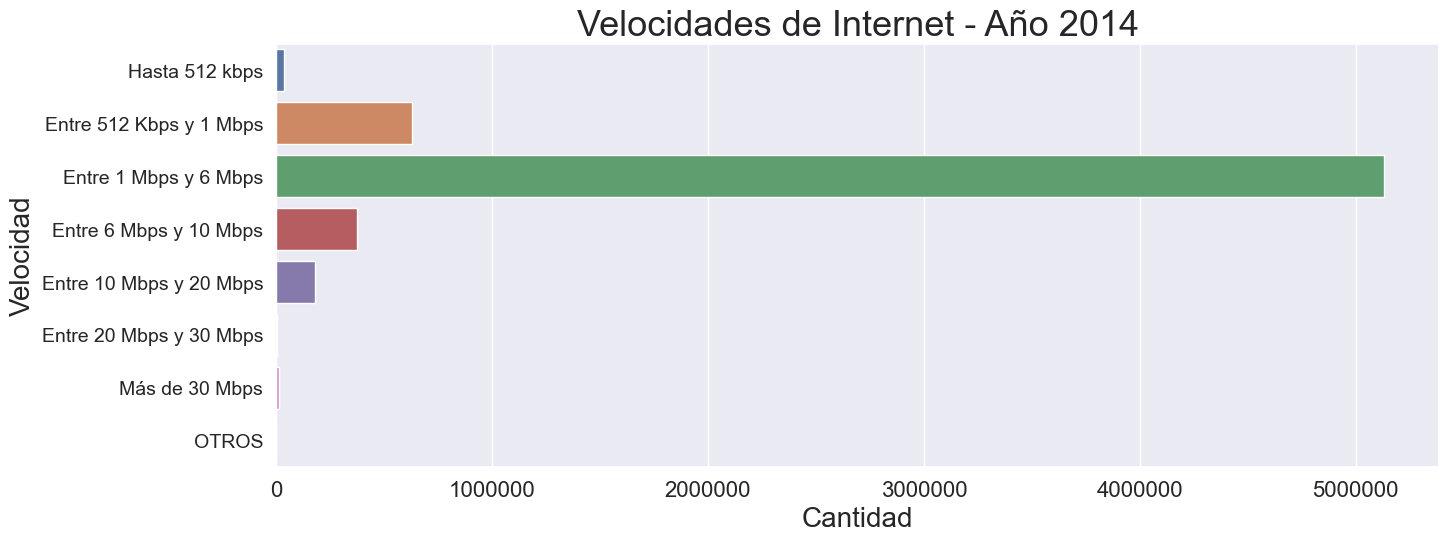

In [37]:
velocidades_por_año(2014)

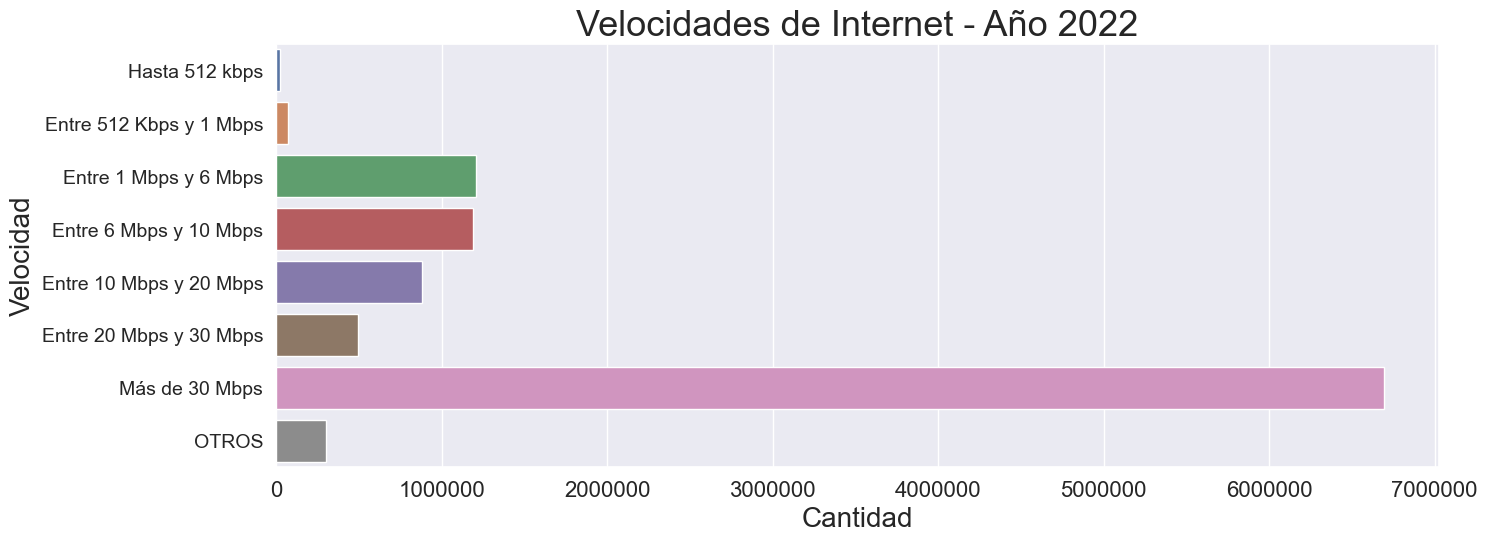

In [38]:
velocidades_por_año(2022)

Quiero comparar como fue el avance de las velocidades durante el perdiodo de los 9 años, comparando en un mismo grafico las velocidades del año 2014 con las del 2022

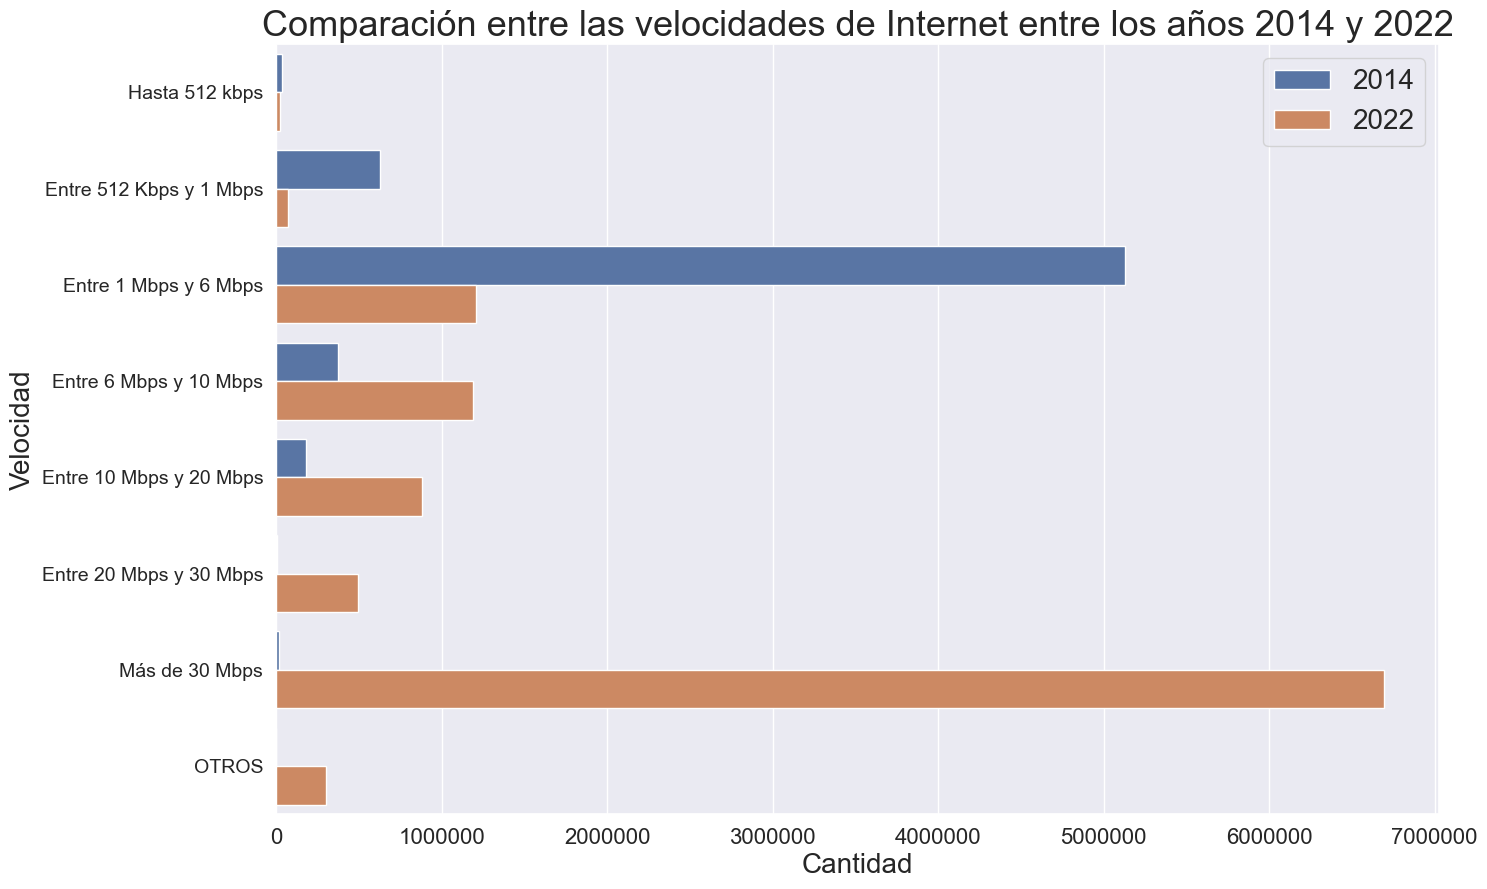

In [39]:
data_velocidad_int_pais_año = data_velocidad_int_pais[(data_velocidad_int_pais.Año == 2014) | (data_velocidad_int_pais.Año == 2022)]

# Convertir las columnas de velocidades de Internet en una sola columna
data_velocidad_int_pais_melted = pd.melt(data_velocidad_int_pais_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

plt.figure(figsize=(15,10))

# Graficar el barplot con todas las velocidades del año seleccionado
sns.barplot(data=data_velocidad_int_pais_melted, y='Velocidad', x='Cantidad', hue='Año')

# Configuración adicional
plt.ylabel('Velocidad', fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Cantidad', fontsize=20)
plt.title(f'Comparación entre las velocidades de Internet entre los años 2014 y 2022', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

# Mostrar el gráfico
plt.show()

In [13]:
data_velocidad_melted = pd.melt(data_velocidad_int_pais, id_vars=['Provincia', 'Año', 'Trimestre'])
data_velocidad_melted

Provincia   Año  Trimestre        variable          value
0     Buenos Aires  2014        2.5  HASTA 512 kbps    7738.000000
1     Buenos Aires  2015        2.5  HASTA 512 kbps    8485.500000
2     Buenos Aires  2016        2.5  HASTA 512 kbps    7512.000000
3     Buenos Aires  2017        2.5  HASTA 512 kbps    6001.750000
4     Buenos Aires  2018        2.5  HASTA 512 kbps   36776.500000
...            ...   ...        ...             ...            ...
1939       Tucumán  2018        2.5           Total  170219.500000
1940       Tucumán  2019        2.5           Total  175494.500000
1941       Tucumán  2020        2.5           Total  218142.500000
1942       Tucumán  2021        2.5           Total  234018.500000
1943       Tucumán  2022        2.0           Total  254409.333333

[1944 rows x 5 columns]

In [37]:
# Provincias con mayor conexiones
data_velocidad_melted.groupby('Provincia').sum().sort_values(by='value', ascending=False)[:5]

Año  Trimestre         value
Provincia                                       
Buenos Aires     163458      198.0  6.259033e+07
Capital Federal  163458      198.0  2.439474e+07
Córdoba          163458      198.0  1.351318e+07
Santa Fe         163458      198.0  1.219068e+07
Entre Ríos       163458      198.0  3.679766e+06

<AxesSubplot: xlabel='value', ylabel='variable'>

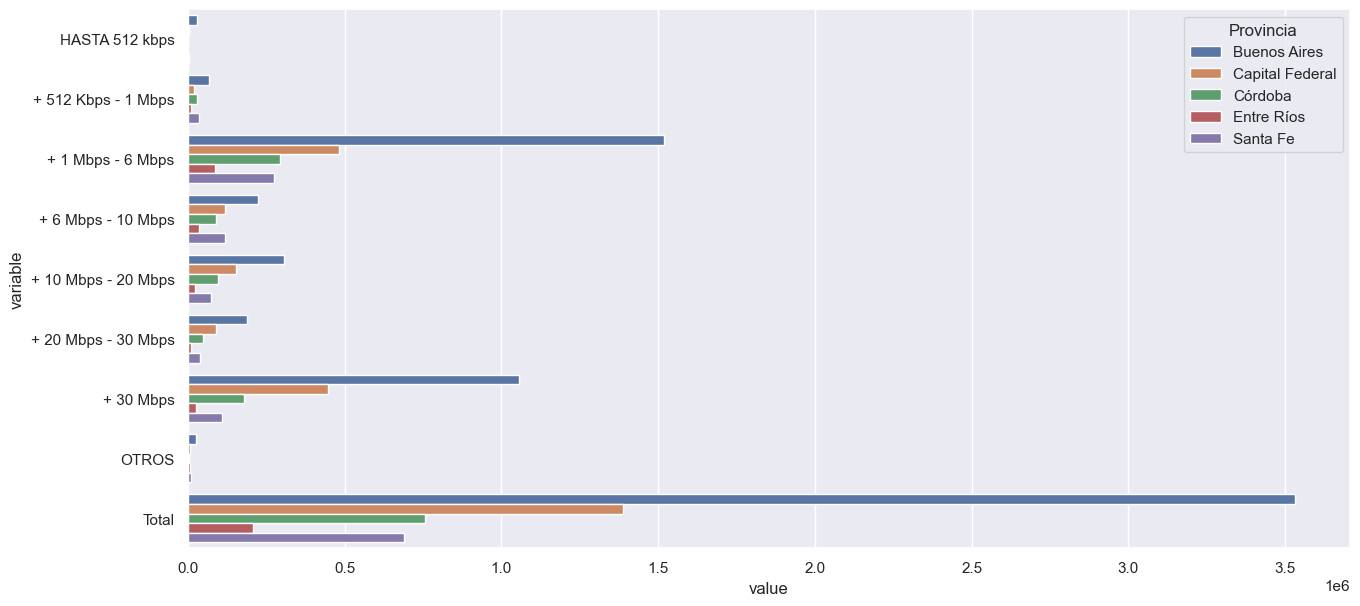

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(data = data_velocidad_melted[data_velocidad_melted.Provincia.isin(['Buenos Aires', 'Córdoba', 'Santa Fe', 'Entre Ríos', 'Capital Federal'])], x= 'value', y='variable', hue='Provincia', ci=None)

In [39]:
# Provincias con menores conexiones
data_velocidad_melted.groupby('Provincia').sum().sort_values(by='value', ascending=True)[:5]

Año  Trimestre          value
Provincia                                         
Santa Cruz        163458      198.0  687706.583333
Catamarca         163458      198.0  698064.083333
Tierra Del Fuego  163458      198.0  749940.833333
Formosa           163458      198.0  769465.833333
La Rioja          163458      198.0  801991.416667

<AxesSubplot: xlabel='value', ylabel='variable'>

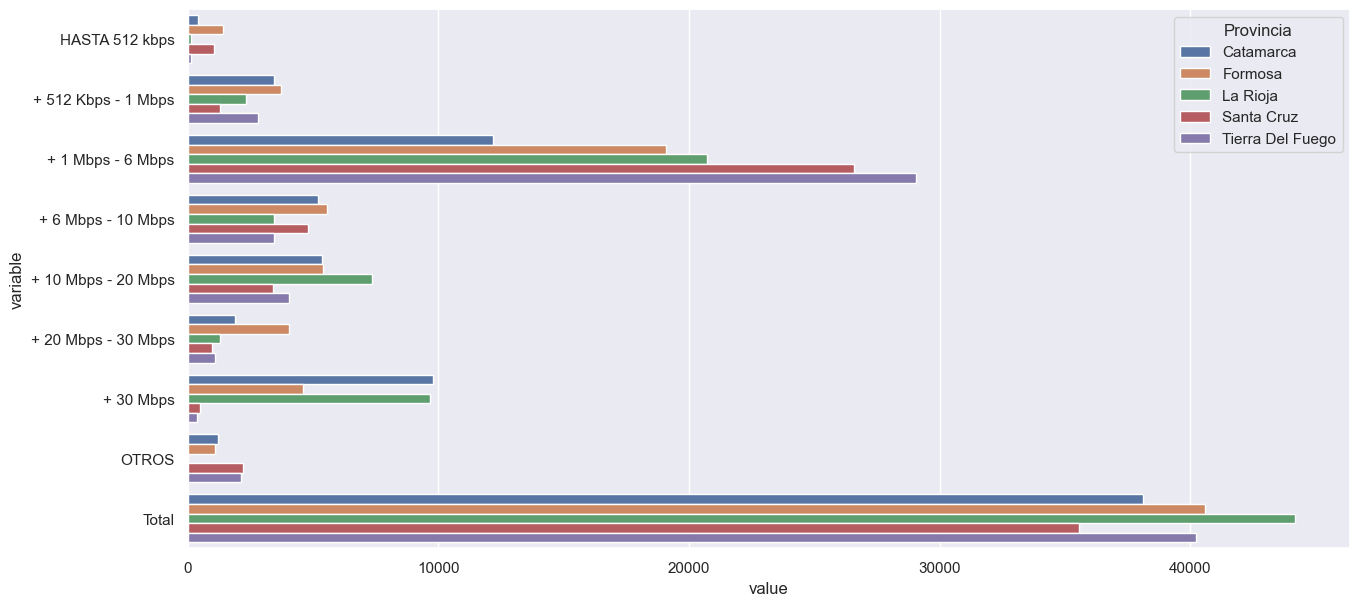

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(data = data_velocidad_melted[data_velocidad_melted.Provincia.isin(['Santa Cruz', 'Catamarca', 'Tierra Del Fuego', 'Formosa', 'La Rioja'])], x= 'value', y='variable', hue='Provincia', ci=None)

---

### 6. Dataset `internet_fijo_localidades_partidos.csv`

In [41]:
internet_fijo_tech_localidades = pd.read_csv('clean_datasets/internet_fijo_localidades_partidos.csv')
internet_fijo_tech_localidades.sample(5)

Provincia                  Partido       Localidad Link Indec  ADSL  \
2871      SANTA FE                San Justo        Angeloni   82112010     0   
140   BUENOS AIRES                Chacabuco       O'Higgins    6210040    54   
970        CORDOBA                    Colón           OTROS  Sin Datos     0   
2313         SALTA  Grl. José de San Martín    Padre Lozano   66056180     0   
1903       MENDOZA            Luján de Cuyo  Las Compuertas   50063070  1050   

      CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  SATELITAL  WIMAX  WIRELESS  \
2871           0        0             0      0          0      0        24   
140           95        0             0      0          0      0        12   
970            0        0             0      0          0      0       287   
2313           0        0             0      0          0      0         0   
1903           0        7             0      0          0      0        42   

      Total general  
2871             24  
140             161  
970             287  
2313              0  
1903           1099

Con este dataset se puede apreciar cuantos accesos a diferentes conexiones de Internet tiene cada Localidad de cada Provincia

In [253]:
tecnologias = ['ADSL','CABLEMODEM','DIAL UP','FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS','Total general']

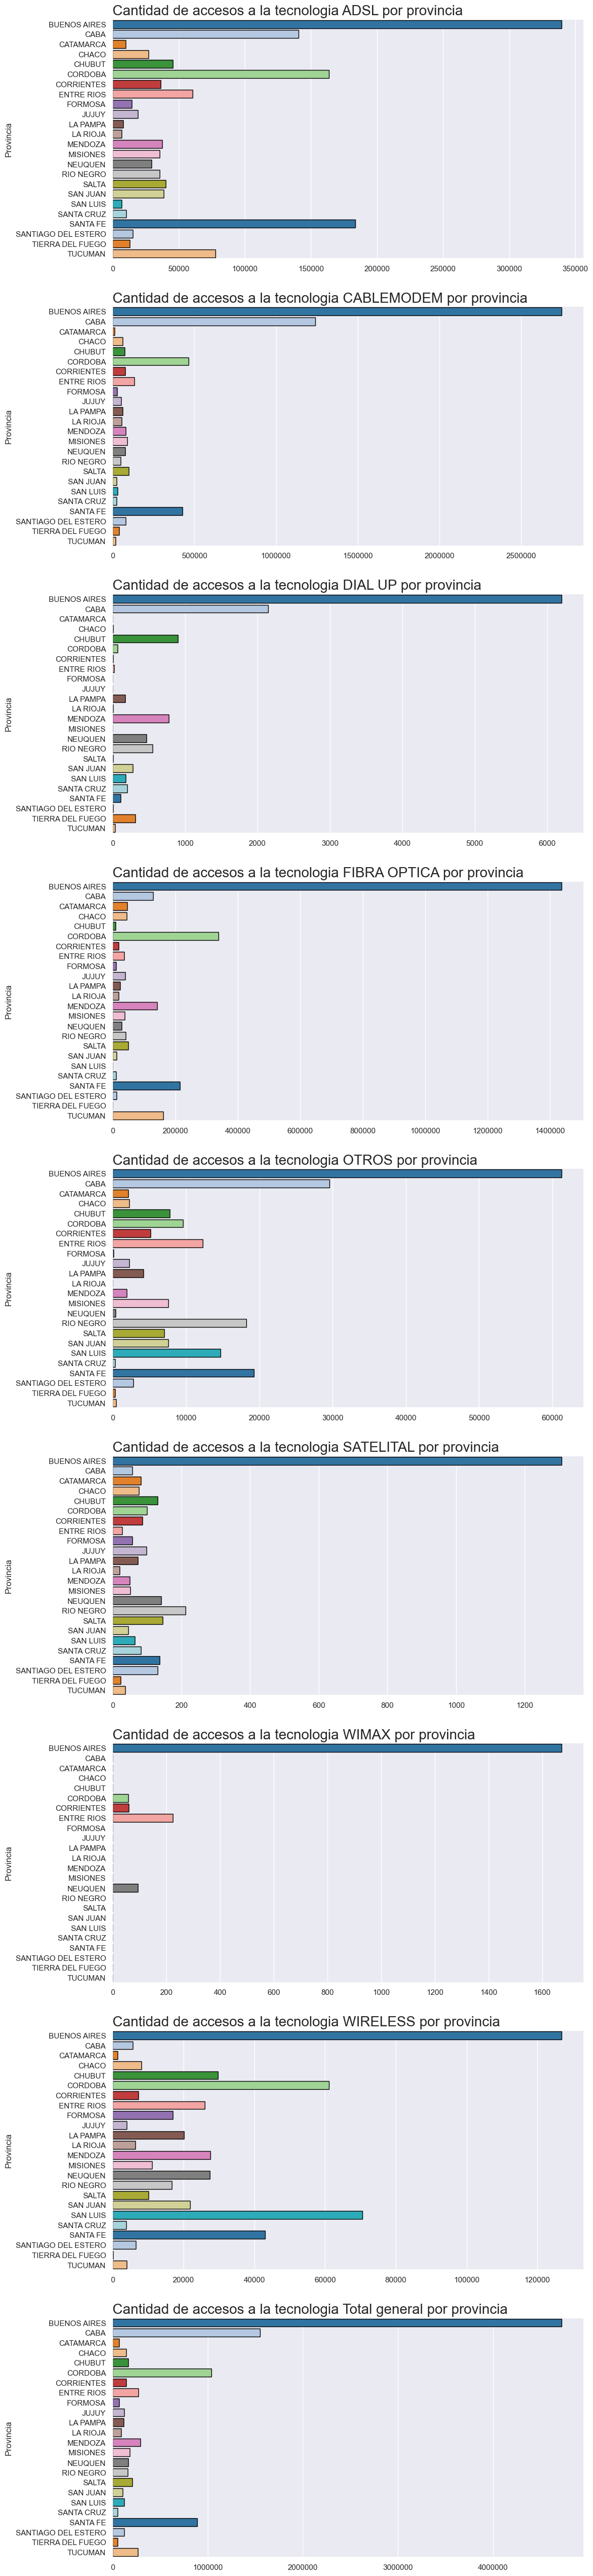

In [269]:
data_internet_tecnologia_localidades = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12,65))

for i in range(9):
    sns.barplot(ax=axes[i], data = data_internet_tecnologia_localidades, x= tecnologias[i],y='Provincia', palette='tab20', edgecolor='black')
    axes[i].set_title(f'Cantidad de accesos a la tecnologia {tecnologias[i]} por provincia', fontsize=20, loc='left')
    axes[i].set_xlabel('')
    axes[i].ticklabel_format(style='plain', axis='x')

In [46]:
provincias = data_internet_tecnologia_localidades.Provincia.unique()
provincias

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [270]:
data_internet_tecnologia_localidades

Provincia    ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  OTROS  \
0          BUENOS AIRES  339648     2748325     6199       1436433  61238   
1                  CABA  140791     1240125     2145        129218  29585   
2             CATAMARCA   10010       10495        1         46224   2152   
3                 CHACO   27164       61800        5         44645   2277   
4                CHUBUT   45377       72212      904          9574   7796   
5               CORDOBA  163770      465461       68        338570   9571   
6            CORRIENTES   36508       77140        4         18619   5174   
7            ENTRE RIOS   60345      132952       22         36971  12320   
8               FORMOSA   14470       25880        1         11041    154   
9                 JUJUY   19257       52978        0         40172   2284   
10             LA PAMPA    7796       60078      171         23551   4206   
11             LA RIOJA    6842       53899        4         19697      7   
12              MENDOZA   37659       78858      777        142615   1939   
13             MISIONES   35513       88902        0         39046   7571   
14              NEUQUEN   29352       75815      468         29396    412   
15            RIO NEGRO   35552       48260      548         41017  18209   
16                SALTA   40006       96984        5         50254   7064   
17             SAN JUAN   38570       22723      281         12328   7592   
18             SAN LUIS    6860       29363      182           248  14739   
19           SANTA CRUZ   10170       24047      198         10815    301   
20             SANTA FE  183740      426255      110        215189  19300   
21  SANTIAGO DEL ESTERO   15385       80937        2         13170   2789   
22     TIERRA DEL FUEGO   12754       39963      312           403    316   
23              TUCUMAN   77738       18518       30        162345    453   

    SATELITAL  WIMAX  WIRELESS  Total general  
0        1307   1672    126846        4721668  
1          57      0      5758        1547679  
2          82      0      1329          70293  
3          77      0      8178         144146  
4         131      0     29784         165778  
5         100     58     61070        1038668  
6          86     59      7256         144846  
7          27    224     26098         268959  
8          57      0     16935          68538  
9          99      0      4033         118823  
10         74      0     20216         116092  
11         20      0      6395          86864  
12         50      0     27625         289523  
13         51      0     11074         182157  
14        142     94     27482         163161  
15        212      0     16760         160558  
16        146      0     10082         204541  
17         45      0     21860         103399  
18         64      0     70614         122070  
19         83      0      3896          49510  
20        137      0     43079         887810  
21        131      0      6618         119032  
22         23      0       125          53896  
23         36      0      3997         263117

In [312]:
data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False)[:5].Provincia.unique()

array(['BUENOS AIRES', 'CABA', 'CORDOBA', 'SANTA FE', 'MENDOZA'],
      dtype=object)

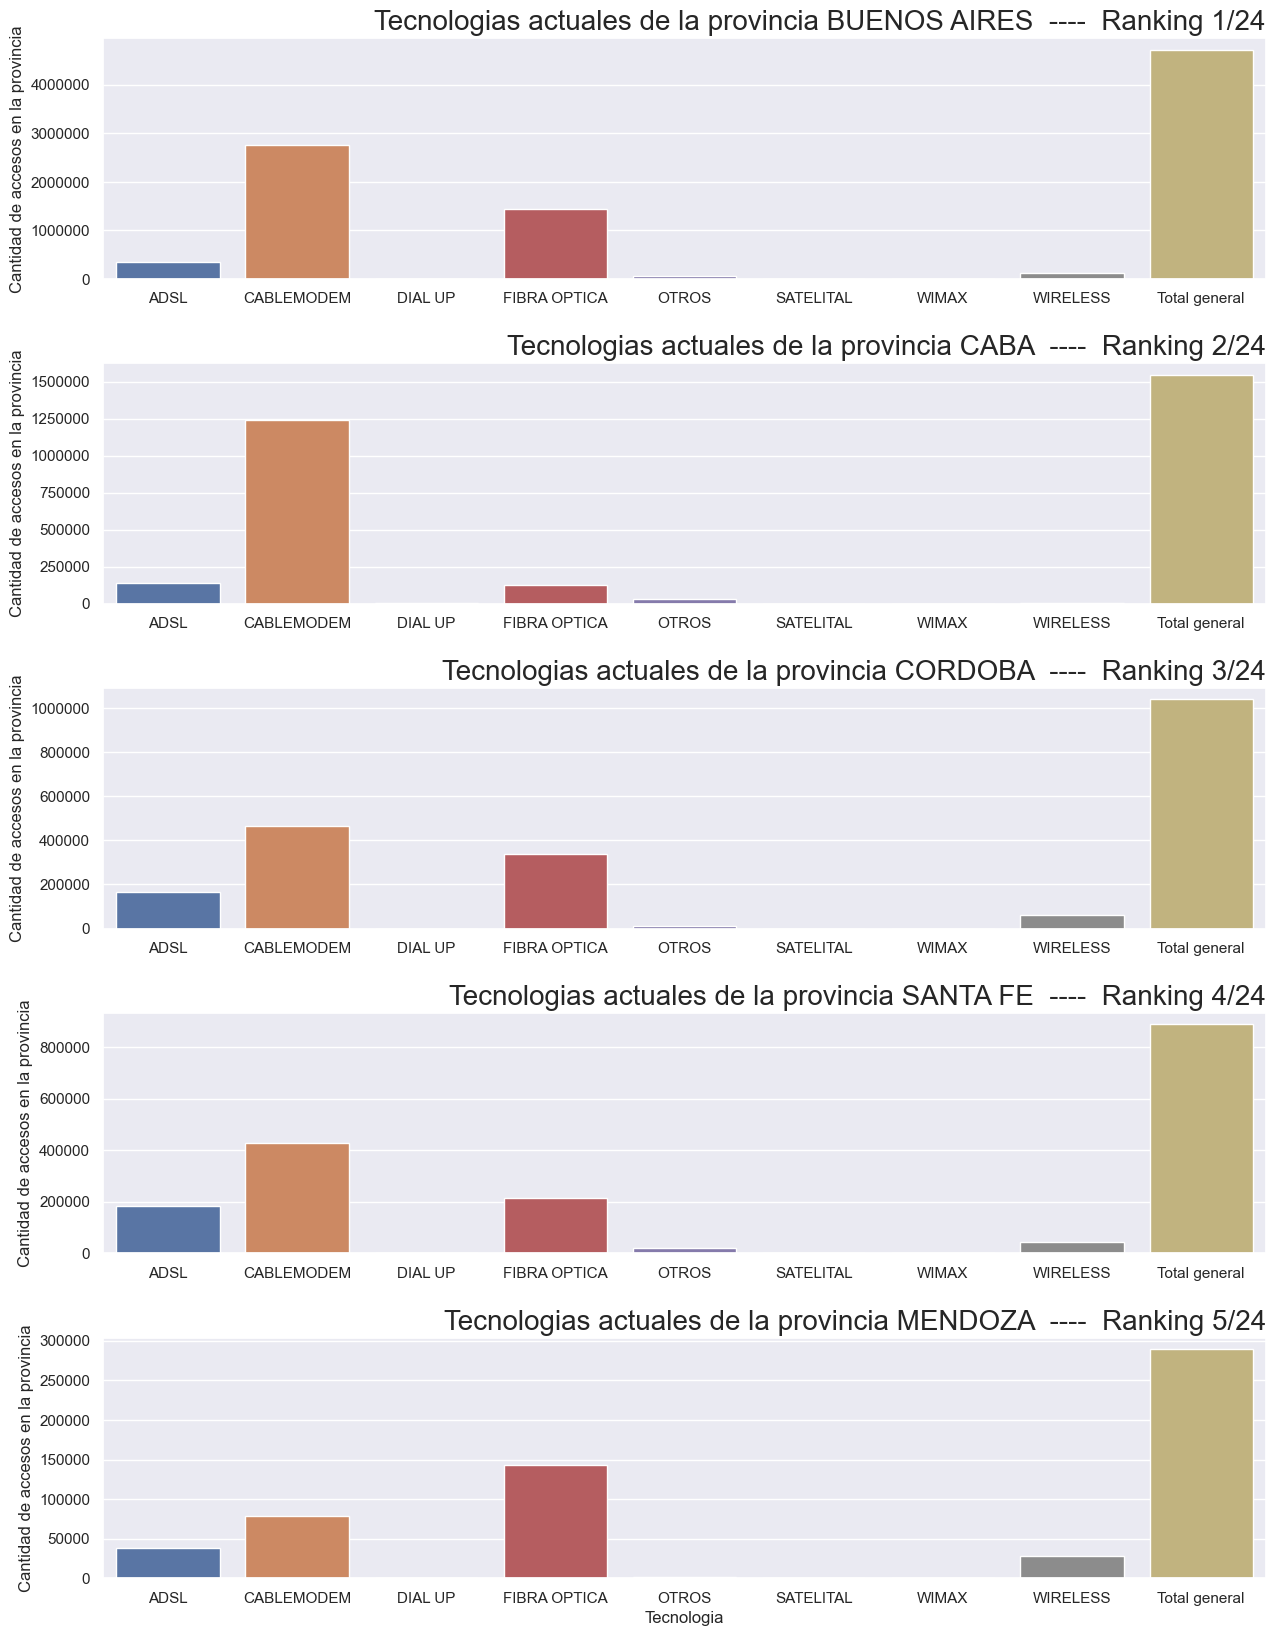

In [332]:
# Las cinco provincias con mas accesos en todo el pais
provincias = data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False).Provincia.unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
for index in range(5):
    sns.barplot(ax=axes[index], data = data_internet_tecnologia_localidades[data_internet_tecnologia_localidades.Provincia == provincias[index]])
    axes[index].set_title(f'Tecnologias actuales de la provincia {provincias[index]}  ----  Ranking {provincias.tolist().index(provincias[index]) + 1}/24', fontsize=20, loc='right')
    axes[index].ticklabel_format(style='plain',axis='y')
    axes[index].set_xlabel('')
    axes[index].set_ylabel('Cantidad de accesos en la provincia', fontsize=12)

axes[4].set_xlabel('Tecnologia', fontsize=12)
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Distribución de las tecnologias de telecomunicaciones en un top 5 de provincias', fontsize=25)
plt.show()

plt.subplots_adjust(hspace=0.35)

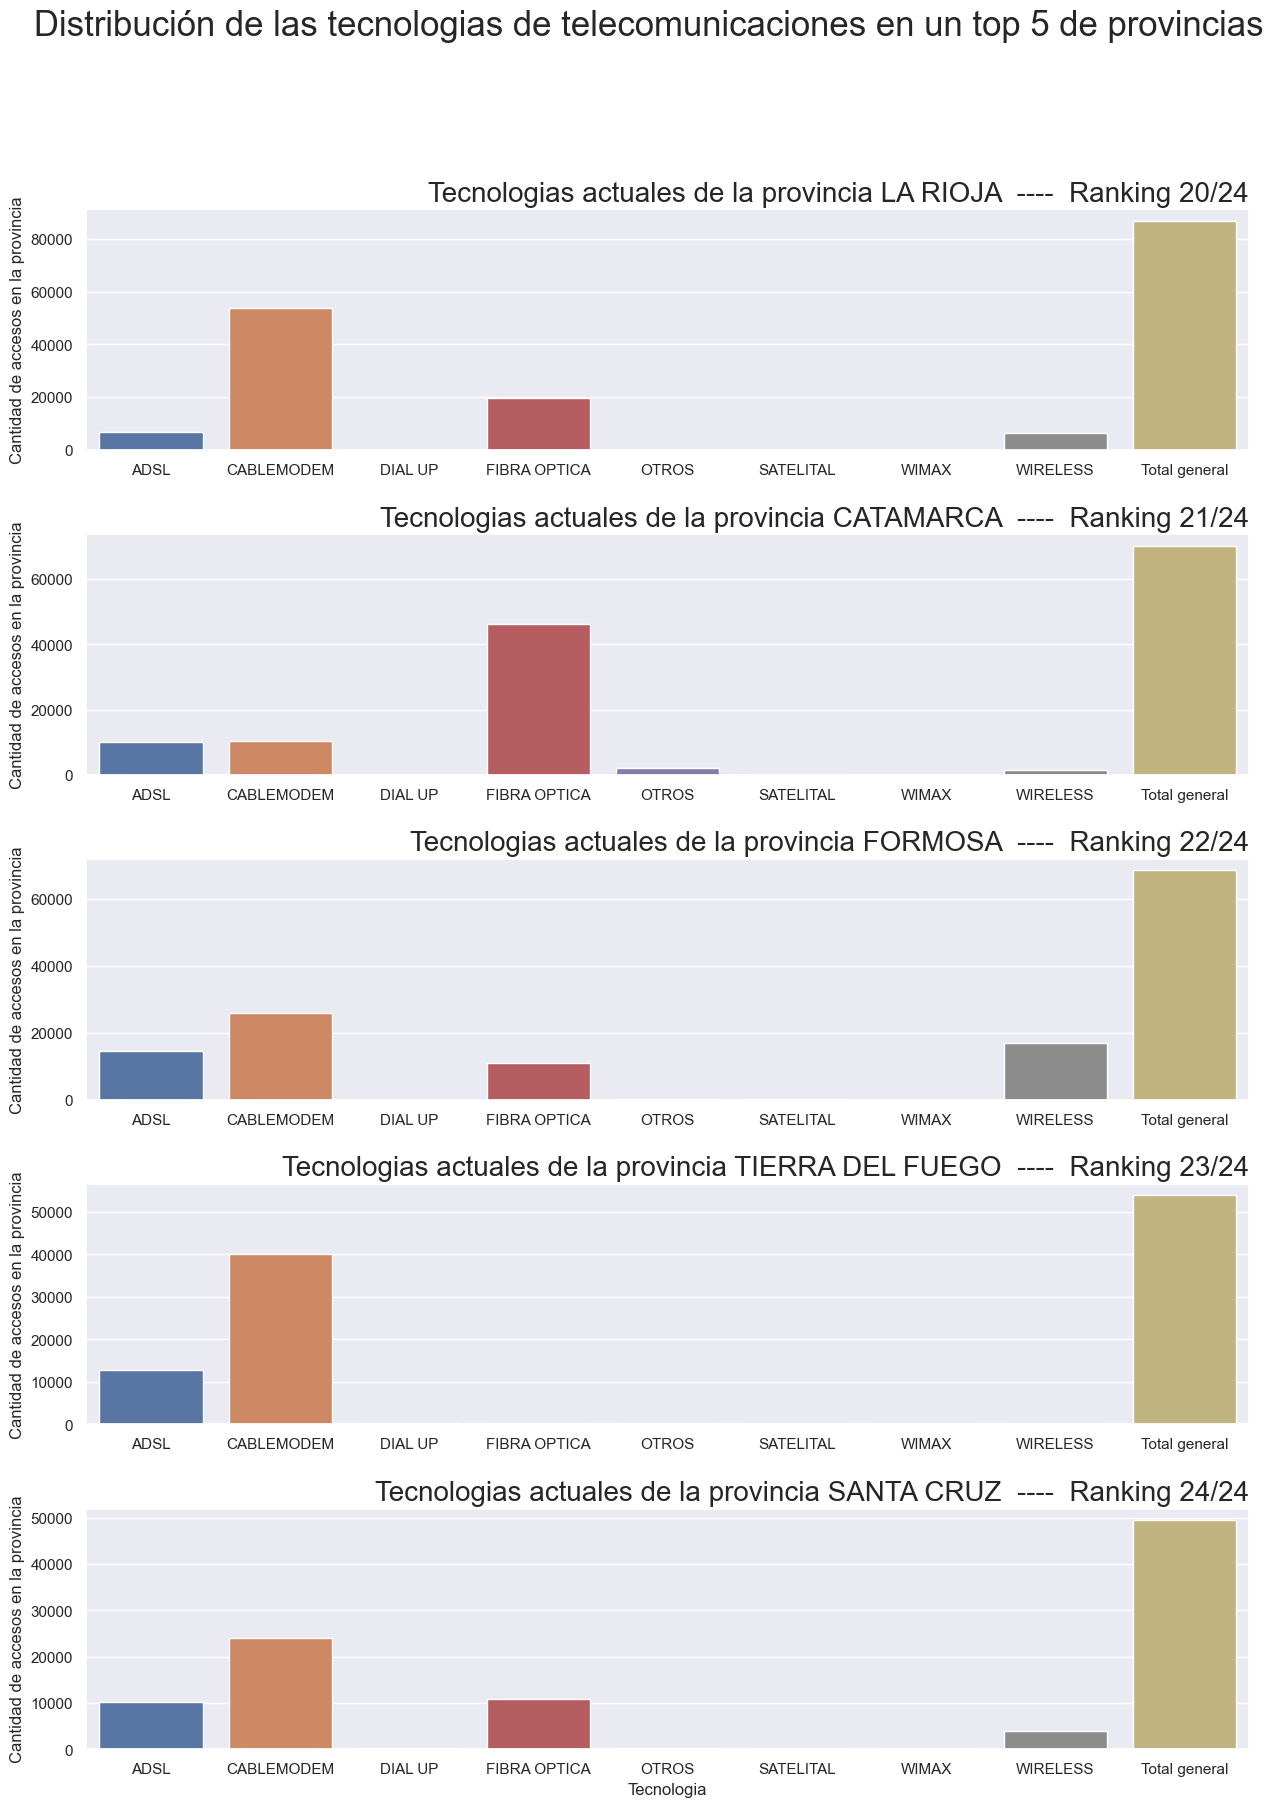

In [343]:
# Las cinco provincias con mas accesos en todo el pais
provincias = data_internet_tecnologia_localidades.sort_values(by='Total general', ascending=False).Provincia.unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,20))
for index in range(-5,0):
    sns.barplot(ax=axes[index], data = data_internet_tecnologia_localidades[data_internet_tecnologia_localidades.Provincia == provincias[index]])
    axes[index].set_title(f'Tecnologias actuales de la provincia {provincias[index]}  ----  Ranking {provincias.tolist().index(provincias[index]) + 1}/24', fontsize=20, loc='right')
    axes[index].ticklabel_format(style='plain',axis='y')
    axes[index].set_xlabel('')
    axes[index].set_ylabel('Cantidad de accesos en la provincia', fontsize=12)

axes[4].set_xlabel('Tecnologia', fontsize=12)
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Distribución de las tecnologias de telecomunicaciones en un top 5 de provincias', fontsize=25)
plt.show()

---

### 7. Dataset `velocidad_bajada_localidades.csv`

In [44]:
df = pd.read_csv('clean_datasets/velocidad_bajada_localidades.csv')
df.sample(3)

Provincia         Partido       Localidad Link Indec   Velocidad  \
14582   RIO NEGRO           OTROS           Otros  Sin Datos  0,512 mbps   
109692    CORDOBA  Tercero Arriba  Dalmacio Vélez   14161040     20 mbps   
224924    MENDOZA       Las Heras       Papagayos   50049040     82 mbps   

        Cantidad  
14582          0  
109692         2  
224924         0

Agrupo el dataset por provincia para que sea mas facil graficar

In [45]:
data = df.groupby(by='Provincia').sum().reset_index()
data.sample(4)

Provincia  Cantidad
4       CHUBUT     20946
14     NEUQUEN     34651
23     TUCUMAN     21015
6   CORRIENTES     28254

Con `pd.melt` junto todas las velocidades en mbps en una columna y en otra sus valores

In [53]:
df_melted = pd.melt(data, id_vars='Provincia') # Exceptuando la columna Provincia

In [54]:
df_melted[df_melted.Provincia == 'CORDOBA'] # Ejemplo

Provincia    variable  value
5      CORDOBA       Otros   4071
29     CORDOBA  0,256 mbps      2
53     CORDOBA  0,375 mbps      0
77     CORDOBA    0,5 mbps     87
101    CORDOBA  0,512 mbps     10
...        ...         ...    ...
1781   CORDOBA     85 mbps      0
1805   CORDOBA     90 mbps      0
1829   CORDOBA     92 mbps      0
1853   CORDOBA     95 mbps      0
1877   CORDOBA    100 mbps   6577

[79 rows x 3 columns]

Quiero crear una columna que represente los `mbps` en un valor numerico para poder setearlo en el eje x del grafico. Para eso extraigo de la columna 'variable' el valor numerico

In [55]:
df_melted['Mbps'] = pd.to_numeric(df_melted['variable'].astype(str).str.strip(' mbps').str.replace(',','.'), errors = 'coerce').astype(float)
# df_melted['Mbps'] = df_melted['Mbps'].fillna(-1) # Asigno los valores 'Otros' a -1

Obtengo un promedio ponderado por cada provincia para ver la media de bajada de cada provincia

*Prueba*

In [56]:
df_provincia = df_melted[df_melted.Provincia == 'TIERRA DEL FUEGO'].dropna(subset='Mbps')

promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
promedio_ponderado

19.635250873515023

In [57]:
promedios_mbps_provincias = {
    'Provincia':[],
    'Promedio de Mbps':[]
}

for prov in df_melted.Provincia.unique():
    df_provincia = df_melted[df_melted.Provincia == prov].dropna(subset='Mbps')
    promedio_ponderado = (df_provincia.value * df_provincia.Mbps).sum() / df_provincia.value.sum()
    promedios_mbps_provincias['Provincia'].append(prov)
    promedios_mbps_provincias['Promedio de Mbps'].append(promedio_ponderado)

df_promedios = pd.DataFrame(promedios_mbps_provincias)

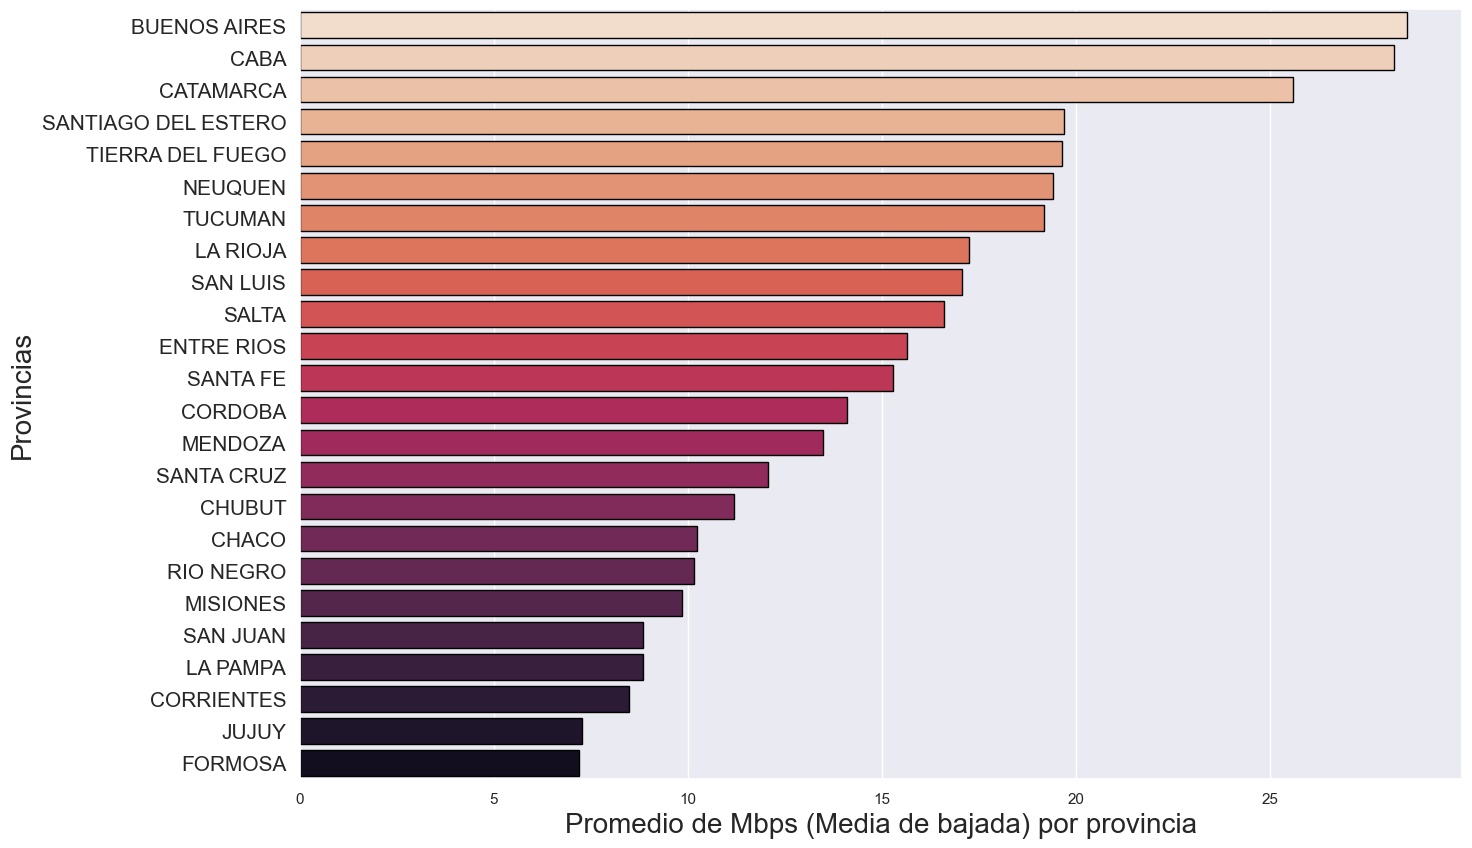

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(data = df_promedios.sort_values(by='Promedio de Mbps', ascending=False), y='Provincia', x='Promedio de Mbps', palette='rocket_r', edgecolor='black')
plt.yticks(fontsize=15)
plt.xlabel('Promedio de Mbps (Media de bajada) por provincia', fontsize=20)
plt.ylabel('Provincias', fontsize=20)
plt.show()

La idea de este grafico es representar en colores mas oscuros las provincias que tienen una menor velocidad promedio de Mbps de internet, caso contrario las provincias con una velocidad de internet alta tienen colores suaves

Veo las velocidades de Internet de una provincia en especifico

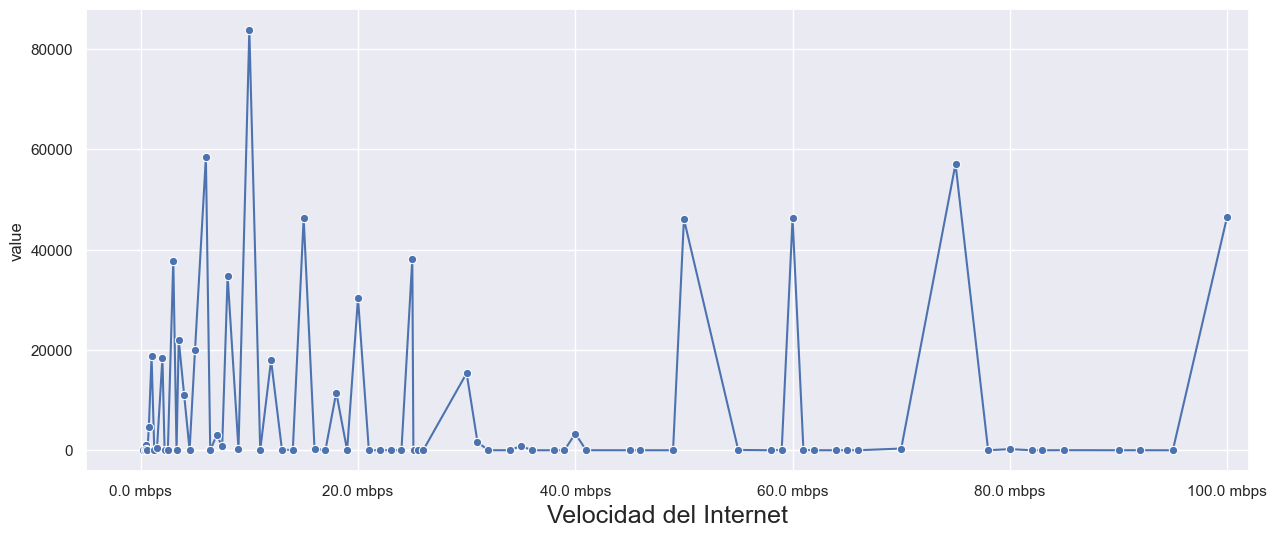

In [60]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df_melted[df_melted.Provincia == 'BUENOS AIRES'], x='Mbps', y='value', marker='o')
plt.xticks(plt.xticks()[0], labels= [f'{tick} mbps' for tick in plt.xticks()[0]])
plt.xlabel('Velocidad del Internet', fontsize=18)
plt.xlim(-5,102)
plt.show()

---

### 8. Dataset `accesos_por_hogares_provincias_trimestral.csv`

In [47]:
accesos_hogares_provincias = pd.read_csv('clean_datasets/accesos_por_hogares_provincias_trimestral.csv')
accesos_hogares_provincias

Año  Trimestre            Provincia  Accesos por cada 100 hogares
0    2022          3         Buenos Aires                         78.11
1    2022          3      Capital Federal                        122.28
2    2022          3            Catamarca                         65.33
3    2022          3                Chaco                         43.86
4    2022          3               Chubut                         84.38
..    ...        ...                  ...                           ...
835  2014          1           Santa Cruz                         28.94
836  2014          1             Santa Fe                         47.85
837  2014          1  Santiago Del Estero                         16.31
838  2014          1     Tierra Del Fuego                         63.97
839  2014          1              Tucumán                         33.42

[840 rows x 4 columns]

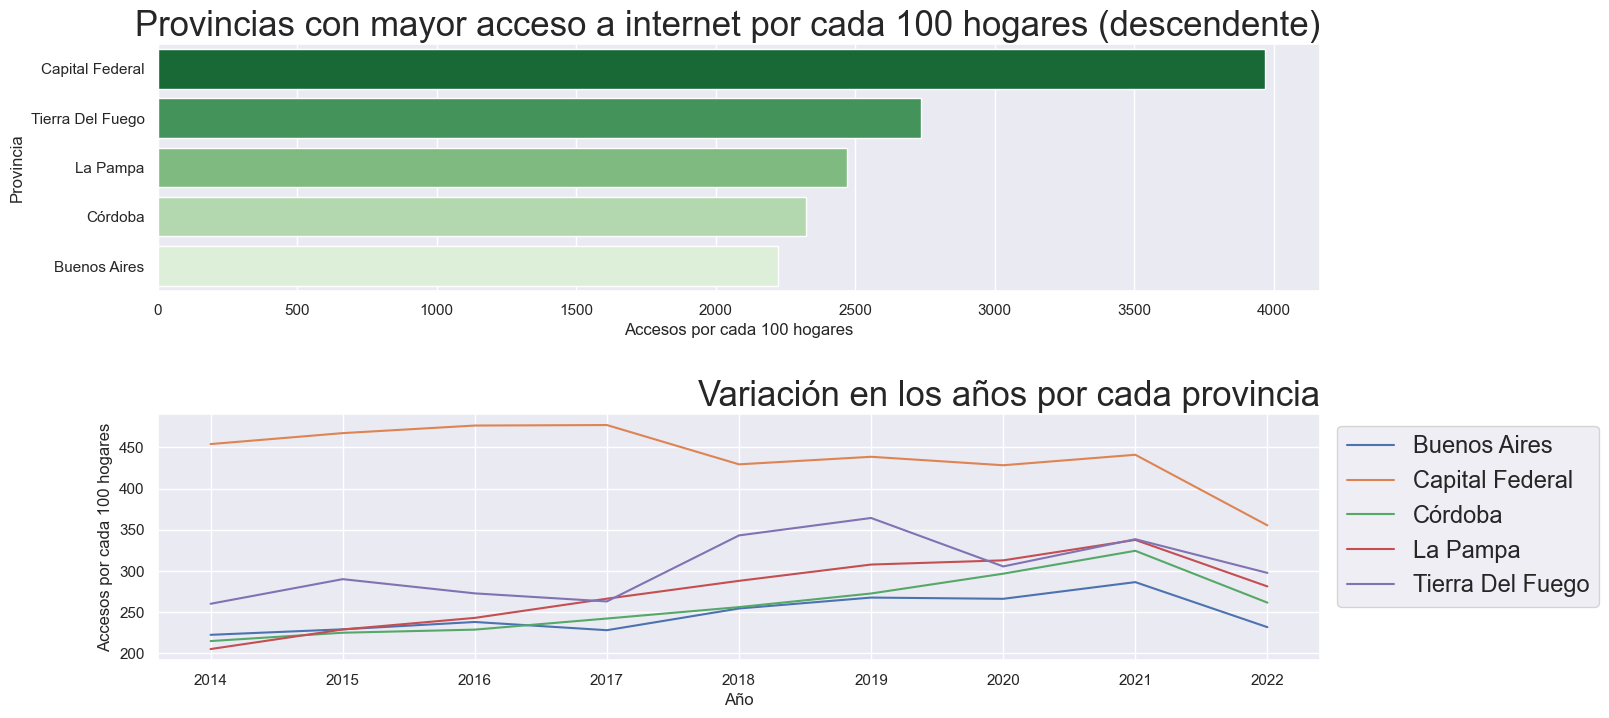

In [48]:
data_hogares = accesos_hogares_provincias.groupby(by=['Provincia']).sum().reset_index() # Grafico 1
data = accesos_hogares_provincias.groupby(by=['Año','Provincia']).sum().reset_index() # Grafico 2

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))
# Mejores provincias
sns.barplot(ax=axes[0],
            data = data_hogares.sort_values(by='Accesos por cada 100 hogares', ascending=False)[:5],
            y='Provincia',
            x='Accesos por cada 100 hogares',
            palette='Greens_r')
axes[0].set_title('Provincias con mayor acceso a internet por cada 100 hogares (descendente)', fontsize=25, loc='right')


sns.lineplot(ax=axes[1],
            data = data[data.Provincia.isin(data_hogares.sort_values(by='Accesos por cada 100 hogares',
            ascending=False)[:5]['Provincia'].unique())], 
            x='Año', 
            y='Accesos por cada 100 hogares', 
            hue='Provincia',
            linewidth=1.5)
axes[1].set_title('Variación en los años por cada provincia', fontsize=25, loc='right')
axes[1].legend(fontsize=17, loc='upper right', ncol=1, bbox_to_anchor=(1.25,1))
plt.subplots_adjust(hspace=0.5)

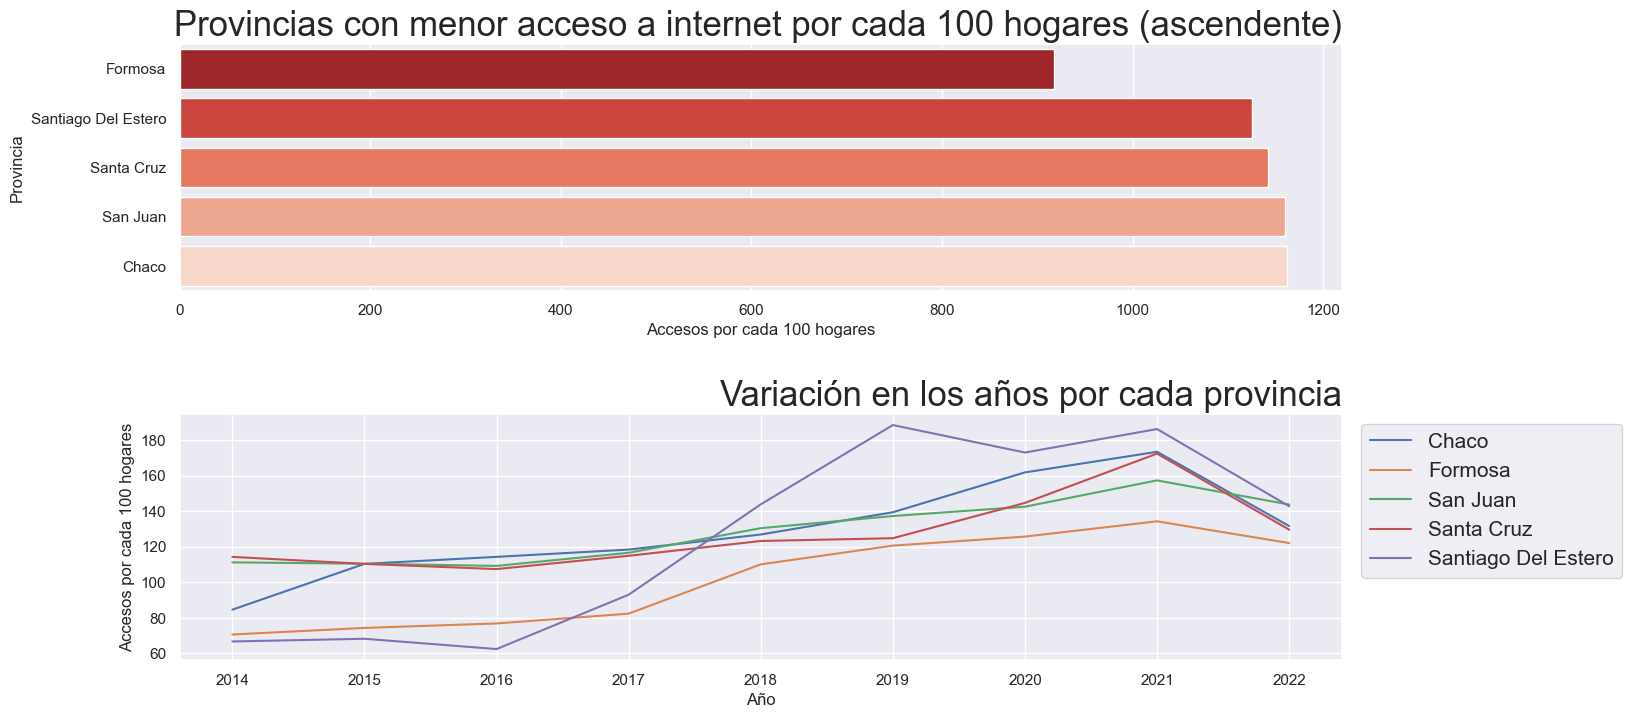

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

# Peores provincias
sns.barplot(ax=axes[0],
            data = data_hogares.sort_values(by='Accesos por cada 100 hogares', ascending=True)[:5],
            y='Provincia',
            x='Accesos por cada 100 hogares',
            palette='Reds_r')
axes[0].set_title('Provincias con menor acceso a internet por cada 100 hogares (ascendente)', fontsize=25, loc='right')


sns.lineplot(ax=axes[1],
            data = data[data.Provincia.isin(data_hogares.sort_values(by='Accesos por cada 100 hogares',
            ascending=True)[:5]['Provincia'].unique())], 
            x='Año', 
            y='Accesos por cada 100 hogares', 
            hue='Provincia',
            linewidth=1.5)
axes[1].set_title('Variación en los años por cada provincia', fontsize=25, loc='right')
axes[1].legend(fontsize=15, loc='upper right', ncol=1, bbox_to_anchor=(1.25,1))
plt.subplots_adjust(hspace=0.5)

---

### 9. Dataset `ingresos_internet_trimestral.csv`

In [65]:
ingresos_internet_trimestral = pd.read_csv('clean_datasets/ingresos_internet_trimestral.csv')
ingresos_internet_trimestral

Año  Trimestre  Ingresos (miles de pesos)        Periodo
0   2022          3                  67055.930  Jul-Sept 2022
1   2022          2                  60335.724   Abr-Jun 2022
2   2022          1                  55589.997   Ene-Mar 2022
3   2021          4                  45467.887   Oct-Dic 2021
4   2021          3                  42999.944  Jul-Sept 2021
5   2021          2                  38239.667   Abr-Jun 2021
6   2021          1                  36676.371   Ene-Mar 2021
7   2020          4                  33539.703   Oct-Dic 2020
8   2020          3                  31997.445  Jul-Sept 2020
9   2020          2                  32102.476   Abr-Jun 2020
10  2020          1                  29946.216   Ene-Mar 2020
11  2019          4                  24169.251   Oct-Dic 2019
12  2019          3                  21652.748  Jul-Sept 2019
13  2019          2                  20743.118   Abr-Jun 2019
14  2019          1                  20207.414   Ene-Mar 2019
15  2018          4                  16637.687   Oct-Dic 2018
16  2018          3                  15410.981  Jul-Sept 2018
17  2018          2                  14319.467   Abr-Jun 2018
18  2018          1                  13171.459   Ene-Mar 2018
19  2017          4                  11226.127   Oct-Dic 2017
20  2017          3                  10065.998  Jul-Sept 2017
21  2017          2                   9786.700   Abr-Jun 2017
22  2017          1                   8012.100   Ene-Mar 2017
23  2016          4                   7839.000   Oct-Dic 2016
24  2016          3                   6124.200  Jul-Sept 2016
25  2016          2                   6342.100   Abr-Jun 2016
26  2016          1                   5368.500   Ene-Mar 2016
27  2015          4                   5768.900   Oct-Dic 2015
28  2015          3                   5537.900  Jul-Sept 2015
29  2015          2                   4017.100   Abr-Jun 2015
30  2015          1                   4763.500   Ene-Mar 2015
31  2014          4                   3504.100   Oct-Dic 2014
32  2014          3                   3786.800  Jul-Sept 2014
33  2014          2                   3708.600   Abr-Jun 2014
34  2014          1                   2840.400   Ene-Mar 2014

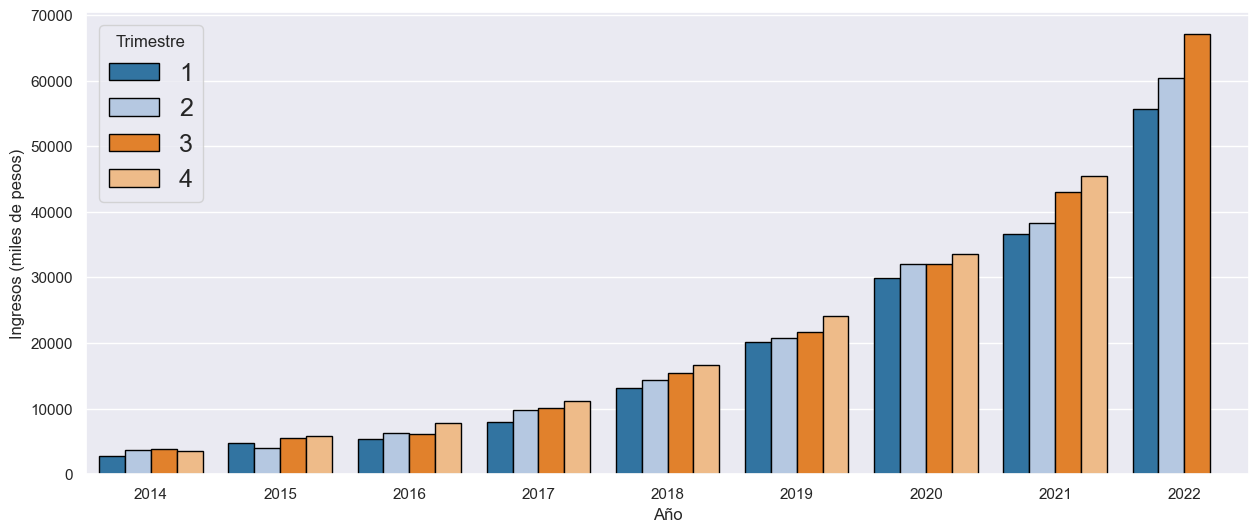

In [66]:
plt.figure(figsize=(15,6))
sns.barplot(data = ingresos_internet_trimestral, x='Año', y='Ingresos (miles de pesos)', hue='Trimestre', palette='tab20', edgecolor='black')
plt.legend(title='Trimestre',fontsize=18)

Voy a comparar cuales fueron los ingresos 

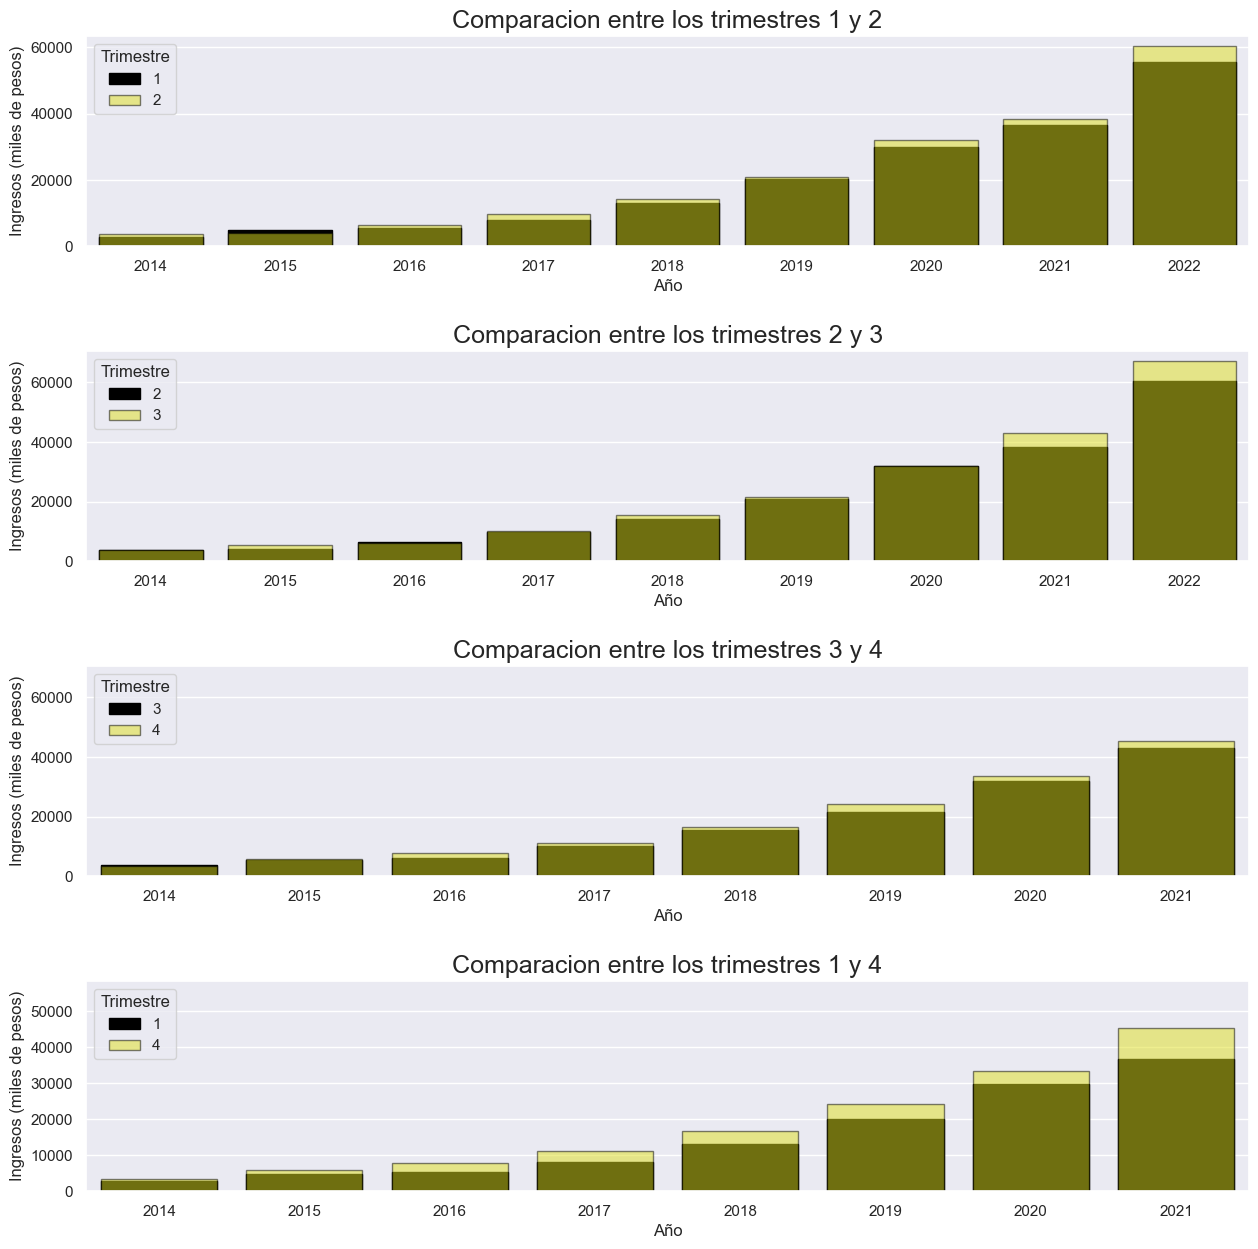

In [67]:
fig, axes = plt.subplots(nrows=4,ncols = 1, figsize=(15,15))
sns.barplot(ax=axes[0],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 1], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[0], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 2], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[0].set_title('Comparacion entre los trimestres 1 y 2', fontsize=18)

sns.barplot(ax=axes[1],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 2], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[1], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 3], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[1].set_title('Comparacion entre los trimestres 2 y 3', fontsize=18)

sns.barplot(ax=axes[2],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 3], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[2], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 4], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'] )
axes[2].set_title('Comparacion entre los trimestres 3 y 4', fontsize=18)

sns.barplot(ax=axes[3],data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 1], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=1, edgecolor='black', palette=['black'])
sns.barplot(ax=axes[3], data=ingresos_internet_trimestral[ingresos_internet_trimestral['Trimestre'] == 4], x='Año', y='Ingresos (miles de pesos)',hue='Trimestre', alpha=0.5,edgecolor='black', palette=['yellow'])
axes[3].set_title('Comparacion entre los trimestres 1 y 4', fontsize=18)

plt.subplots_adjust(hspace=0.5)

---

### 10. Dataset `mbps_pais_trimestral.csv`

In [50]:
mbps_pais_trimestral = pd.read_csv('clean_datasets/mbps_pais_trimestral.csv')
mbps_pais_trimestral

Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0   2022          3                   62.46  Jul-Sept 2022
1   2022          2                   58.44   Abr-Jun 2022
2   2022          1                   55.11   Ene-Mar 2022
3   2021          4                   52.34   Oct-Dic 2021
4   2021          3                   48.46  Jul-Sept 2021
5   2021          2                   45.63   Abr-Jun 2021
6   2021          1                   43.11   Ene-Mar 2021
7   2020          4                   42.36   Oct-Dic 2020
8   2020          3                   40.67  Jul-Sept 2020
9   2020          2                   38.32   Abr-Jun 2020
10  2020          1                   37.52   Ene-Mar 2020
11  2019          4                   28.26   Oct-Dic 2019
12  2019          3                   24.18  Jul-Sept 2019
13  2019          2                   20.33   Abr-Jun 2019
14  2019          1                   17.38   Ene-Mar 2019
15  2018          4                   15.95   Oct-Dic 2018
16  2018          3                   15.36  Jul-Sept 2018
17  2018          2                   13.85   Abr-Jun 2018
18  2018          1                   13.22   Ene-Mar 2018
19  2017          4                   12.01   Oct-Dic 2017
20  2017          3                    8.34  Jul-Sept 2017
21  2017          2                    7.16   Abr-Jun 2017
22  2017          1                    6.62   Ene-Mar 2017
23  2016          4                    6.34   Oct-Dic 2016
24  2016          3                    5.94  Jul-Sept 2016
25  2016          2                    5.42   Abr-Jun 2016
26  2016          1                    5.08   Ene-Mar 2016
27  2015          4                    4.99   Oct-Dic 2015
28  2015          3                    4.79  Jul-Sept 2015
29  2015          2                    4.55   Abr-Jun 2015
30  2015          1                    4.35   Ene-Mar 2015
31  2014          4                    4.16   Oct-Dic 2014
32  2014          3                    3.87  Jul-Sept 2014
33  2014          2                    3.76   Abr-Jun 2014
34  2014          1                    3.62   Ene-Mar 2014

In [51]:
mbps_pais_trimestral.groupby(by=['Año','Trimestre']).mean()[:10]

Mbps (Media de bajada)
Año  Trimestre                        
2014 1                            3.62
     2                            3.76
     3                            3.87
     4                            4.16
2015 1                            4.35
     2                            4.55
     3                            4.79
     4                            4.99
2016 1                            5.08
     2                            5.42

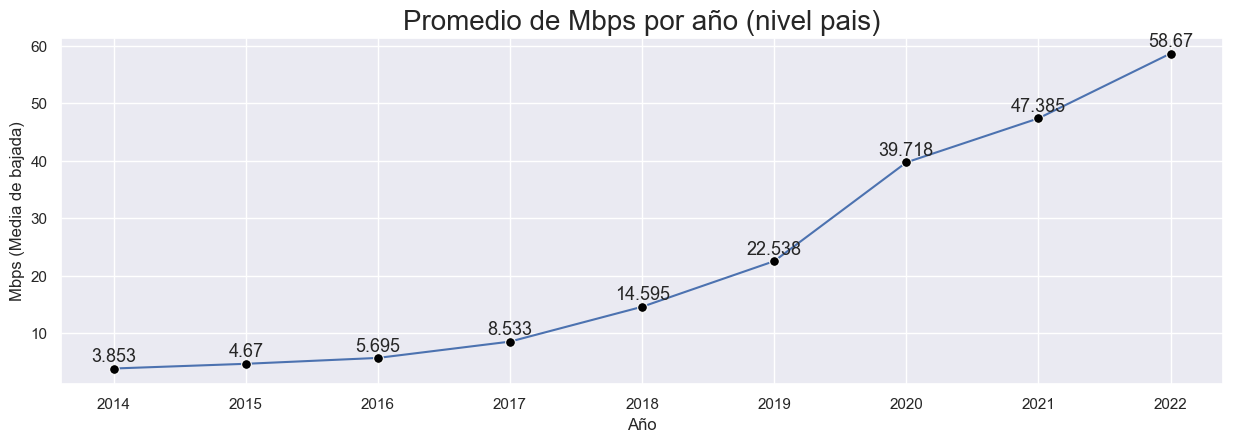

In [113]:
plt.figure(figsize=(15,4.5))
sns.lineplot(data = mbps_pais_trimestral.groupby(by='Año').mean(), y='Mbps (Media de bajada)', x='Año', palette='flare', marker='o', markerfacecolor='black', markersize=7)

# Agregar los valores al lado de los marcadores
for x, y in zip(mbps_pais_trimestral.groupby(by='Año').mean().reset_index()['Año'], mbps_pais_trimestral.groupby(by='Año').mean().reset_index()['Mbps (Media de bajada)']):
    plt.annotate(f'{round(y,3)}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=13)

plt.title('Promedio de Mbps por año (nivel pais)', fontsize=20)
plt.show()

---

### 11. Dataset `servicios_localidades_partido.csv`

In [188]:
servicios_localidades = pd.read_csv('clean_datasets/servicios_localidades_partido.csv')
servicios_localidades

Provincia       Partido        Localidad ADSL DIALUP FIBRAOPTICA  \
0              NaN  Bahía Blanca    Villa Bordeau  NaN     No          No   
1     BUENOS AIRES           NaN     Villa Espora   No    NaN          No   
2     BUENOS AIRES           NaN              NaN   Si    NaN         NaN   
3     BUENOS AIRES      Balcarce              NaN   No     No         NaN   
4     BUENOS AIRES           NaN        Napaleofú   No    NaN          Si   
...            ...           ...              ...  ...    ...         ...   
4307           NaN     Quitilipi        Quitilipi   Si     No          Si   
4308           NaN     Quitilipi  Villa El Palmar  NaN     No          No   
4309         CHACO  San Fernando              NaN   Si     No         NaN   
4310         CHACO           NaN              NaN   Si    NaN         NaN   
4311         CHACO  San Fernando  Colonia Baranda  NaN     No          No   

       4G TELEFONIAFIJA SATELITAL  
0     NaN            No        No  
1      No           NaN       NaN  
2      Si           NaN       NaN  
3      No            Si        No  
4      Si           NaN        No  
...   ...           ...       ...  
4307   Si            Si        No  
4308  NaN            No        No  
4309   Si            Si       NaN  
4310   Si           NaN       NaN  
4311  NaN            No        No  

[4312 rows x 9 columns]

Para poder agrupar por provincia y visualizar la cantidad por tecnologia/servicio, debo cambiar los strings por valores numericos, es decir, 'Si' por 1 y 'No' por 0

In [189]:
columnas = ['ADSL', 'DIALUP', 'FIBRAOPTICA',
            '4G', 'TELEFONIAFIJA', 'SATELITAL']

for c in columnas:
    servicios_localidades[c] = servicios_localidades[c].str.replace('Si','1').replace('No','0')
    servicios_localidades[c] = pd.to_numeric(servicios_localidades[c], errors='coerce')

In [190]:
servicios_localidades.dropna(subset='Provincia')

Provincia       Partido                Localidad  ADSL  DIALUP  \
1     BUENOS AIRES           NaN             Villa Espora   0.0     NaN   
2     BUENOS AIRES           NaN                      NaN   1.0     NaN   
3     BUENOS AIRES      Balcarce                      NaN   0.0     0.0   
4     BUENOS AIRES           NaN                Napaleofú   0.0     NaN   
5     BUENOS AIRES      Balcarce              Ramos Otero   NaN     0.0   
...            ...           ...                      ...   ...     ...   
4305         CHACO           NaN                      NaN   0.0     0.0   
4306         CHACO           NaN  Presidencia de la Plaza   1.0     NaN   
4309         CHACO  San Fernando                      NaN   1.0     0.0   
4310         CHACO           NaN                      NaN   1.0     NaN   
4311         CHACO  San Fernando          Colonia Baranda   NaN     0.0   

      FIBRAOPTICA   4G  TELEFONIAFIJA  SATELITAL  
1             0.0  0.0            NaN        NaN  
2             NaN  1.0            NaN        NaN  
3             NaN  0.0            1.0        0.0  
4             1.0  1.0            NaN        0.0  
5             0.0  NaN            0.0        NaN  
...           ...  ...            ...        ...  
4305          NaN  1.0            0.0        0.0  
4306          1.0  1.0            NaN        NaN  
4309          NaN  1.0            1.0        NaN  
4310          NaN  1.0            NaN        NaN  
4311          0.0  NaN            0.0        0.0  

[2876 rows x 9 columns]

In [191]:
servicios_localidades_copia = servicios_localidades.copy() 
for c in columnas:
    dummies = pd.get_dummies(servicios_localidades[c], prefix='', prefix_sep='')
    dummies.rename(columns={'1.0': f'CON {c}', '0.0': f'SIN {c}'}, inplace=True)
    servicios_localidades_copia = pd.concat([servicios_localidades_copia, dummies], axis=1)
    servicios_localidades_copia.drop(columns={c}, axis=1, inplace=True)

In [211]:
data = servicios_localidades_copia.dropna(subset='Provincia').groupby(by='Provincia').sum().reset_index()
data.head()

Provincia  SIN ADSL  CON ADSL  SIN DIALUP  CON DIALUP  SIN FIBRAOPTICA  \
0  BUENOS AIRES       272       175         230          76              156   
1          CABA         0        22           0          20                0   
2     CATAMARCA        88         3          57           0               51   
3         CHACO        31        16          30           1               10   
4        CHUBUT        38         6          25           6               25   

   CON FIBRAOPTICA  SIN 4G  CON 4G  SIN TELEFONIAFIJA  CON TELEFONIAFIJA  \
0              146     118     329                114                189   
1               13       0      22                  0                 19   
2               10      62      29                 45                 12   
3               17       7      40                 12                 18   
4                5      26      18                 11                 23   

   SIN SATELITAL  CON SATELITAL  
0            327             74  
1              0             18  
2             55             29  
3             23             16  
4             15             20

In [215]:
data_melted = pd.melt(data, id_vars='Provincia', var_name='Tecnologia', value_name='Cantidad de Localidades/Partidos')
data_melted

Provincia     Tecnologia  Cantidad de Localidades/Partidos
0           BUENOS AIRES       SIN ADSL                               272
1                   CABA       SIN ADSL                                 0
2              CATAMARCA       SIN ADSL                                88
3                  CHACO       SIN ADSL                                31
4                 CHUBUT       SIN ADSL                                38
..                   ...            ...                               ...
283           SANTA CRUZ  CON SATELITAL                                 9
284             SANTA FE  CON SATELITAL                                38
285  SANTIAGO DEL ESTERO  CON SATELITAL                                30
286     TIERRA DEL FUEGO  CON SATELITAL                                 2
287              TUCUMAN  CON SATELITAL                                 7

[288 rows x 3 columns]

In [212]:
data.columns

Index(['Provincia', 'SIN ADSL', 'CON ADSL', 'SIN DIALUP', 'CON DIALUP',
       'SIN FIBRAOPTICA', 'CON FIBRAOPTICA', 'SIN 4G', 'CON 4G',
       'SIN TELEFONIAFIJA', 'CON TELEFONIAFIJA', 'SIN SATELITAL',
       'CON SATELITAL'],
      dtype='object')

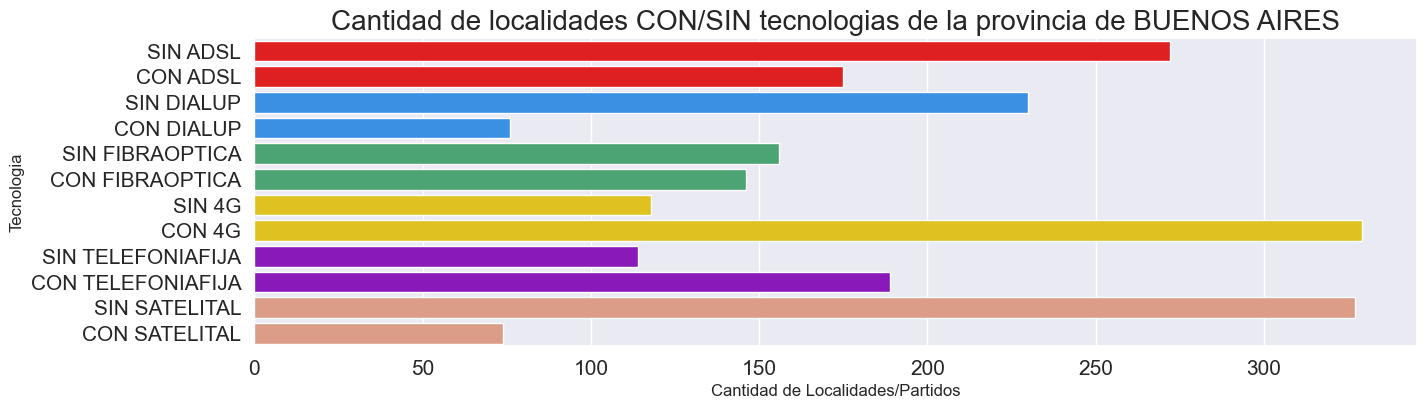

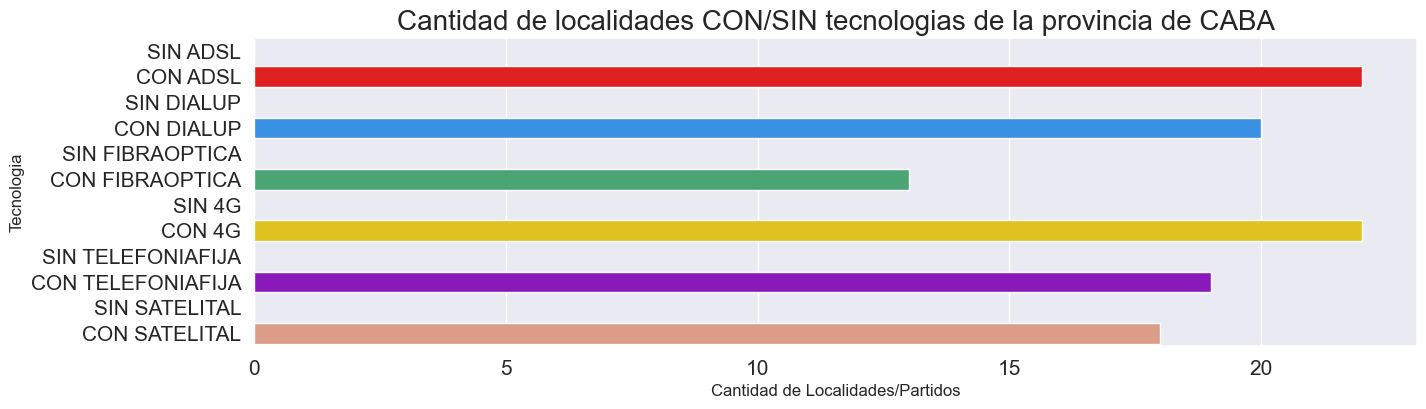

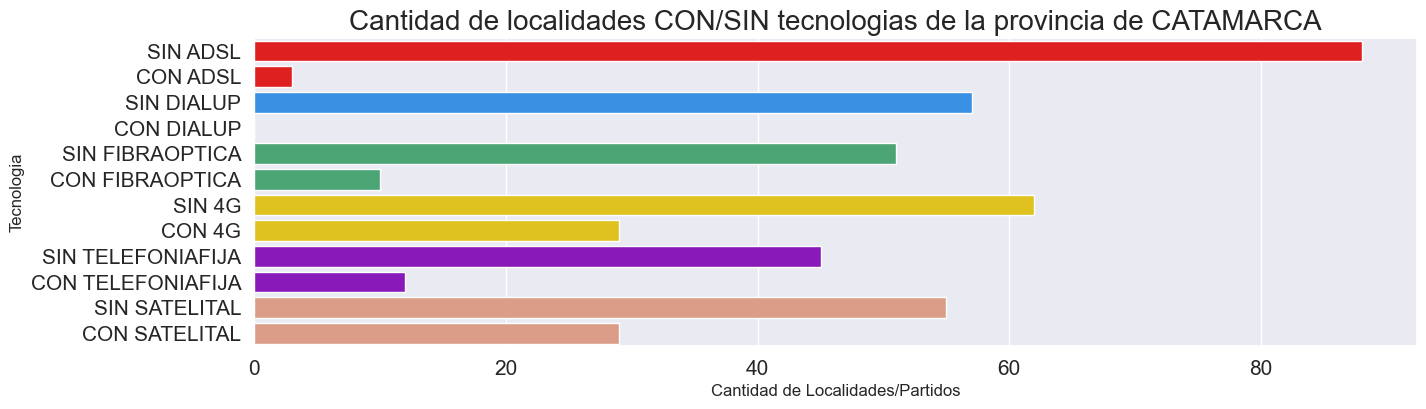

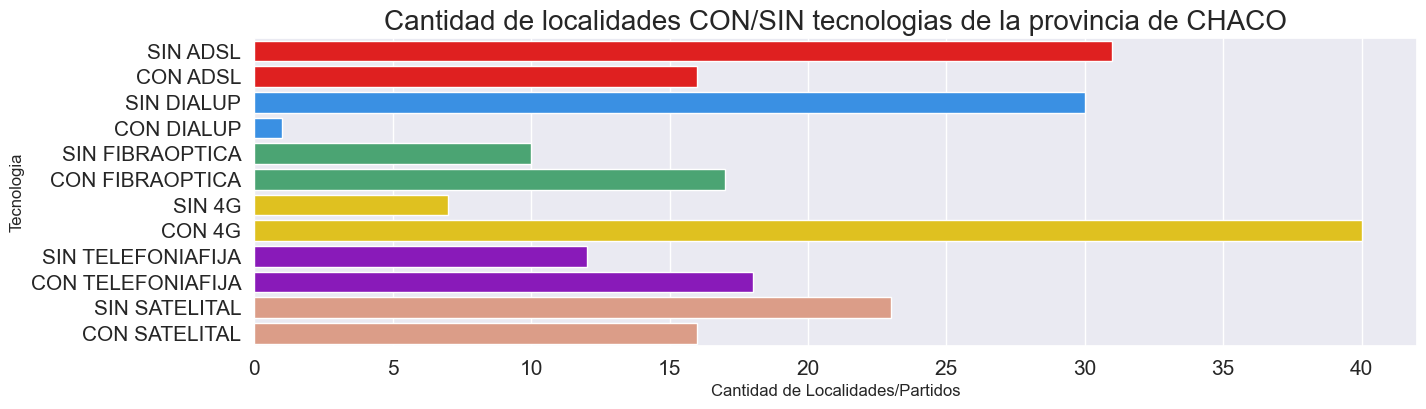

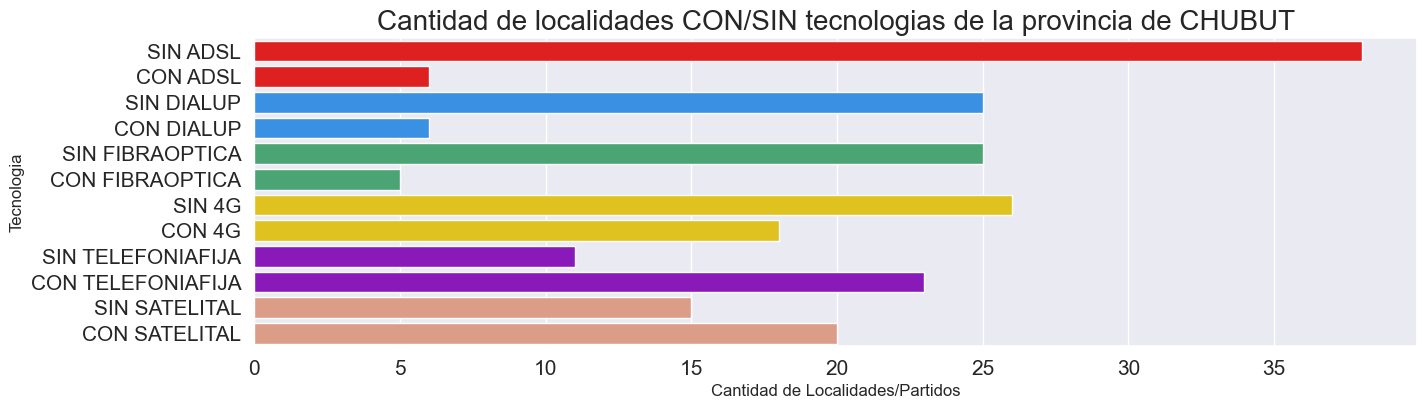

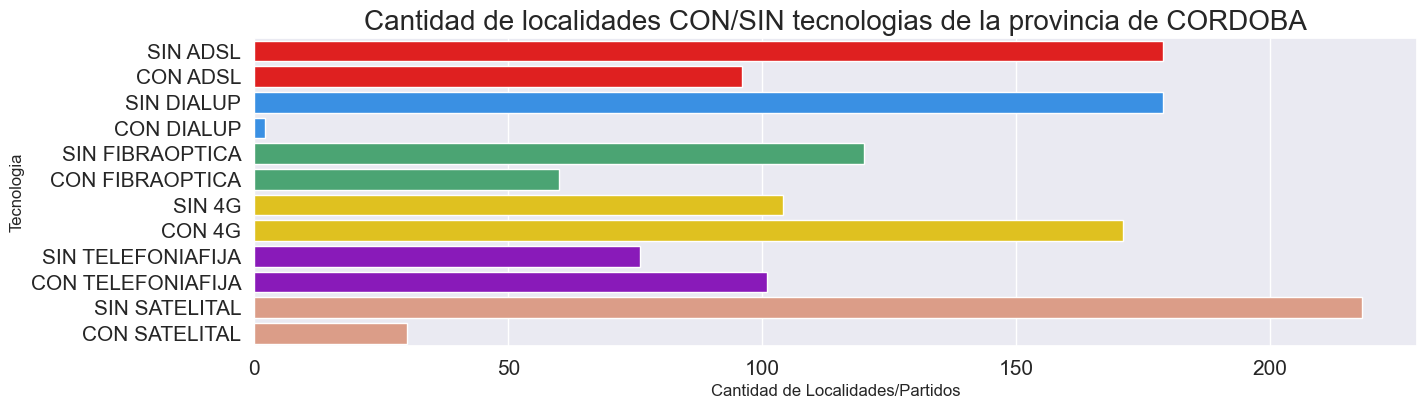

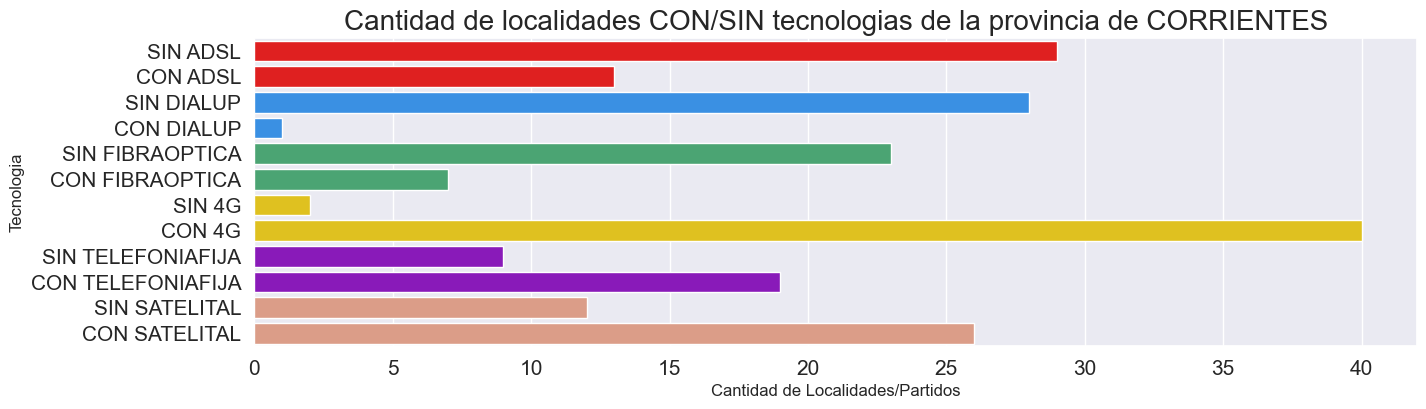

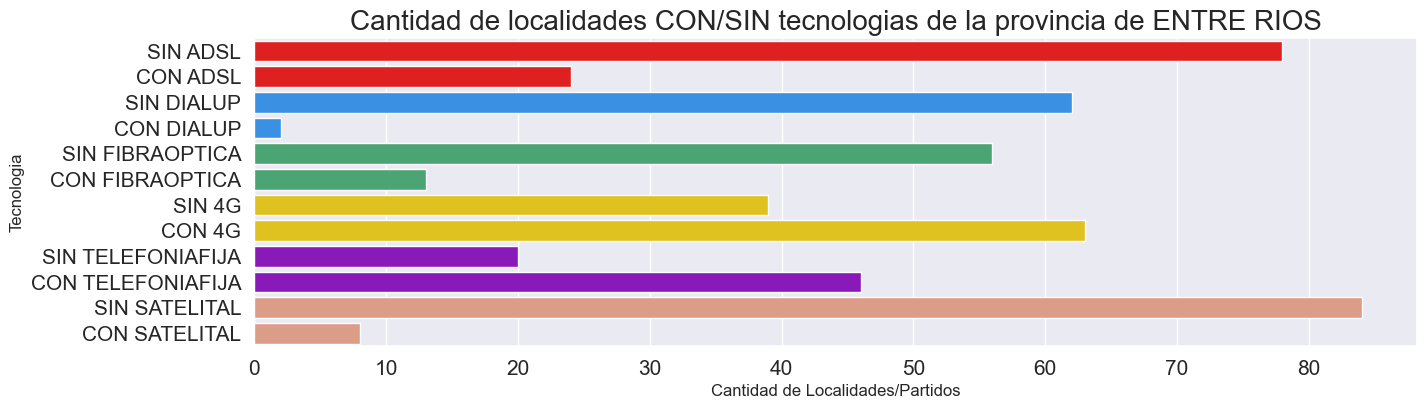

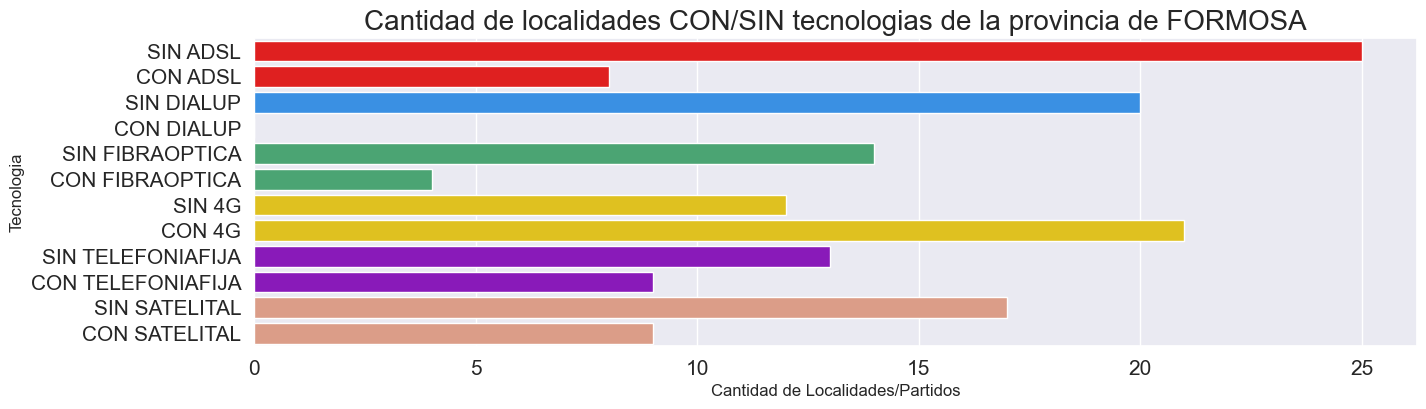

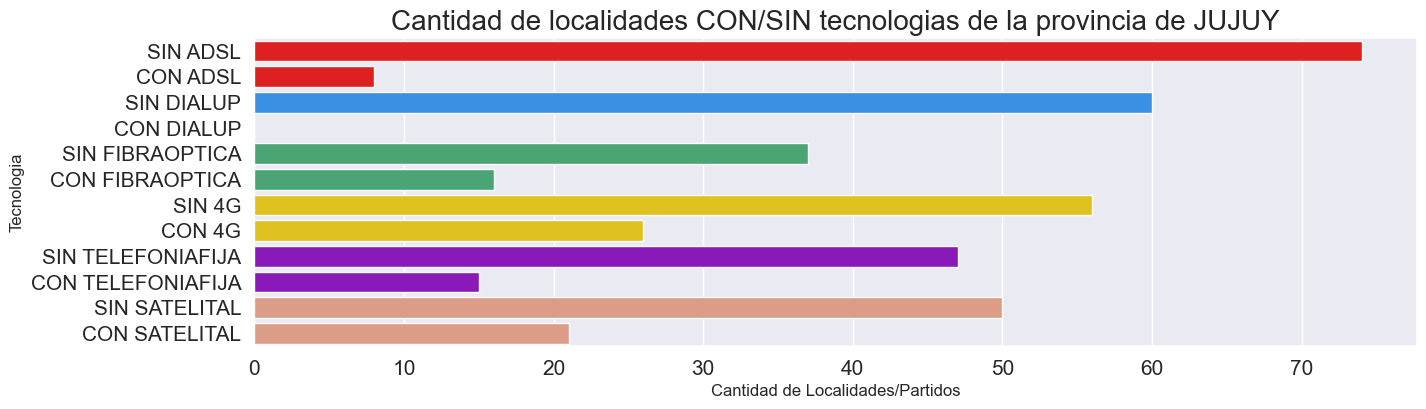

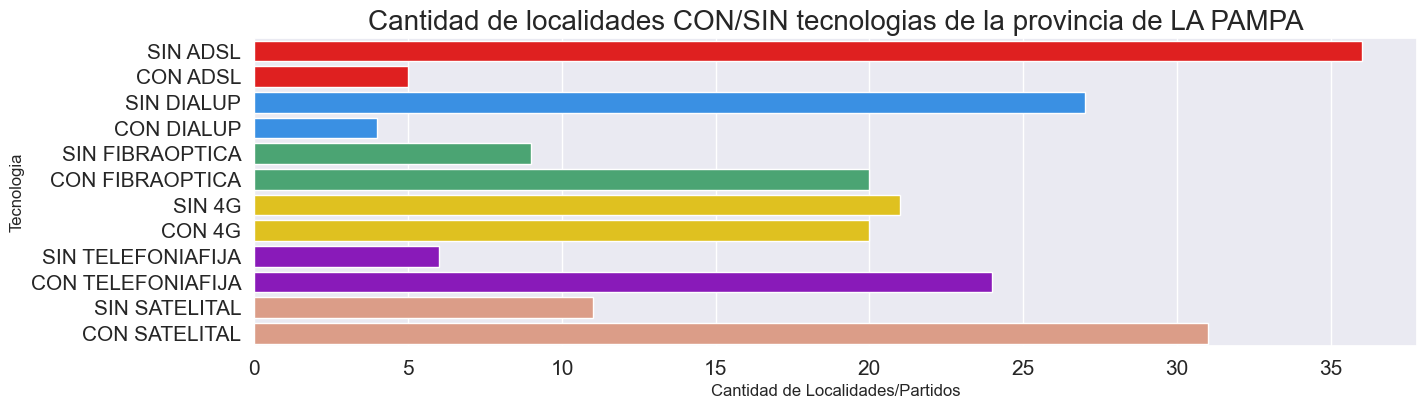

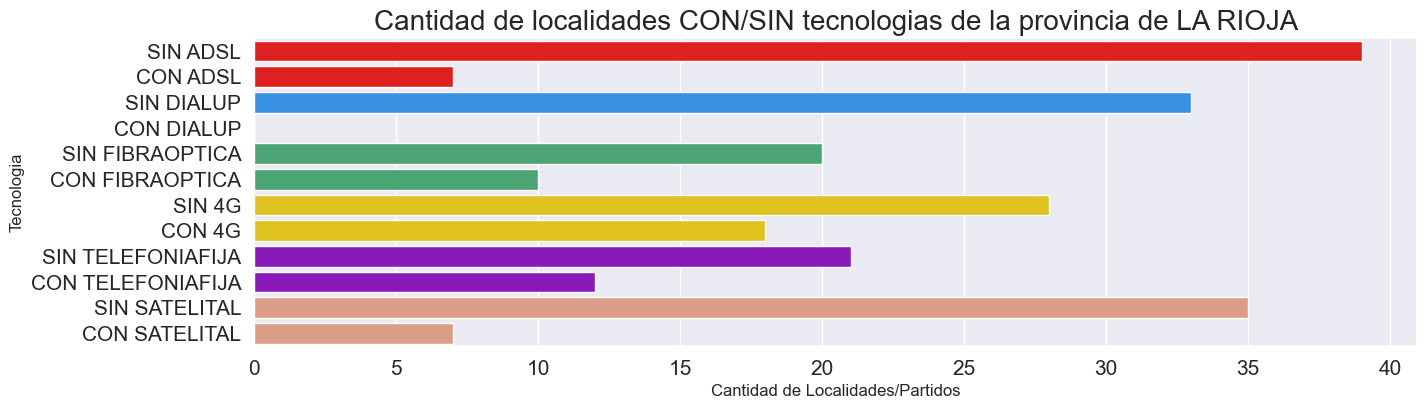

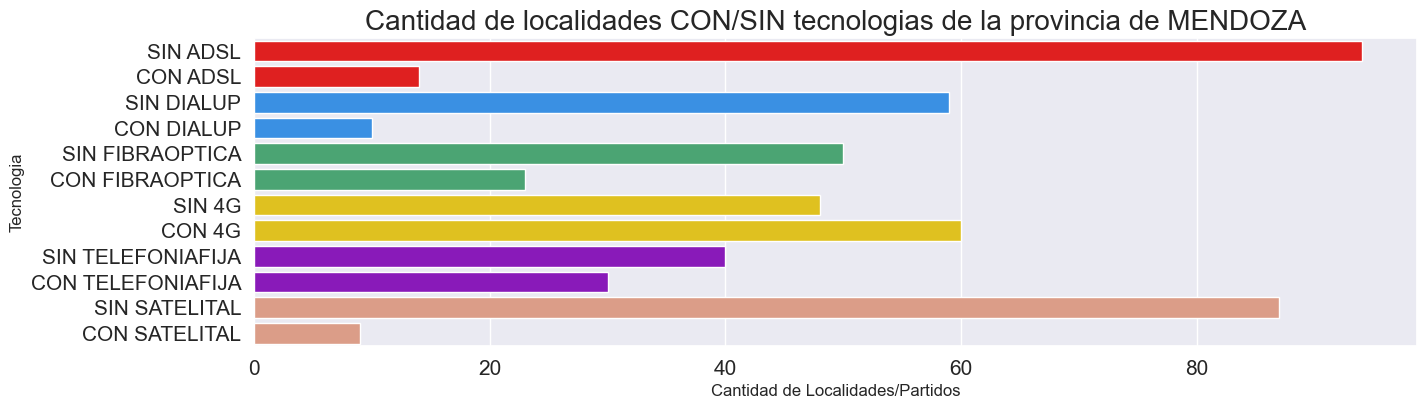

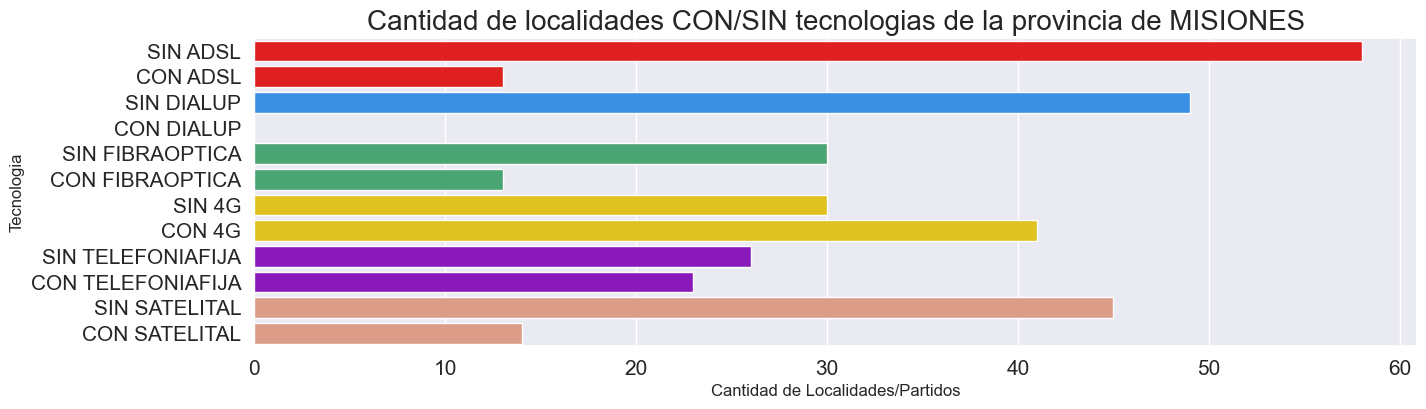

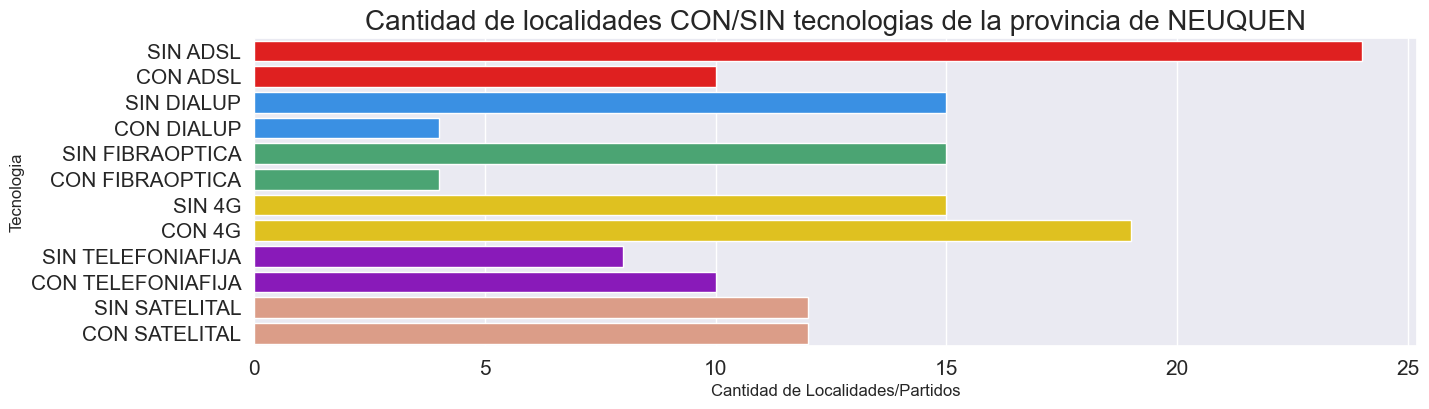

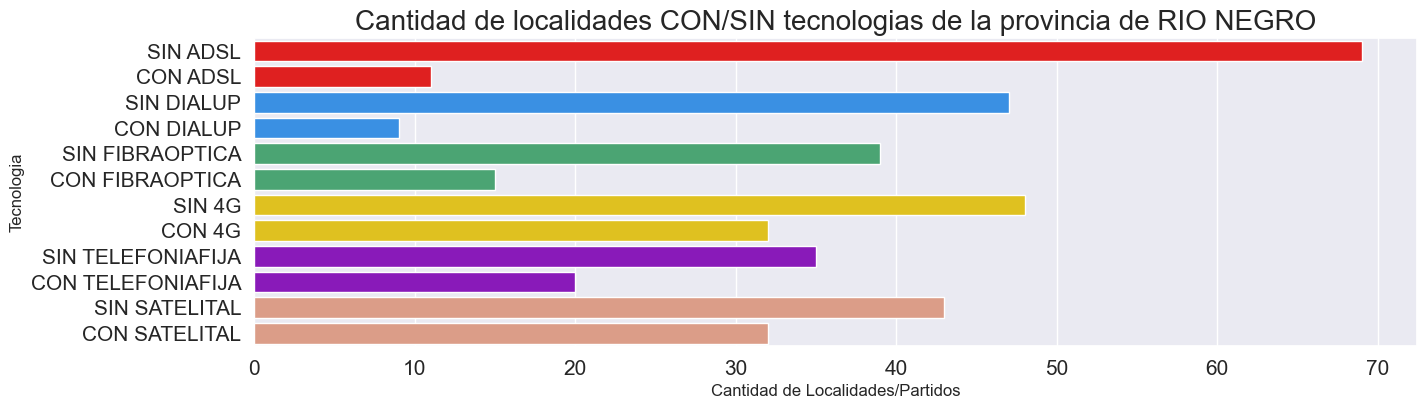

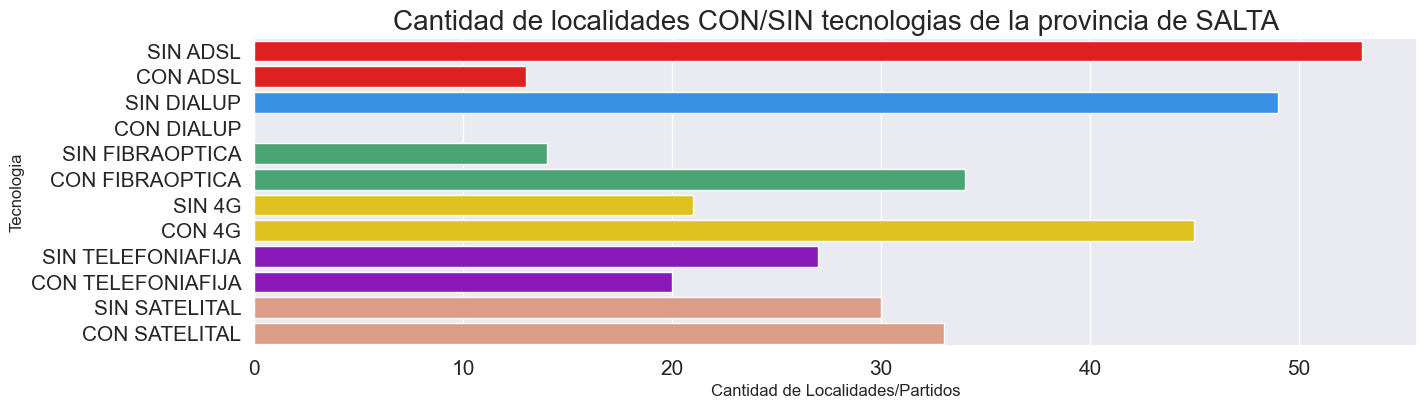

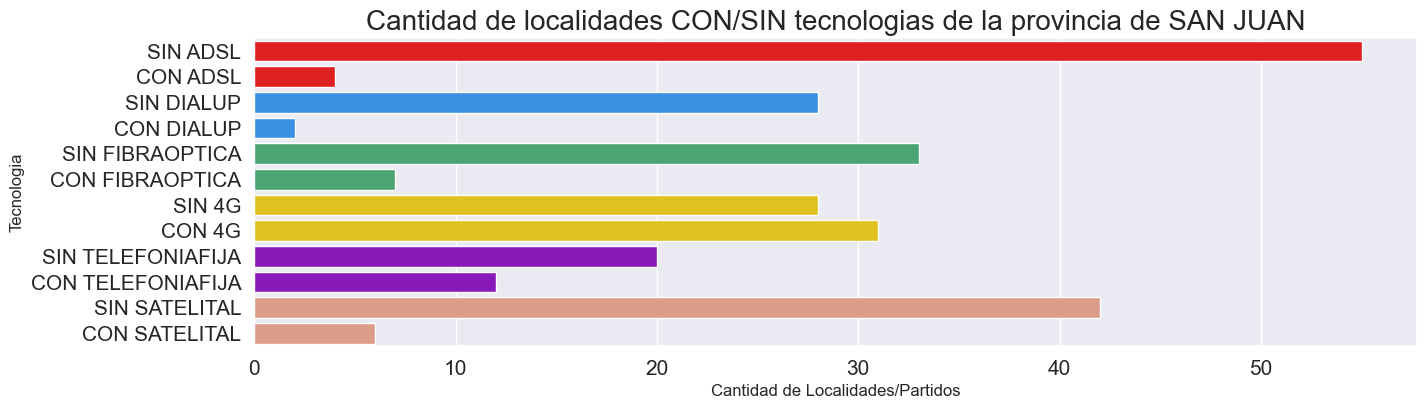

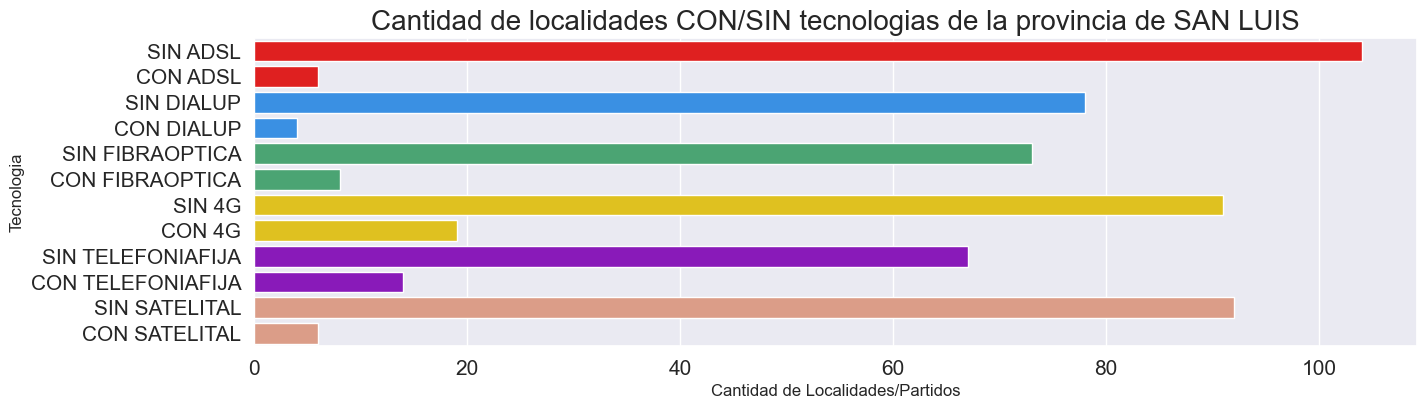

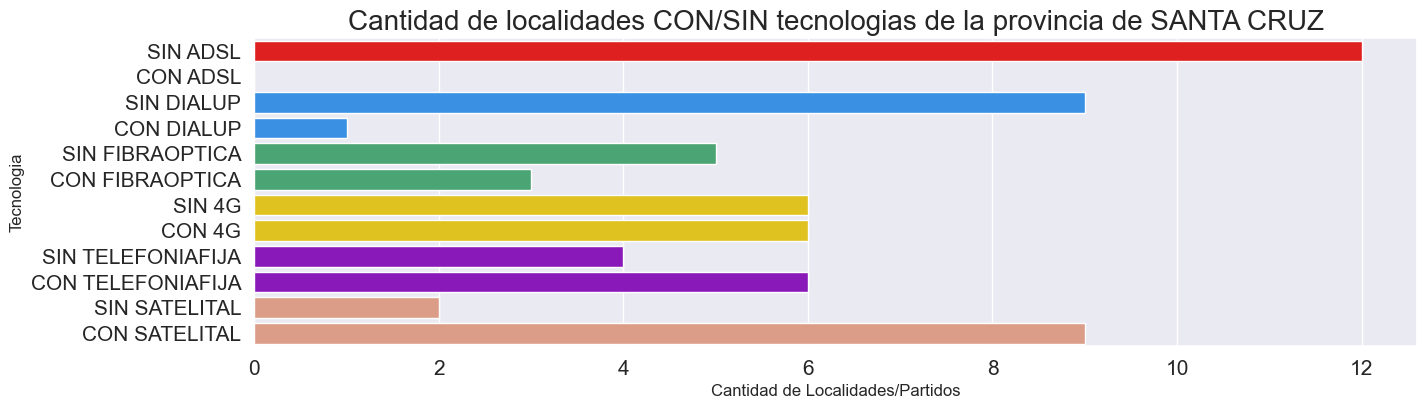

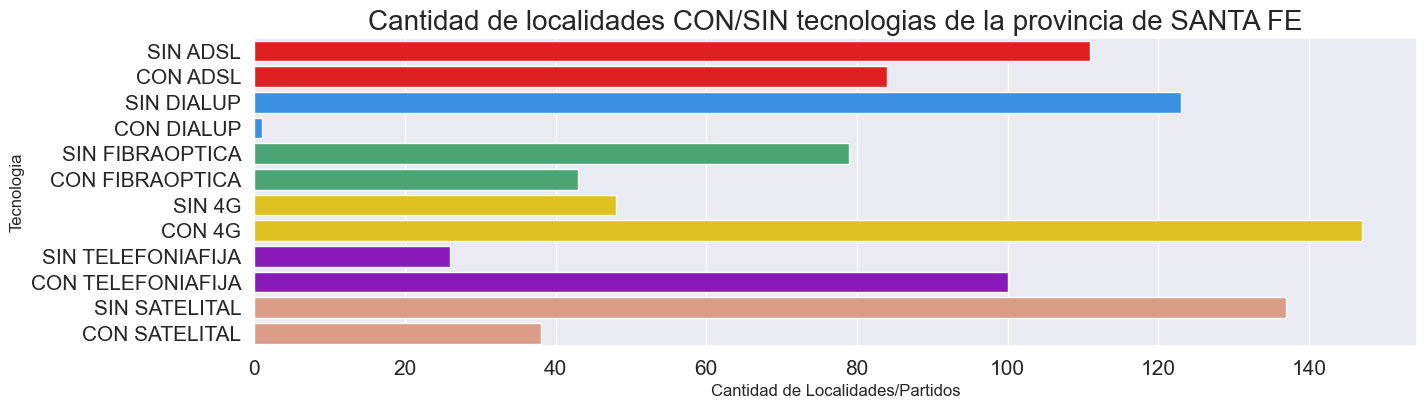

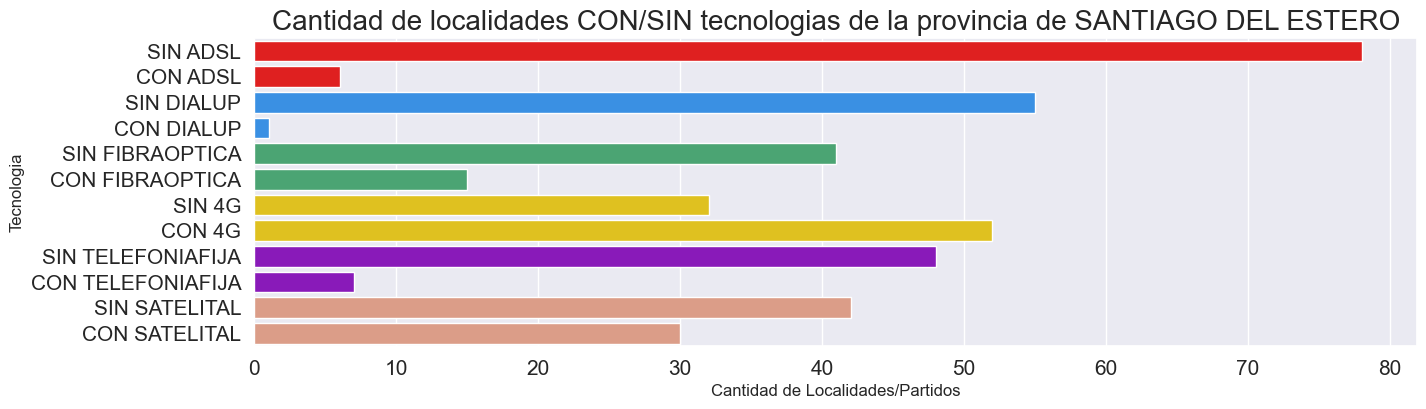

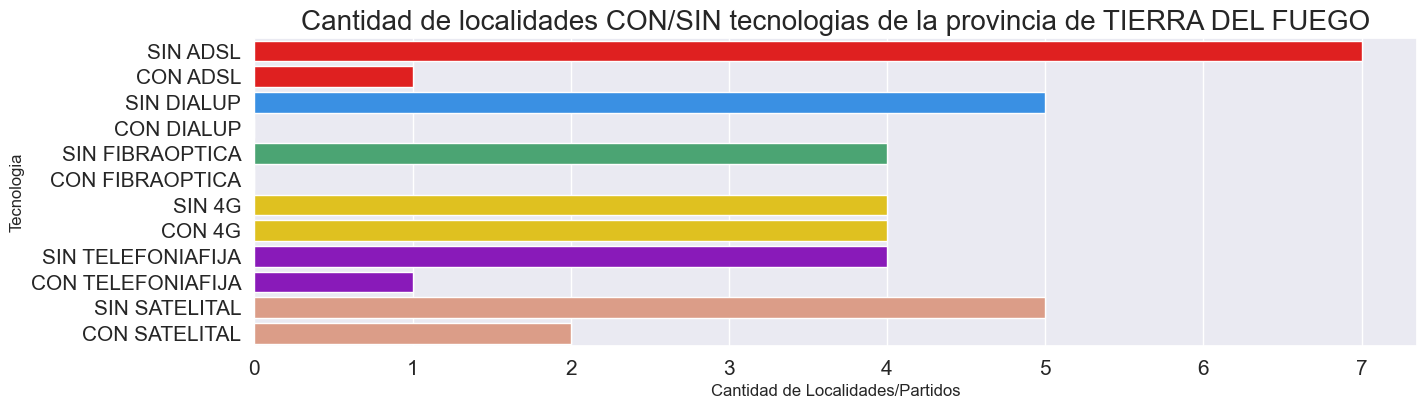

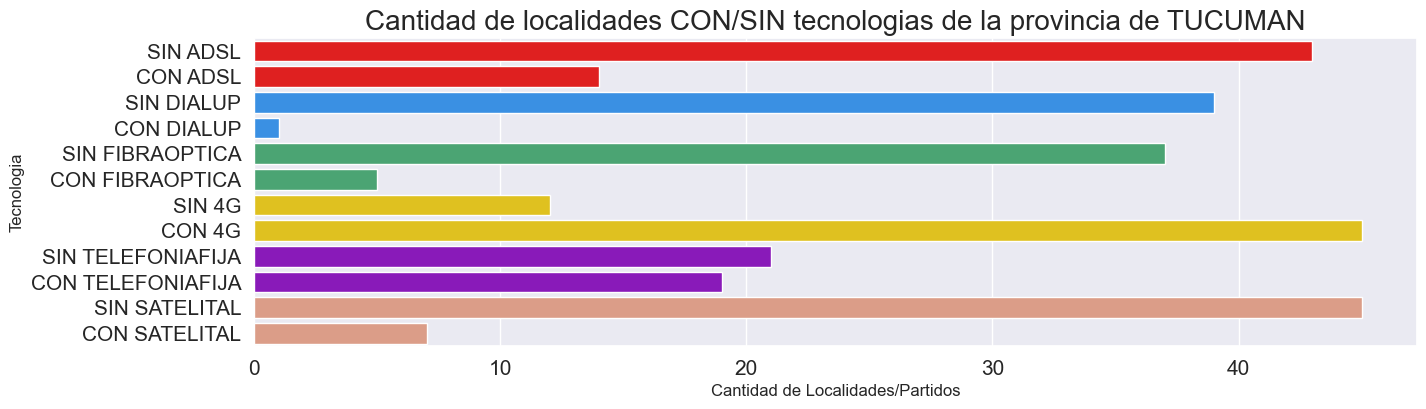

In [255]:
for prov in data_melted.Provincia.unique():
    plt.figure(figsize=(15,4))
    filtered_data = data_melted[(data_melted.Provincia == prov)]
    custom_palette = ['red', 'red', 'dodgerblue', 'dodgerblue', 'mediumseagreen', 'mediumseagreen', 'gold', 'gold', 'darkviolet', 'darkviolet', 'darksalmon', 'darksalmon']

    sns.barplot(data = filtered_data,
                y='Tecnologia',
                x='Cantidad de Localidades/Partidos',
                palette=custom_palette)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'Cantidad de localidades CON/SIN tecnologias de la provincia de {prov}', fontsize=20)
    plt.show()

In [147]:
# from pandas_profiling import ProfileReport

# ProfileReport(servicios_localidades)

---

### 12. Dataset `velocidad_bajada_provincias.csv`

In [20]:
velocidad_bajada_provincias = pd.read_csv('clean_datasets/velocidad_bajada_provincias.csv')
velocidad_bajada_provincias.sample(5)

Año  Trimestre     Provincia  Otros  0,256 Mbps  0,375 Mbps  0,625 Mbps  \
27   2022          2         Chaco   3708           0         225         111   
174  2020          4    Corrientes   4985           0           0           0   
72   2021          4  Buenos Aires  22958          18           0           0   
411  2018          2         Chaco   1266           0           0           0   
63   2022          1     Río Negro  22652           0           0           0   

     0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  70 Mbps  71 Mbps  75 Mbps  77 Mbps  \
27        234           2          0  ...        0        0        0        0   
174        10          57          0  ...        0        0        0        0   
72      37635         168       6898  ...     3163        0    98523        0   
411        70           0          0  ...        0        0        0        0   
63         41          75        642  ...        0        0        0        0   

     78 Mbps  80 Mbps  81 Mbps  83 Mbps  82 Mbps  86 Mbps  
27         0        0        0        0        0        0  
174        0        0        0        0        0        0  
72         2       61        0        1        0        0  
411        0        0        0        0        0        0  
63         0       60        0        0        0        0  

[5 rows x 97 columns]

In [21]:
data_vel_bajada = velocidad_bajada_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index()
data_vel_bajada.head()

Provincia   Año  Trimestre   Otros  0,256 Mbps  0,375 Mbps  0,625 Mbps  \
0  Buenos Aires  2017          4  114182           0           0           0   
1  Buenos Aires  2018         10  357672           0           0           0   
2  Buenos Aires  2019         10  101327          34           0           0   
3  Buenos Aires  2020         10   79037          68           0           0   
4  Buenos Aires  2021         10   52661          71           0           0   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  70 Mbps  71 Mbps  75 Mbps  77 Mbps  \
0      3865           0      35185  ...        2        0        0        0   
1    138187           0     129257  ...       28        0        0        0   
2    634046         610     112337  ...       71        0        0        0   
3    148243        1927     107217  ...     1053        0    13829        0   
4    148471         603      86960  ...    10412        0   170690        0   

   78 Mbps  80 Mbps  81 Mbps  83 Mbps  82 Mbps  86 Mbps  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        3        0        0        0        0  
3        6       63        3        3        0        0  
4        8      247        1        4        0        0  

[5 rows x 97 columns]

Agrupo todas las velocidades en dos columnas, separando la cantidad y la velocidad.

In [22]:
data_vel_bajada = pd.melt(data_vel_bajada, id_vars=['Año','Provincia','Trimestre'])
data_vel_bajada.head()

Año     Provincia  Trimestre variable   value
0  2017  Buenos Aires          4    Otros  114182
1  2018  Buenos Aires         10    Otros  357672
2  2019  Buenos Aires         10    Otros  101327
3  2020  Buenos Aires         10    Otros   79037
4  2021  Buenos Aires         10    Otros   52661

In [23]:
data_vel_bajada['Mbps'] = data_vel_bajada.variable.str.strip(' Mbps').str.replace(',','.')
data_vel_bajada['Mbps'] = data_vel_bajada['Mbps'].str.replace('Otro','-0.0')
data_vel_bajada['Mbps'] = data_vel_bajada['Mbps'].astype(float)

In [24]:
data_vel_bajada['Total'] = data_vel_bajada.value * data_vel_bajada.Mbps

In [25]:
provincia = data_vel_bajada[(data_vel_bajada.Provincia == 'Córdoba') | (data_vel_bajada.Año == 2020)]

promedio_ponderado = (provincia.Total).sum() / provincia.value.sum()
promedio_ponderado

21.707336376681006

In [26]:
promedios_provincias = {
    'Provincia':[],
    2017:[],
    2018:[],
    2019:[],
    2020:[],
    2021:[],
    2022:[],
}

for provincia in data_vel_bajada.Provincia.unique():
    # Filtro un df que tenga solo datos de la provincia
    df_provincia = data_vel_bajada[data_vel_bajada.Provincia == provincia]
    promedios_provincias['Provincia'].append(provincia)

    for año in data_vel_bajada.Año.unique():
        df_año = df_provincia[df_provincia.Año == año]
        promedio_año = round((df_año.Total.where(df_año.Total > 0)).sum() / df_año.value.sum(), 3)
        promedios_provincias[año].append(promedio_año)
        

In [27]:
promedios_provincias = pd.DataFrame(promedios_provincias)
promedios_provincias

Provincia    2017    2018    2019    2020    2021    2022
0          Buenos Aires  11.822  13.936  20.615  24.594  29.384  34.767
1       Capital Federal  14.128  17.638  26.438  34.407  37.162  37.867
2             Catamarca   7.218   6.940  10.005  20.493  25.227  32.694
3                 Chaco  11.339  11.917  14.184  19.734  22.340  27.035
4                Chubut   5.408   5.534   6.273   7.074   7.502  12.750
5            Corrientes  10.177  10.589  12.120  15.935  17.780  20.744
6               Córdoba  11.168  12.728  17.000  24.472  26.502  28.701
7            Entre Ríos   9.146   9.452  10.923  15.672  17.548  20.335
8               Formosa  10.027   9.528  10.679  13.327  14.350  13.984
9                 Jujuy   6.639   5.169   6.356  12.461  19.362  21.917
10             La Pampa   3.801   4.078   5.509   8.436  11.430  14.290
11             La Rioja   5.878   5.629   5.564   7.161  26.717  32.437
12              Mendoza   5.707   5.332   6.169   8.706  12.813  23.369
13             Misiones  11.125  11.537  12.627  17.095  18.387  21.417
14              Neuquén   9.624  11.385  15.257  20.562  20.425  20.691
15            Río Negro   7.566   8.681  10.255  13.859  13.996  15.727
16                Salta   8.452   9.251  11.886  17.133  19.319  20.195
17             San Juan   5.832   5.538   5.781   5.721   7.406  12.492
18             San Luis   5.000   6.662  12.148  14.234  15.146  16.636
19           Santa Cruz   5.207   4.825   5.407   6.622   7.702  11.382
20             Santa Fe   9.739  10.562  13.264  18.392  20.496  22.499
21  Santiago Del Estero   6.166   5.230   6.077   8.765   9.766  10.482
22     Tierra Del Fuego   5.203   6.280   6.325   6.647   8.529  10.111
23              Tucumán   9.106   8.962  11.708  20.895  25.180  27.552

In [28]:
data_promedios_provincias = pd.melt(promedios_provincias, id_vars='Provincia', var_name='Año', value_name='Promedio de velocidad')
data_promedios_provincias

Provincia   Año  Promedio de velocidad
0           Buenos Aires  2017                 11.822
1        Capital Federal  2017                 14.128
2              Catamarca  2017                  7.218
3                  Chaco  2017                 11.339
4                 Chubut  2017                  5.408
..                   ...   ...                    ...
139           Santa Cruz  2022                 11.382
140             Santa Fe  2022                 22.499
141  Santiago Del Estero  2022                 10.482
142     Tierra Del Fuego  2022                 10.111
143              Tucumán  2022                 27.552

[144 rows x 3 columns]

Para ver el historico promedio para cada provincia simplemente agrupo por provincia solamente

In [29]:
data_promedios_provincias_total = data_promedios_provincias.groupby(by='Provincia').mean().reset_index()
data_promedios_provincias_total.head()

Provincia  Promedio de velocidad
0     Buenos Aires              22.519667
1  Capital Federal              27.940000
2        Catamarca              17.096167
3            Chaco              17.758167
4           Chubut               7.423500

Para graficar las cinco porvincias con mejores velocidades de Internet dependiendo del promedio total, hago lo siguiente:

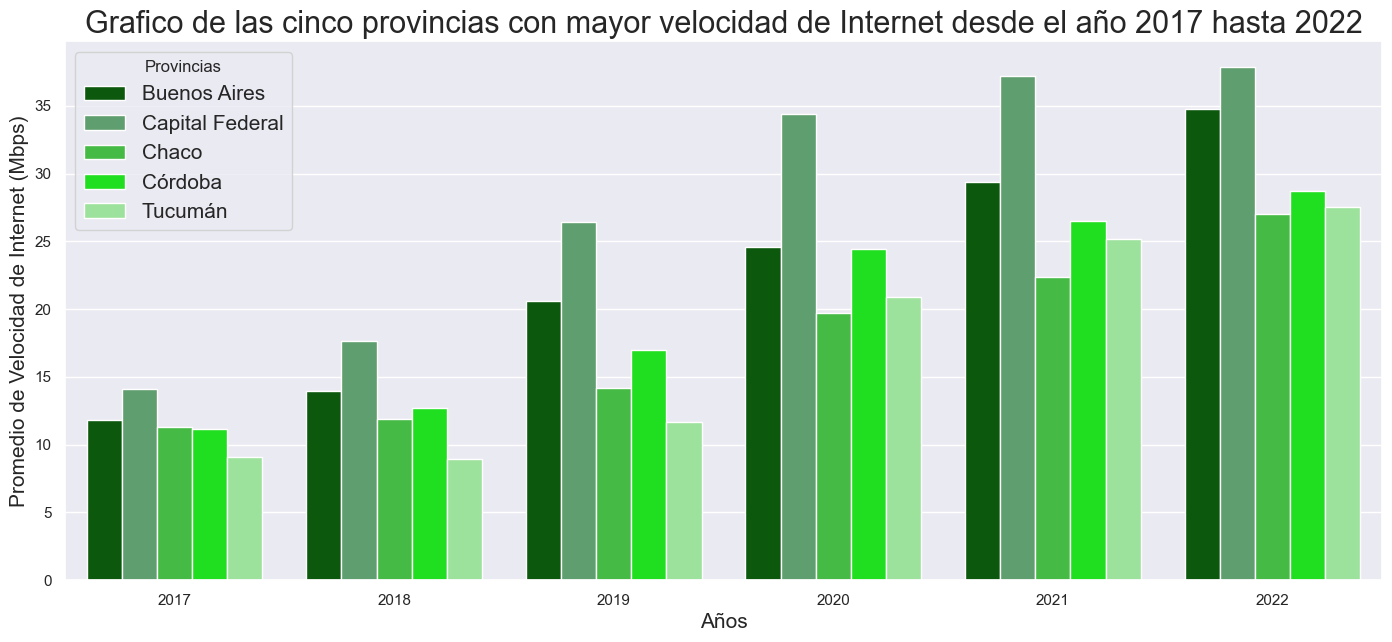

In [31]:
data = data_promedios_provincias
top_provincias = data_promedios_provincias_total.sort_values(by='Promedio de velocidad', ascending=False).Provincia[:5]
colors_palette = ['darkgreen', 'g', 'limegreen', 'lime', 'lightgreen']

plt.figure(figsize=(17,7))
sns.barplot(data = data_promedios_provincias[data_promedios_provincias.Provincia.isin(top_provincias)], x='Año', y='Promedio de velocidad', hue='Provincia', palette=colors_palette)
plt.legend(title='Provincias', fontsize=15)
plt.title('Grafico de las cinco provincias con mayor velocidad de Internet desde el año 2017 hasta 2022', fontsize=22)
plt.xlabel('Años',fontsize=15)
plt.ylabel('Promedio de Velocidad de Internet (Mbps)',fontsize=15)
plt.show()

*Mientras mayor sea el verde de una barra, mayor sera el promedio total de la provincia*

Quiero ver el mismo grafico pero con las provincias con las peores velocidades de Internet

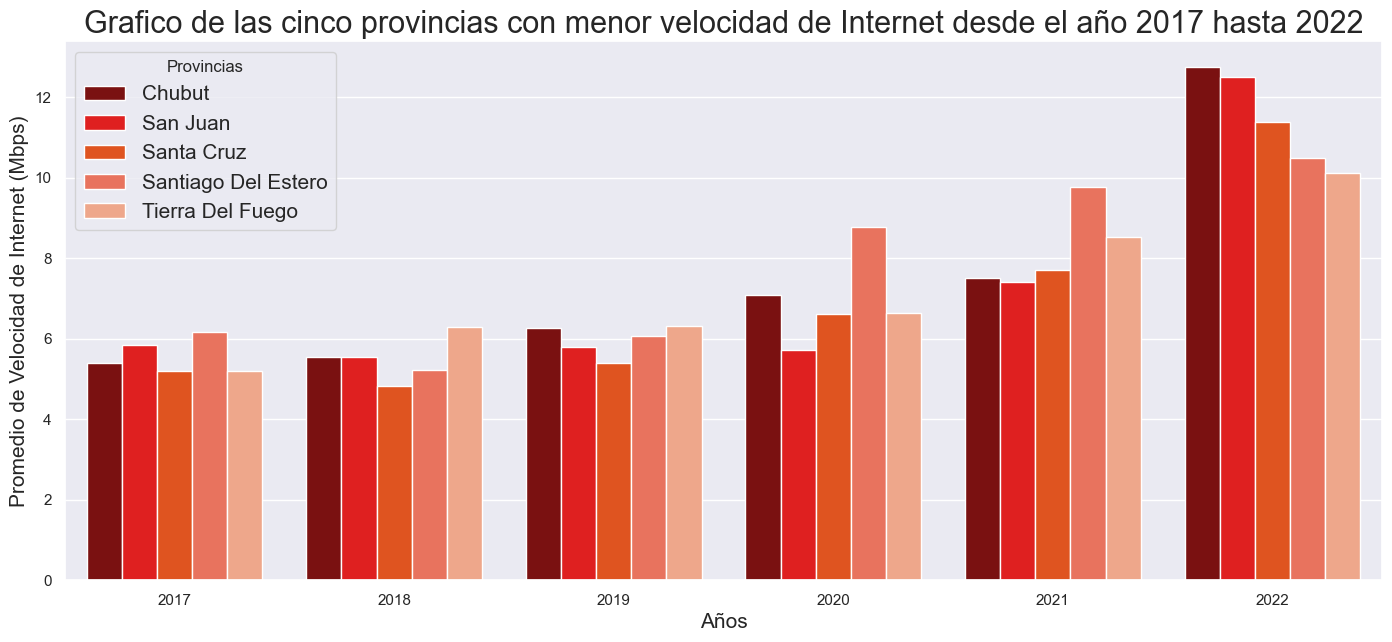

In [32]:
data = data_promedios_provincias
top_provincias = data_promedios_provincias_total.sort_values(by='Promedio de velocidad', ascending=True).Provincia[:5]
colors_palette = ['darkred', 'red', 'orangered', 'tomato', 'lightsalmon']

plt.figure(figsize=(17,7))
sns.barplot(data = data_promedios_provincias[data_promedios_provincias.Provincia.isin(top_provincias)], x='Año', y='Promedio de velocidad', hue='Provincia', palette=colors_palette)
plt.legend(title='Provincias', fontsize=15)
plt.title('Grafico de las cinco provincias con menor velocidad de Internet desde el año 2017 hasta 2022', fontsize=22)
plt.xlabel('Años',fontsize=15)
plt.ylabel('Promedio de Velocidad de Internet (Mbps)',fontsize=15)
plt.show()

*Mientras mayor sea el rojo de una barra, menor sera el promedio total de la provincia, es decir, mas abajo en el ranking está*